# Car Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [3]:
df=pd.read_csv('car.csv')

# Exploratory Data Analysis

In [4]:
df.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [5]:
df.tail()

ID  Price  Levy   Manufacturer    Model  Prod. year Category  \
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999    Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011    Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010     Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007     Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012    Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels   Doors       Wheel   Color  Airbags  
19232        Manual         Rear  02-Mar  Left wheel  Silver        5  
19233     Tiptronic        Front  04-May  Left wheel     Red        8  
19234     Automatic        Front  04-May  Left wheel    Grey        4  
19235     Automatic        Front  04-May  Left wheel   Black        4  
19236     Automatic        Front  04-May  Left wheel   White       12

In [6]:
df.shape

(19237, 18)

In [7]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [8]:
df.describe()

ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [10]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [11]:
df.duplicated().sum()

313

In [12]:
df=df.drop_duplicates()

In [13]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [14]:
df=df.drop(['ID','Doors'],axis=1)

In [15]:
df

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     -          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19232   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels             Wheel   Color  Airbags  
0         Automatic          4x4        Left wheel  Silver       12  
1         Tiptronic          4x4        Left wheel   Black        8  
2          Variator        Front  Right-hand drive   Black        2  
3         Automatic          4x4        Left wheel   White        0  
4         Automatic        Front        Left wheel  Silver        4  
...             ...          ...               ...     ...      ...  
19232        Manual         Rear        Left wheel  Silver        5  
19233     Tiptronic        Front        Left wheel     Red        8  
19234     Automatic        Front        Left wheel    Grey        4  
19235     Automatic        Front        Left wheel   Black        4  
19236     Automatic        Front        Left wheel   White       12  

[18924 rows x 16 columns]

In [16]:
df.duplicated().sum()

3199

In [17]:
df=df.drop_duplicates()

In [18]:
df.shape

(15725, 16)

In [19]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [20]:
df.describe()

Price    Prod. year     Cylinders       Airbags
count  1.572500e+04  15725.000000  15725.000000  15725.000000
mean   2.027944e+04   2010.518919      4.483561      6.543339
std    2.106390e+05      6.012122      1.134466      4.067728
min    1.000000e+00   1939.000000      1.000000      0.000000
25%    7.527000e+03   2008.000000      4.000000      4.000000
50%    1.416600e+04   2012.000000      4.000000      6.000000
75%    2.336400e+04   2014.000000      4.000000     12.000000
max    2.630750e+07   2020.000000     16.000000     16.000000

In [21]:
df.nunique()

Price               2315
Levy                 559
Manufacturer          65
Model               1590
Prod. year            54
Category              11
Leather interior       2
Fuel type              7
Engine volume        107
Mileage             7687
Cylinders             13
Gear box type          4
Drive wheels           3
Wheel                  2
Color                 16
Airbags               17
dtype: int64

In [22]:
object_columns=df.select_dtypes(include=['object']).columns
print('Object Columns:')
print(object_columns)
numerical_columns=df.select_dtypes(include=['int64']).columns
print('numerical columns:')
print(numerical_columns)

Object Columns:
Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color'],
      dtype='object')
numerical columns:
Index(['Price', 'Prod. year', 'Airbags'], dtype='object')


In [23]:
def classify_features(df):
    categorical_features=[]
    non_categorical_features=[]
    discrete_features=[]
    continuous_features=[]
    for column in df.columns:
        if df[column].dtype== 'object':
            if df[column].nunique() < 30:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64','float64']:
            if df[column].nunique() <30:
                discrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features,non_categorical_features,discrete_features,continuous_features
    
                

In [24]:
categorical,non_categorical,discrete,continuous=classify_features(df)
print('categorical features:',categorical)
print('non categorical features:',non_categorical)
print('discrete features:',discrete)
print('continuous features:',continuous)


categorical features: ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
non categorical features: ['Levy', 'Manufacturer', 'Model', 'Engine volume', 'Mileage']
discrete features: ['Cylinders', 'Airbags']
continuous features: ['Price', 'Prod. year']


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15725 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15725 non-null  int64  
 1   Levy              15725 non-null  object 
 2   Manufacturer      15725 non-null  object 
 3   Model             15725 non-null  object 
 4   Prod. year        15725 non-null  int64  
 5   Category          15725 non-null  object 
 6   Leather interior  15725 non-null  object 
 7   Fuel type         15725 non-null  object 
 8   Engine volume     15725 non-null  object 
 9   Mileage           15725 non-null  object 
 10  Cylinders         15725 non-null  float64
 11  Gear box type     15725 non-null  object 
 12  Drive wheels      15725 non-null  object 
 13  Wheel             15725 non-null  object 
 14  Color             15725 non-null  object 
 15  Airbags           15725 non-null  int64  
dtypes: float64(1), int64(3), object(12)
memory us

# Data visualization

In [26]:
df['Cylinders']=df['Cylinders'].astype('int32')

In [27]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

Cylinders
[ 6  4  8  1 12  3  2 16  5  7  9 10 14]

Airbags
[12  8  2  0  4  6 10  3  1 16  5  7  9 11 14 15 13]



In [28]:
for i in discrete:

    print(df[i].value_counts())
    print()

Cylinders
4     12279
6      2429
8       605
5       165
3       107
2        42
12       38
1        37
10       12
16        5
7         4
9         1
14        1
Name: count, dtype: int64

Airbags
4     5104
12    3963
8     1566
0     1393
6     1288
2     1047
10     845
5      104
16      93
7       85
1       76
9       62
3       37
11      33
14      20
15       7
13       2
Name: count, dtype: int64



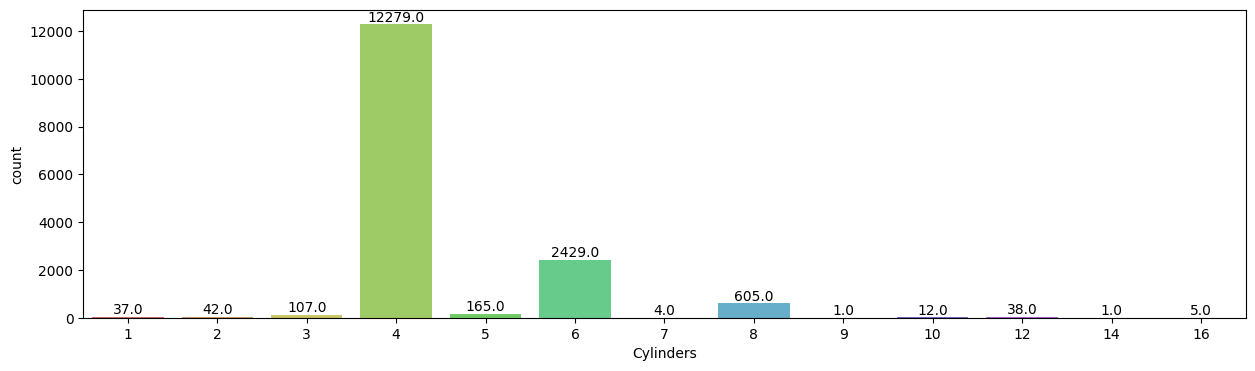

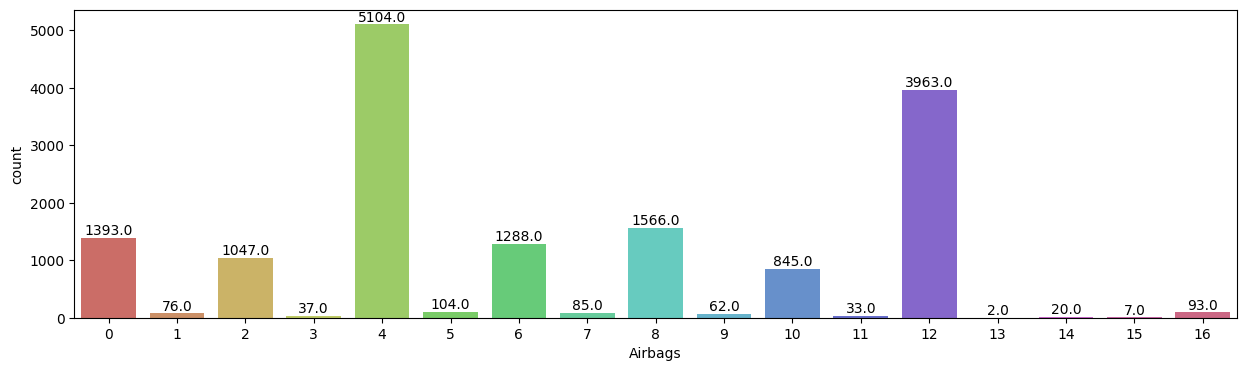

In [29]:
for i in discrete:
    plt.figure(figsize=(15,4))
    ax=sns.countplot(x=i,data=df,palette='hls')

    for p in ax.patches: #bars are represented as patches.
        height=p.get_height() #gets the height of the current bar, which represents the count or frequency of that category.
        ax.annotate(f'{height}',
                   xy=(p.get_x()+p.get_width()/2.,height), # sets the position of the annotation
                   xytext=(0,5), #This offsets the text from the xy position. Here, it's 5 points above the bar.
                   textcoords="offset points", #specifies that the xytext coordinates are offset points from xy.
                   ha='center',va='center')
        
    plt.show()

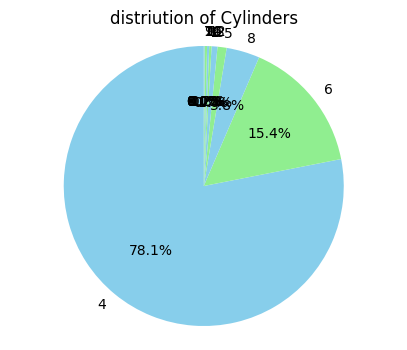

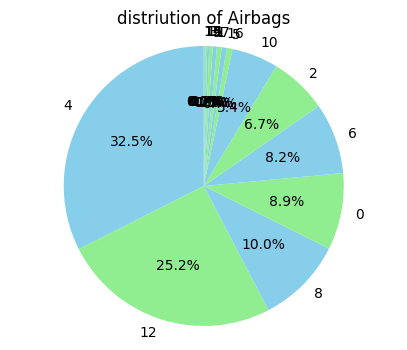

In [30]:
for i in discrete:
    plt.figure(figsize=(5,4))
    counts=df[i].value_counts()
    plt.pie(counts,labels=counts.index,autopct='%1.1f%%',colors=['skyblue','lightgreen'],startangle=90)
    plt.title(f'distriution of {i}')
    plt.axis('equal')
    plt.show()

In [31]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Category
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']

Leather interior
['Yes' 'No']

Fuel type
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']

Gear box type
['Automatic' 'Tiptronic' 'Variator' 'Manual']

Drive wheels
['4x4' 'Front' 'Rear']

Wheel
['Left wheel' 'Right-hand drive']

Color
['Silver' 'Black' 'White' 'Grey' 'Blue' 'Green' 'Red' 'Sky blue' 'Orange'
 'Yellow' 'Brown' 'Golden' 'Beige' 'Carnelian red' 'Purple' 'Pink']



In [32]:
for i in categorical:

    print(df[i].value_counts())
    print()

Category
Sedan          7010
Jeep           4225
Hatchback      2548
Minivan         534
Coupe           476
Universal       311
Microbus        295
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: count, dtype: int64

Leather interior
Yes    10558
No      5167
Name: count, dtype: int64

Fuel type
Petrol            8824
Diesel            3209
Hybrid            2424
LPG                714
CNG                468
Plug-in Hybrid      85
Hydrogen             1
Name: count, dtype: int64

Gear box type
Automatic    10088
Tiptronic     3064
Manual        1841
Variator       732
Name: count, dtype: int64

Drive wheels
Front    10990
4x4       2766
Rear      1969
Name: count, dtype: int64

Wheel
Left wheel          14293
Right-hand drive     1432
Name: count, dtype: int64

Color
Black            3835
White            3611
Silver           3149
Grey             1919
Blue             1247
Red               567
Green             288
Orange            204
Carneli

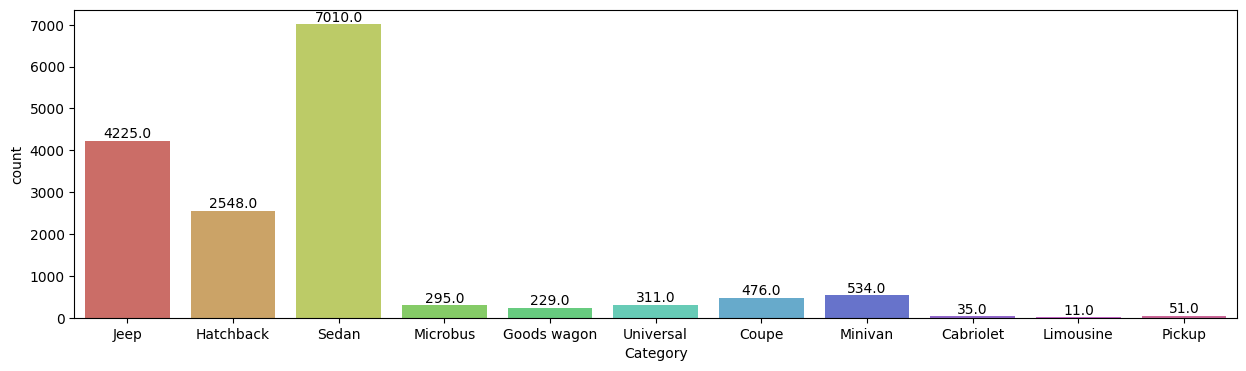

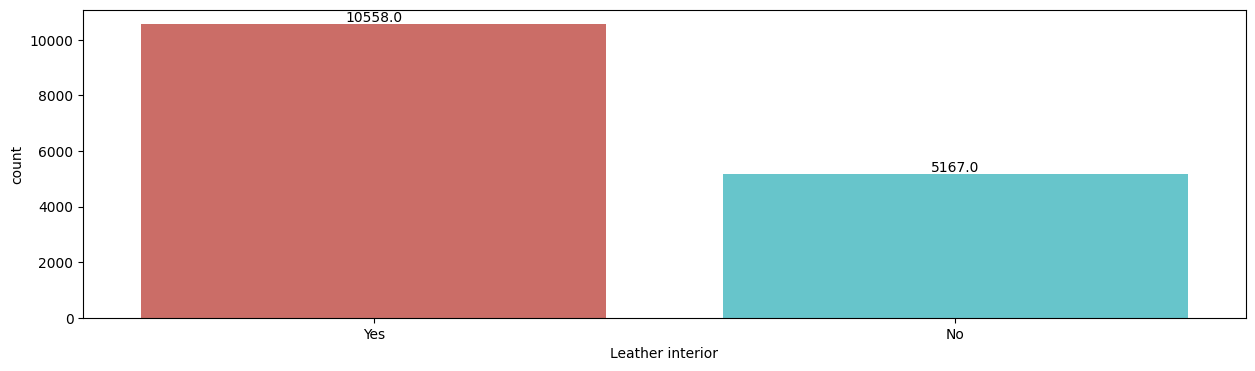

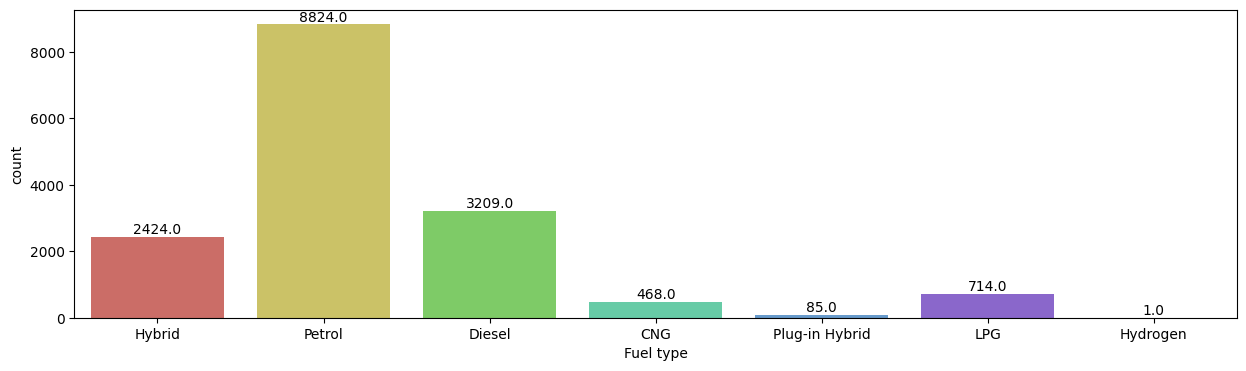

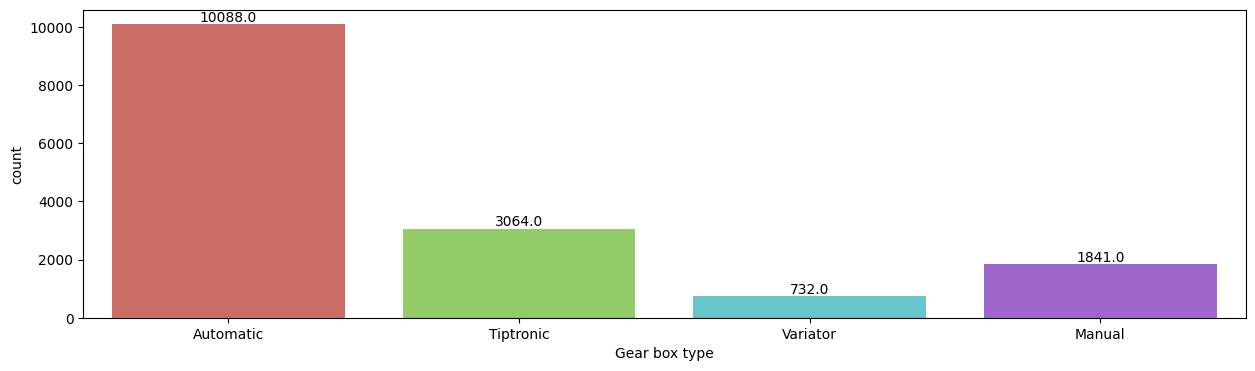

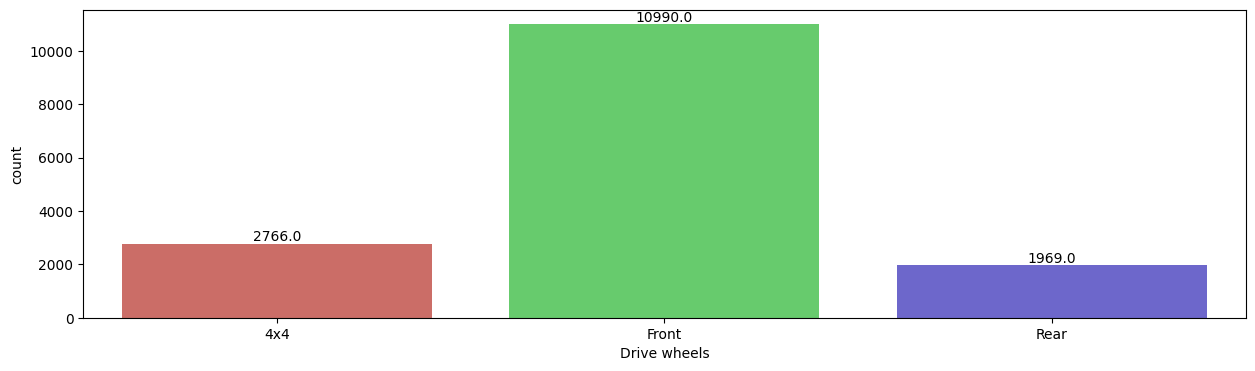

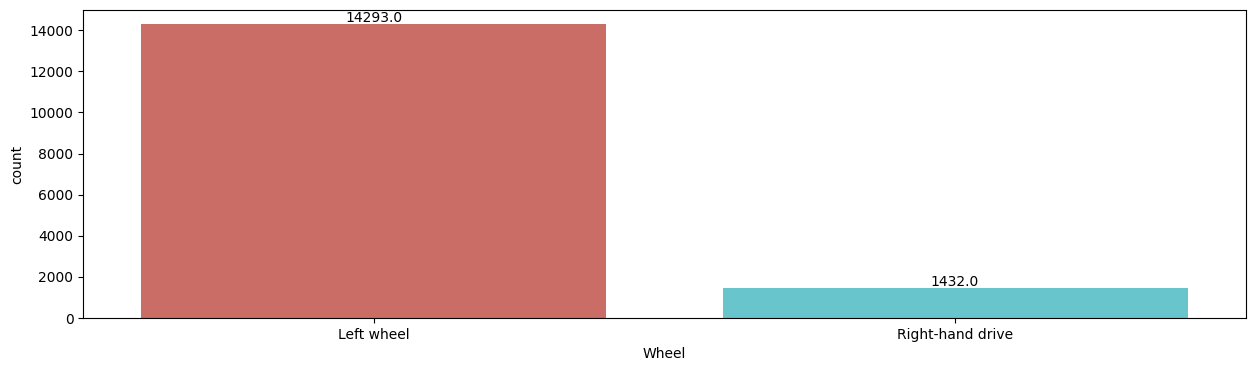

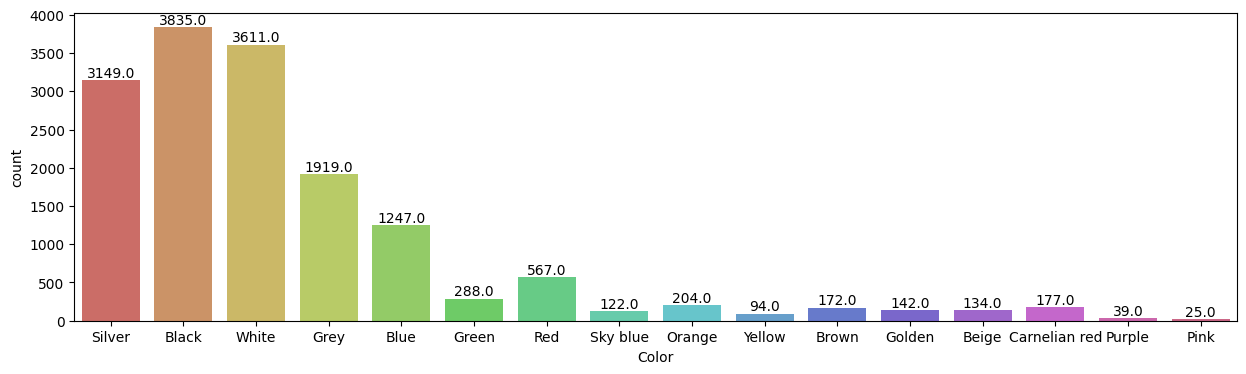

In [33]:
for i in categorical:
    plt.figure(figsize=(15,4))
    ax=sns.countplot(x=i,data=df,palette='hls')

    for p in ax.patches: #bars are represented as patches.
        height=p.get_height() #gets the height of the current bar, which represents the count or frequency of that category.
        ax.annotate(f'{height}',
                   xy=(p.get_x()+p.get_width()/2.,height), # sets the position of the annotation
                   xytext=(0,5), #This offsets the text from the xy position. Here, it's 5 points above the bar.
                   textcoords="offset points", #specifies that the xytext coordinates are offset points from xy.
                   ha='center',va='center')
        
    plt.show()

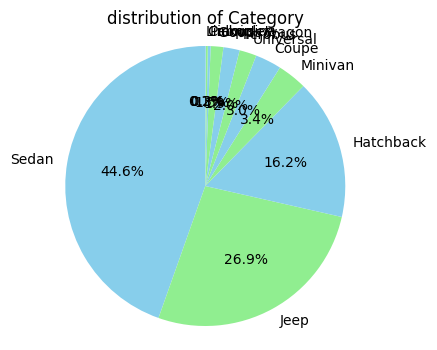

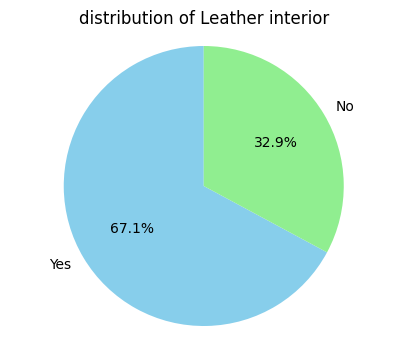

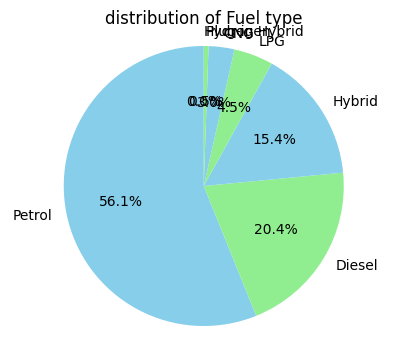

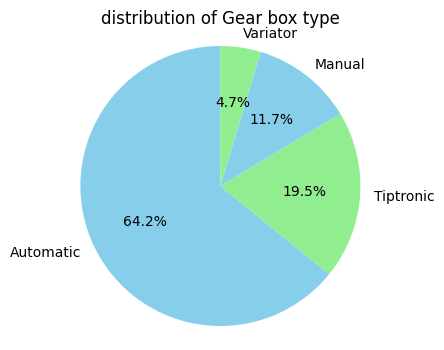

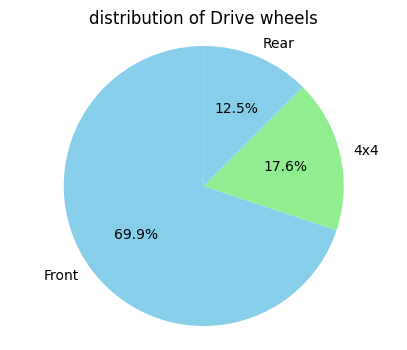

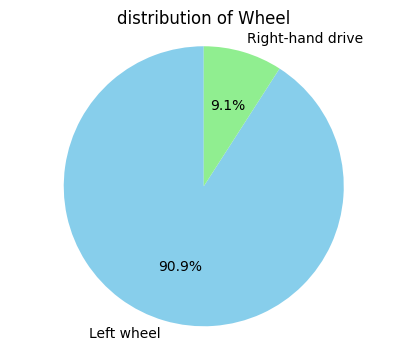

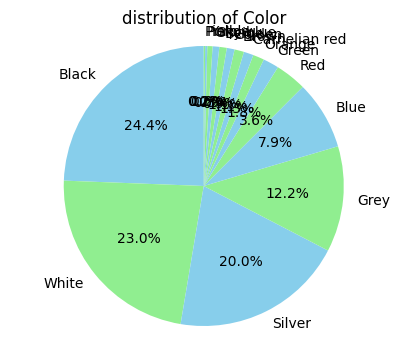

In [34]:
for i in categorical:
    plt.figure(figsize=(5,4))
    count=df[i].value_counts()
    plt.pie(count,labels=count.index,autopct='%1.1f%%',colors=['skyblue','lightgreen'],startangle=90)
    plt.title(f'distribution of {i}')
    plt.axis('equal')
    plt.show()

In [35]:
# import plotly.express as px

# threshold=0.1
# for i in discrete:
#     counts=df[i].value_counts()
#     percentages=counts/len(df)*100
#     minor_categories=percentages[percentages<=threshold].index
#     df[i]=df[i].apply(lambda x:'Other' if x in minor_categories else x)
#     counts=df[i].value_counts()
#     fig=px.pie(counts,values=counts.values,names=counts.index,title=f'Distribution of {i}')
#     fig.show()

In [36]:
import plotly.io as pio
pio.renderers.default = "notebook"
import plotly.express as px

# threshold=0.1
for i in categorical:
    # counts=df[i].value_counts()
    #  percentages=counts/len(df)*100
    #  minor_categories=percentages[percentages<=threshold].index
    #  df[i]=df[i].apply(lambda x:'Other' if x in minor_categories else x)
    counts=df[i].value_counts()
    fig=px.pie(counts,values=counts.values,names=counts.index,title=f'Distribution of {i}')
    fig.show()

In [37]:
import plotly
print(plotly.__version__)

5.23.0


In [38]:
df['Levy']=df['Levy'].replace('-',pd.NA)
median_levy=df['Levy'].dropna().astype(int).median() #We temporarily remove NA values to calculate the median.
df['Levy']=df['Levy'].fillna(median_levy)

In [39]:
df['Engine volume']=df['Engine volume'].str.replace('Turbo','',regex=False)

In [40]:
df['Mileage']=df['Mileage'].str.replace('km','')

In [41]:
df['Drive wheels']=df['Drive wheels'].str.replace('4x4','All-wheel drive')

In [42]:
df['Levy']=pd.to_numeric(df['Levy'],errors='coerce')
df['Mileage']=pd.to_numeric(df['Mileage'],errors='coerce')
df['Engine volume']=pd.to_numeric(df['Engine volume'],errors='coerce')

In [43]:
df

Price    Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399.0          LEXUS   RX 450        2010       Jeep   
1      16621  1018.0      CHEVROLET  Equinox        2011       Jeep   
2       8467   779.0          HONDA      FIT        2006  Hatchback   
3       3607   862.0           FORD   Escape        2011       Jeep   
4      11726   446.0          HONDA      FIT        2014  Hatchback   
...      ...     ...            ...      ...         ...        ...   
19230    470   645.0         TOYOTA    Prius        2011  Hatchback   
19232   8467   779.0  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831.0        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836.0        HYUNDAI   Tucson        2010       Jeep   
19236    470   753.0        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
0                  Yes    Hybrid            3.5   186005          6   
1                   No    Petrol            3.0   192000          6   
2                   No    Petrol            1.3   200000          4   
3                  Yes    Hybrid            2.5   168966          4   
4                  Yes    Petrol            1.3    91901          4   
...                ...       ...            ...      ...        ...   
19230              Yes    Hybrid            1.8   307325          4   
19232              Yes       CNG            2.0   300000          4   
19233              Yes    Petrol            2.4   161600          4   
19234              Yes    Diesel            2.0   116365          4   
19236              Yes    Hybrid            2.4   186923          4   

      Gear box type     Drive wheels             Wheel   Color  Airbags  
0         Automatic  All-wheel drive        Left wheel  Silver       12  
1         Tiptronic  All-wheel drive        Left wheel   Black        8  
2          Variator            Front  Right-hand drive   Black        2  
3         Automatic  All-wheel drive        Left wheel   White        0  
4         Automatic            Front        Left wheel  Silver        4  
...             ...              ...               ...     ...      ...  
19230     Automatic            Front        Left wheel  Silver       12  
19232        Manual             Rear        Left wheel  Silver        5  
19233     Tiptronic            Front        Left wheel     Red        8  
19234     Automatic            Front        Left wheel    Grey        4  
19236     Automatic            Front        Left wheel   White       12  

[15725 rows x 16 columns]

In [44]:
object_columns=df.select_dtypes(include=['object']).columns
print('Object Columns:')
print(object_columns)
numerical_columns=df.select_dtypes(include=['int32','int64','float64']).columns
print('numerical columns:')
print(numerical_columns)

Object Columns:
Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color'],
      dtype='object')
numerical columns:
Index(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags'],
      dtype='object')


In [45]:
def classify_features(df):
    categorical_features=[]
    non_categorical_features=[]
    discrete_features=[]
    continuous_features=[]
    for column in df.columns:
        if df[column].dtype== 'object':
            if df[column].nunique() < 30:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int32','int64','float64']:
            if df[column].nunique() <30:
                discrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features,non_categorical_features,discrete_features,continuous_features
    
                

In [46]:
categorical,non_categorical,discrete,continuous=classify_features(df)
print('categorical features:',categorical)
print('non categorical features:',non_categorical)
print('discrete features:',discrete)
print('continuous features:',continuous)


categorical features: ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
non categorical features: ['Manufacturer', 'Model']
discrete features: ['Cylinders', 'Airbags']
continuous features: ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage']


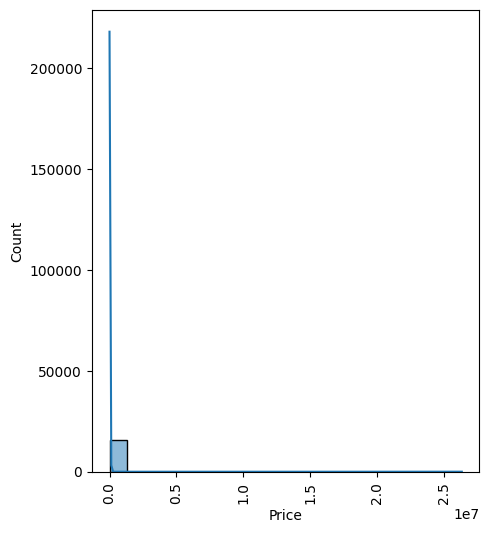

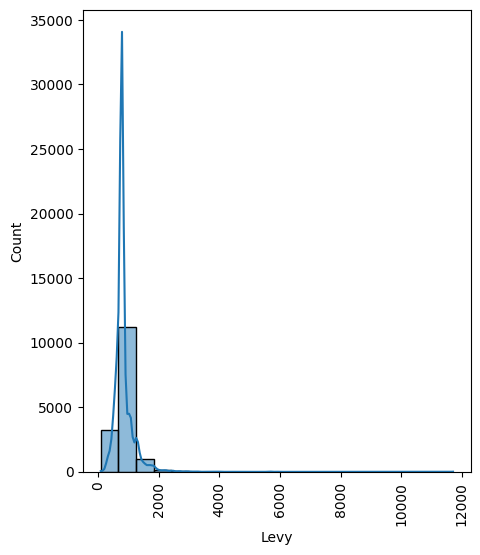

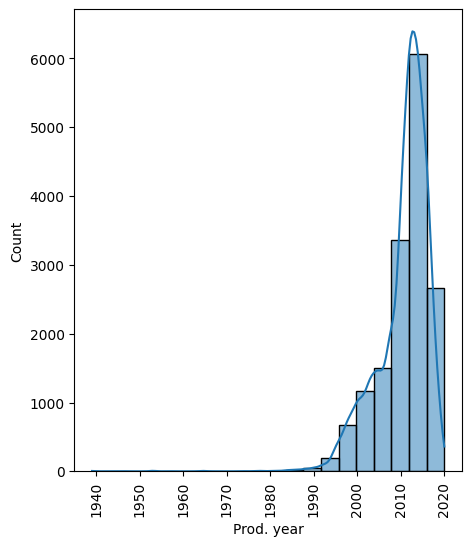

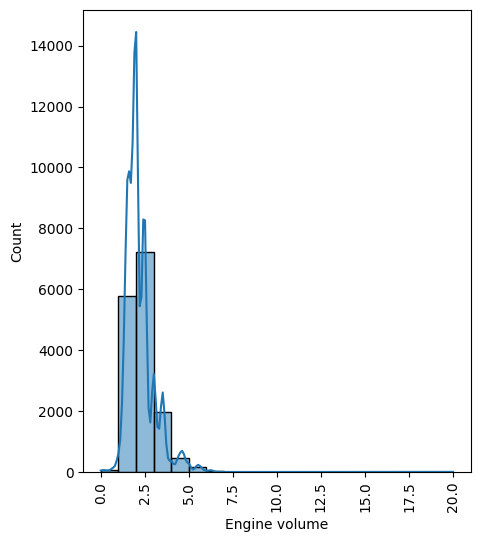

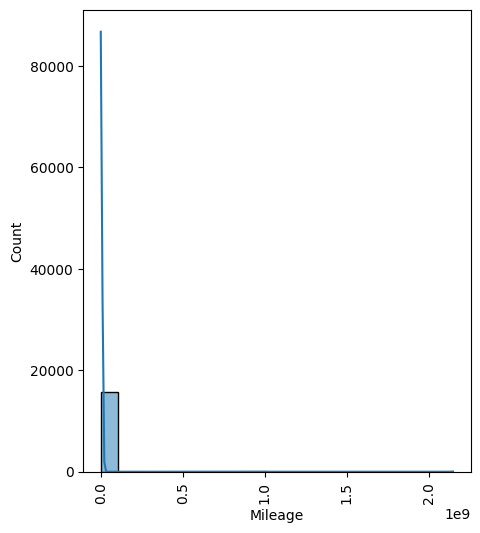

In [47]:
for i in continuous:
    plt.figure(figsize=(5,6))
    sns.histplot(df[i],bins=20,kde=True,palette='hls')
    plt.xticks(rotation=90)
    plt.show()

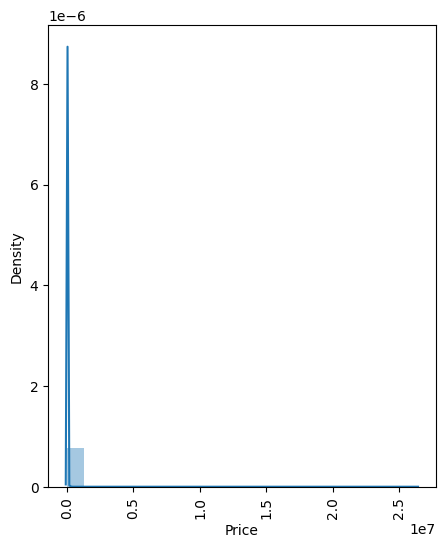

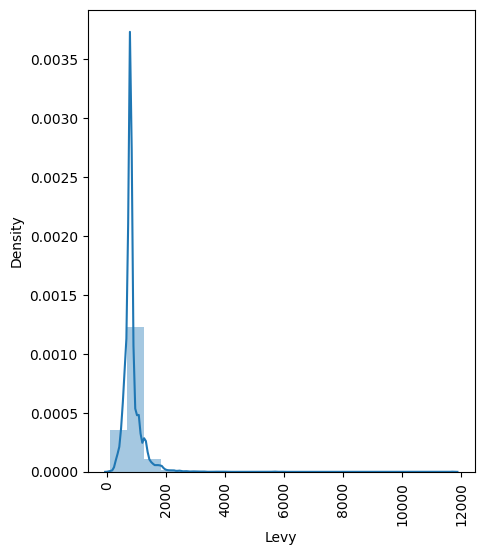

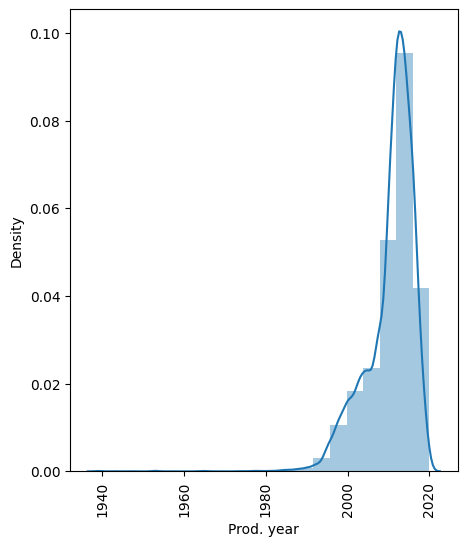

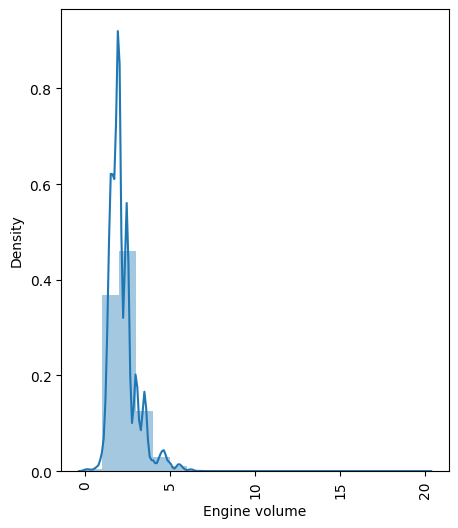

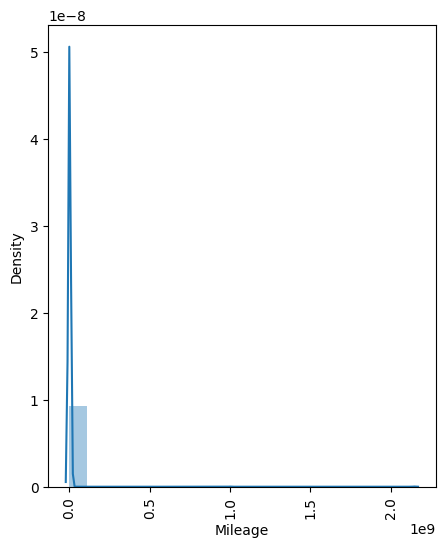

In [48]:
for i in continuous:
    plt.figure(figsize=(5,6))
    sns.distplot(df[i],bins=20,kde=True)
    plt.xticks(rotation=90)
    plt.show()

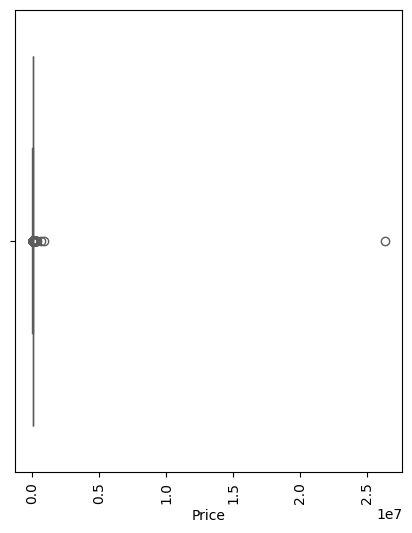

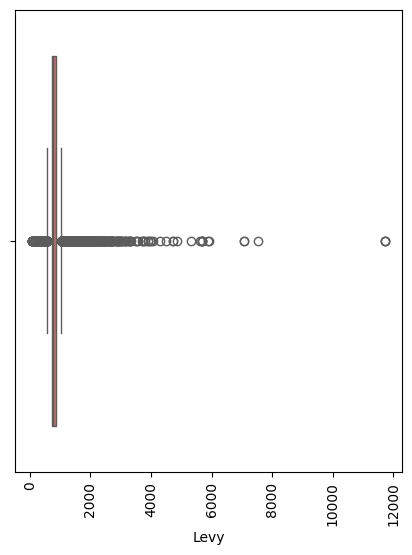

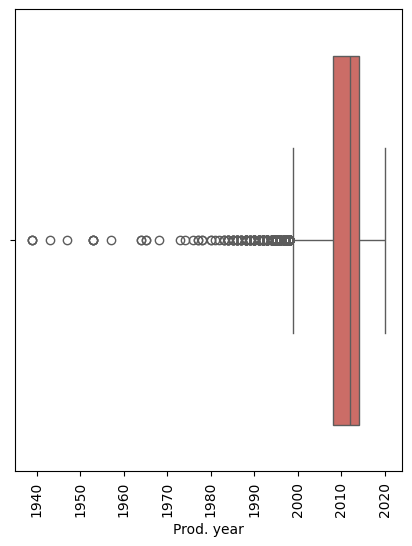

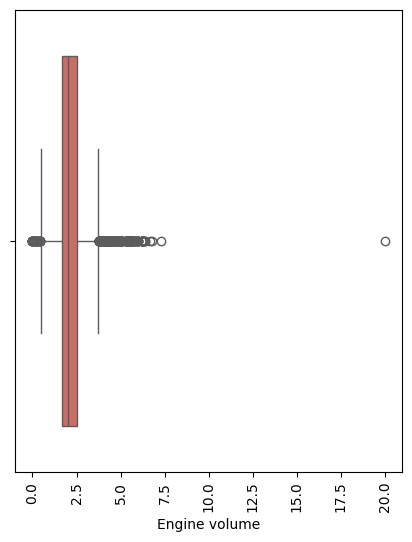

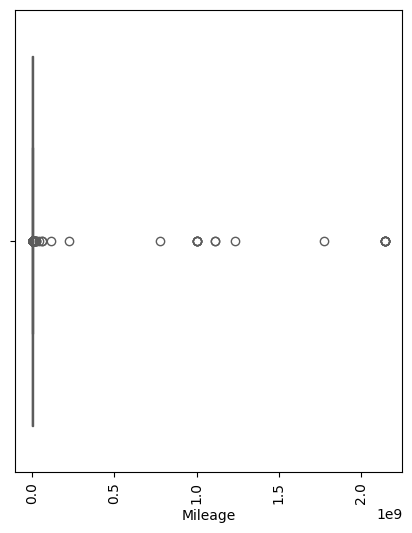

In [49]:
for i in continuous:
    plt.figure(figsize=(5,6))
    sns.boxplot(x=df[i],data=df,palette='hls')
    plt.xticks(rotation=90)
    plt.show()

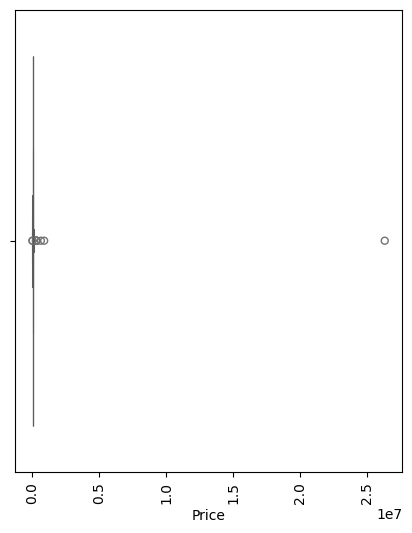

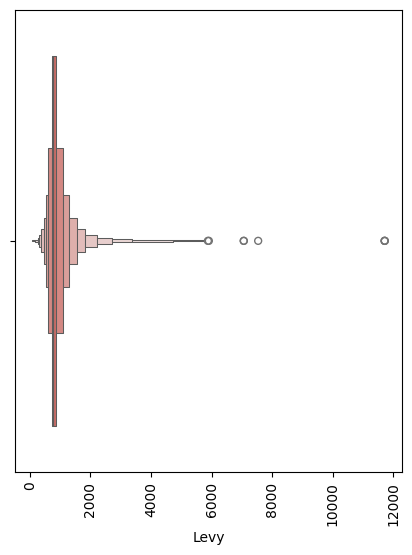

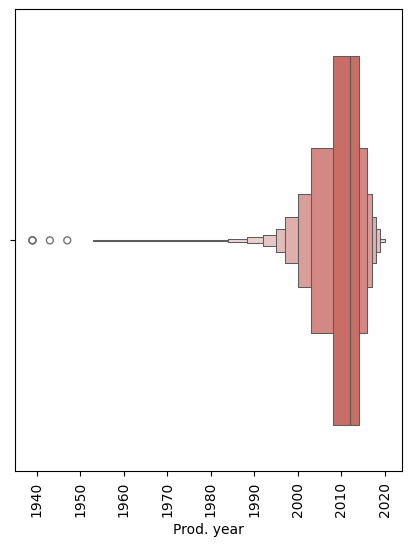

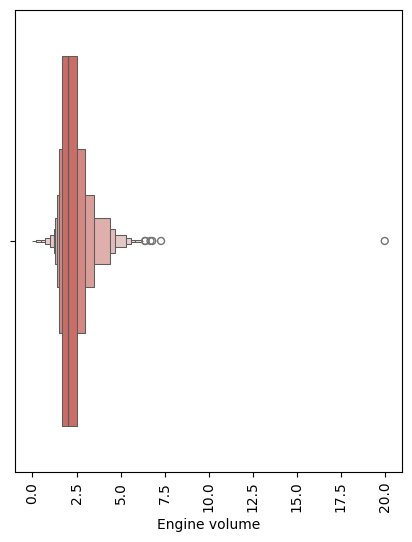

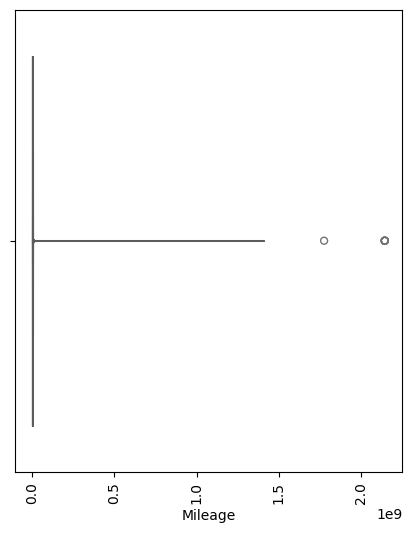

In [50]:
for i in continuous:
    plt.figure(figsize=(5,6))
    sns.boxenplot(x=df[i],data=df,palette='hls')
    plt.xticks(rotation=90)
    plt.show()

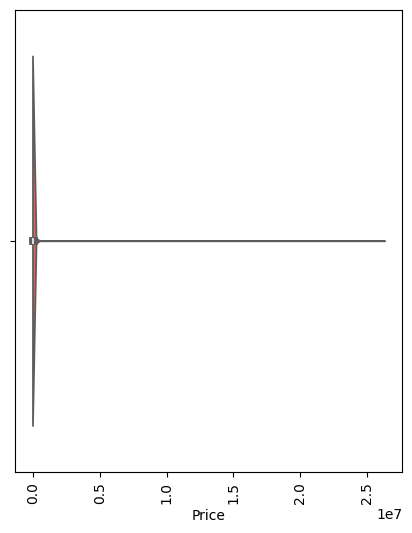

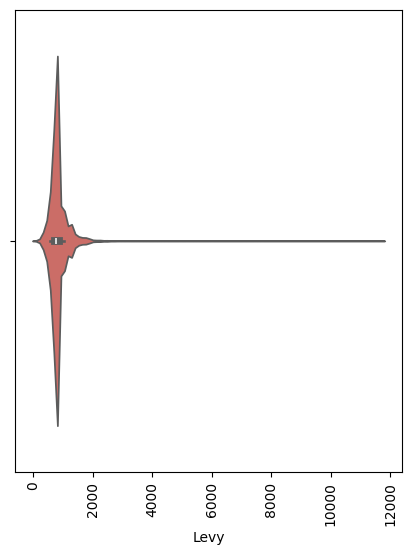

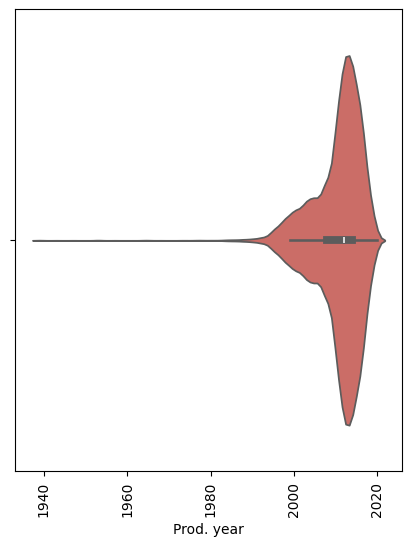

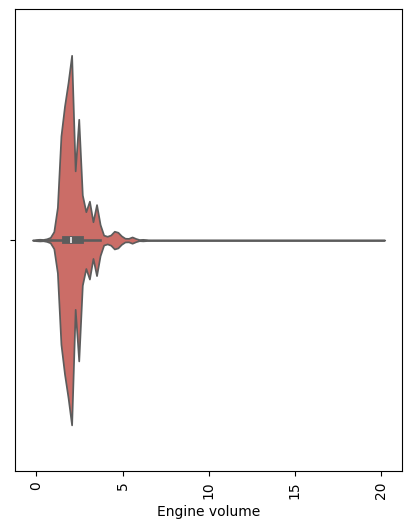

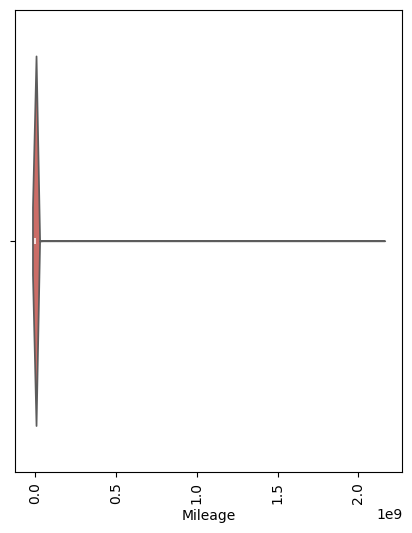

In [51]:
for i in continuous:
    plt.figure(figsize=(5,6))
    sns.violinplot(x=df[i],data=df,palette='hls')
    plt.xticks(rotation=90)
    plt.show()

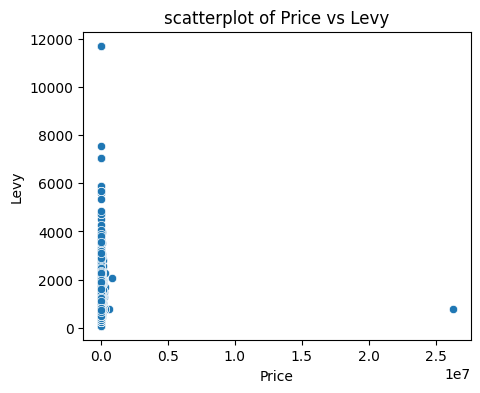

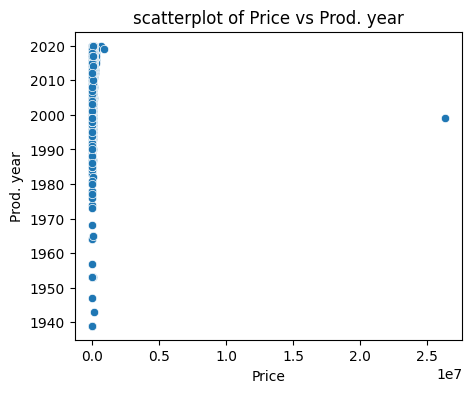

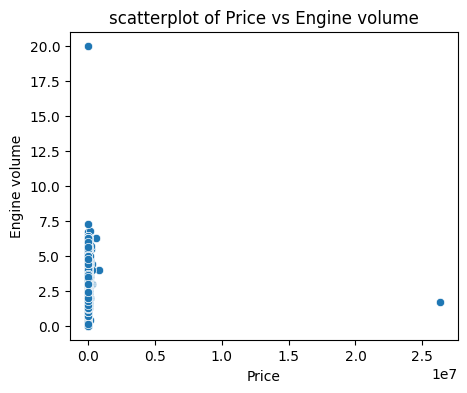

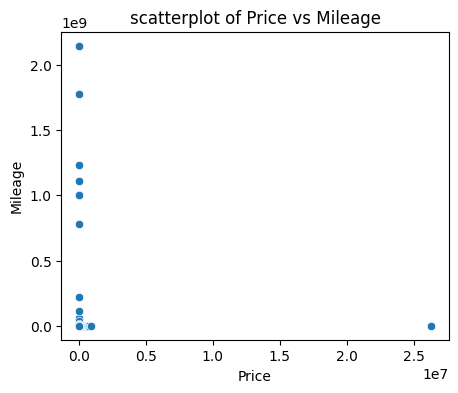

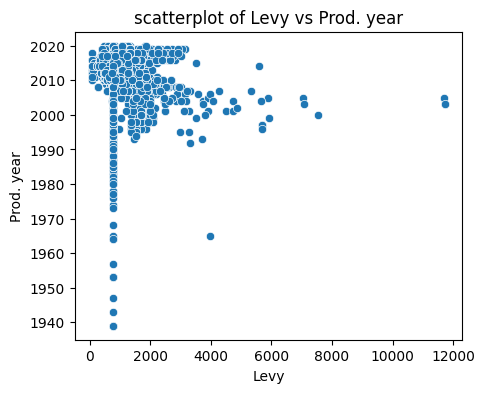

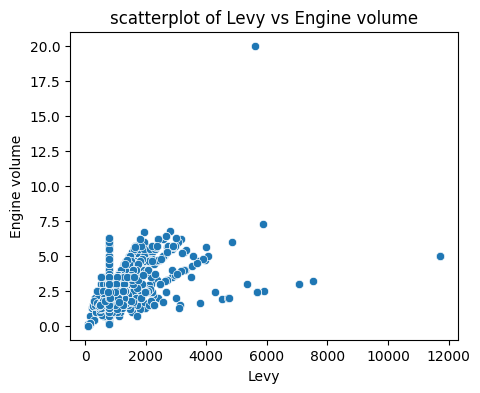

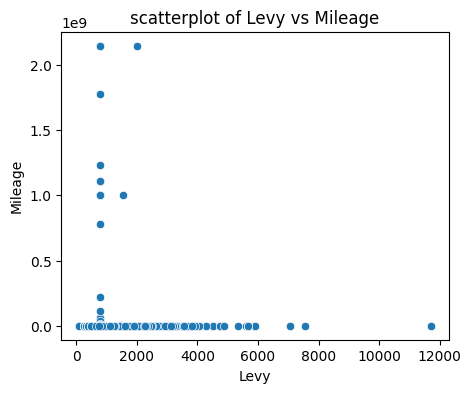

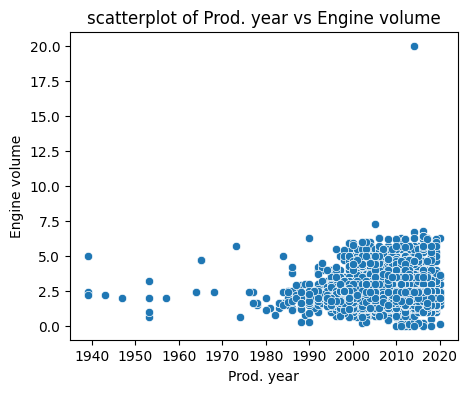

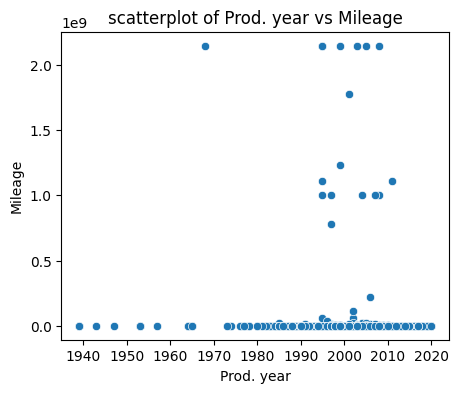

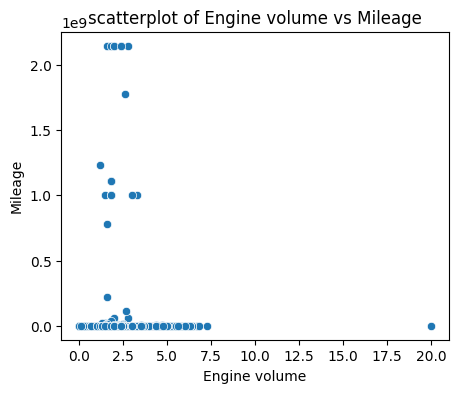

In [52]:
for i in range(len(continuous)):
    for j in range(i+1,len(continuous)):
        plt.figure(figsize=(5,4))
        sns.scatterplot(x=continuous[i],y=continuous[j],data=df,palette='hls')
        plt.title(f'scatterplot of {continuous[i]} vs {continuous[j]}')
        plt.show()


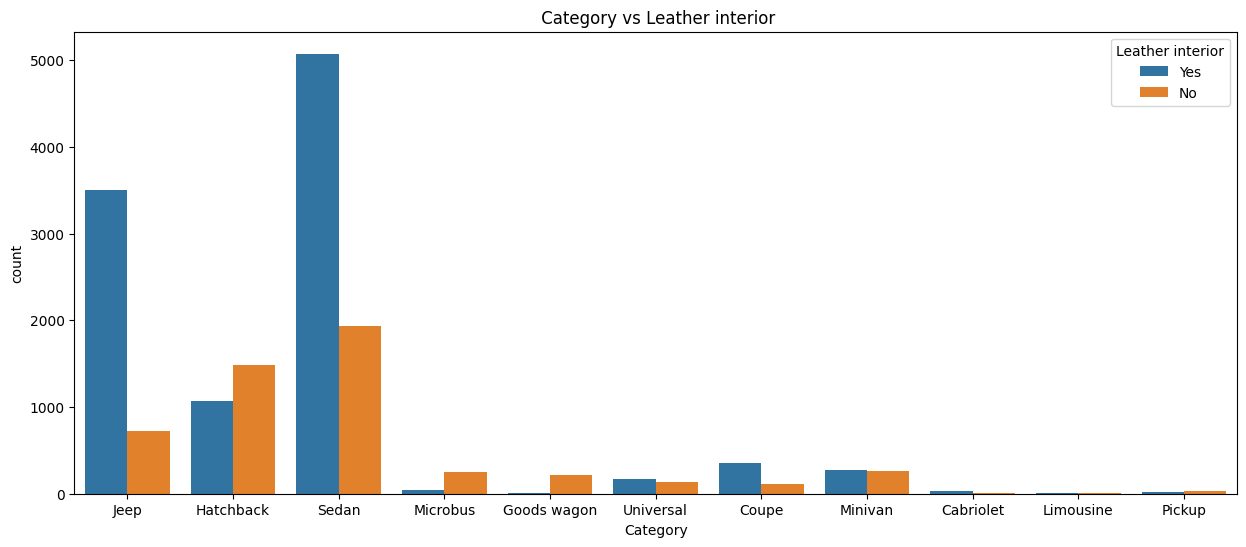

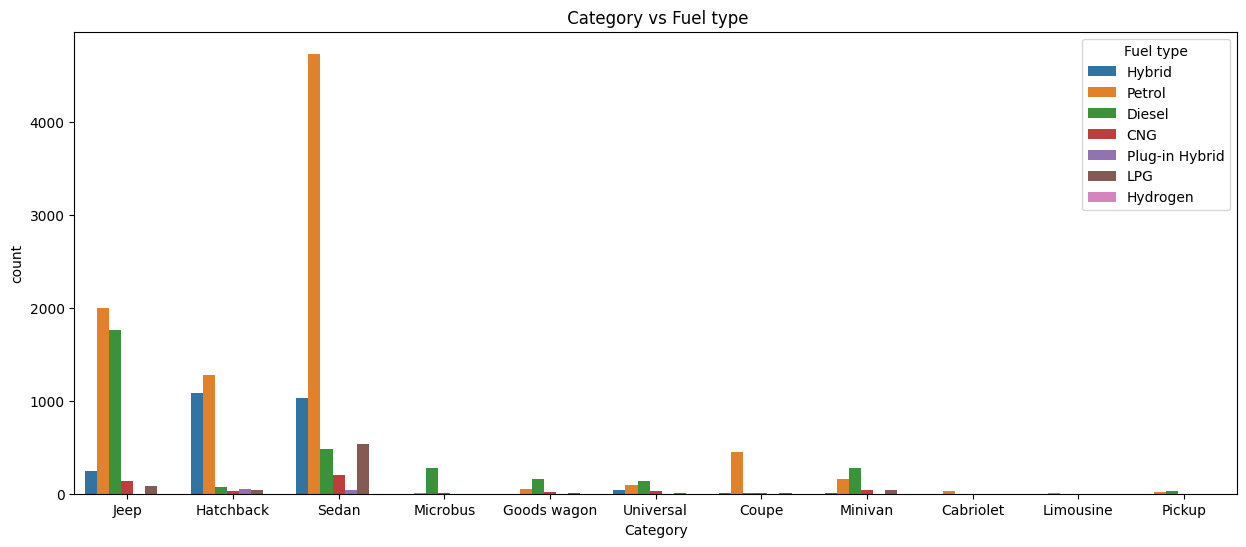

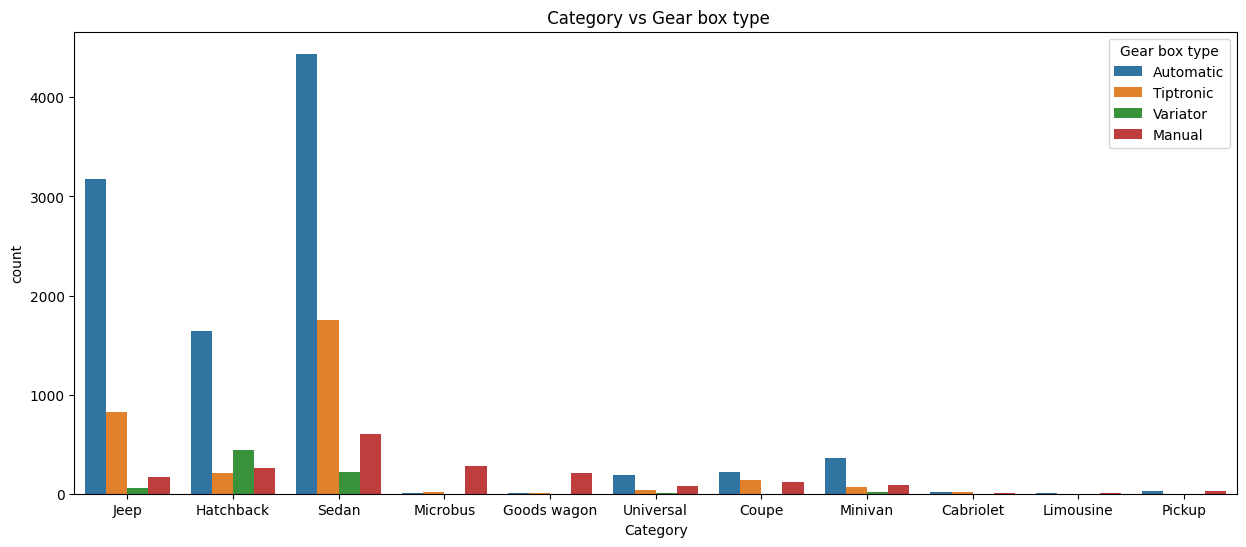

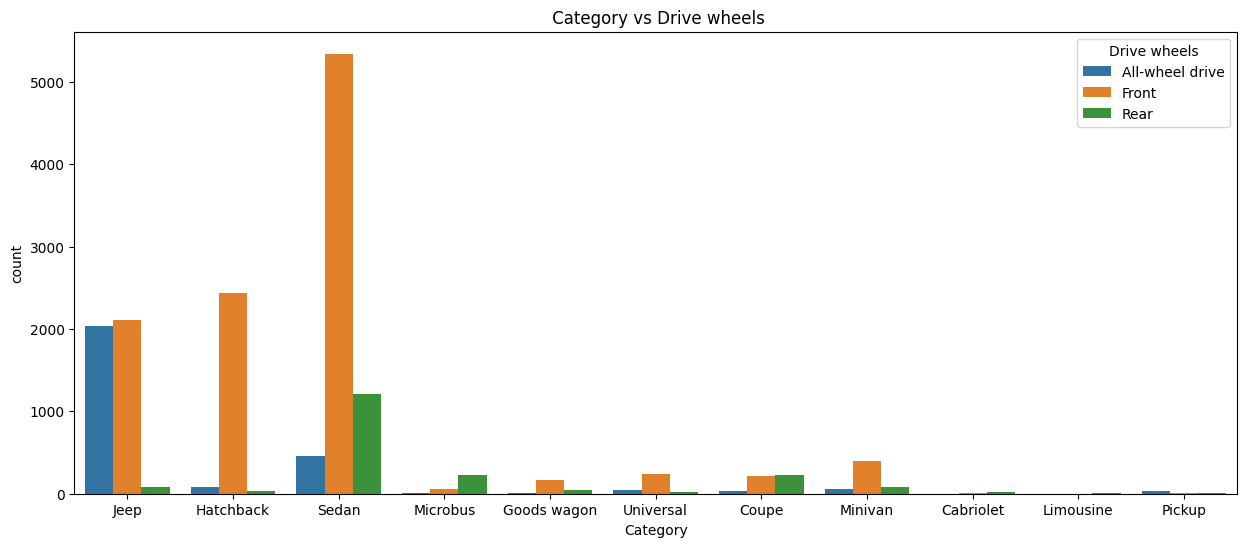

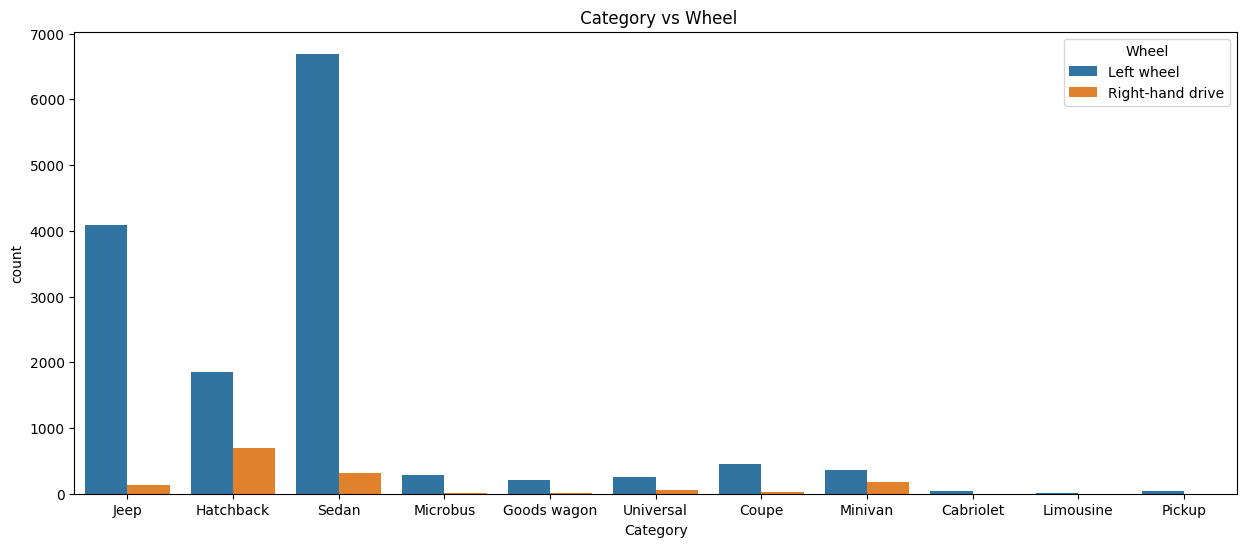

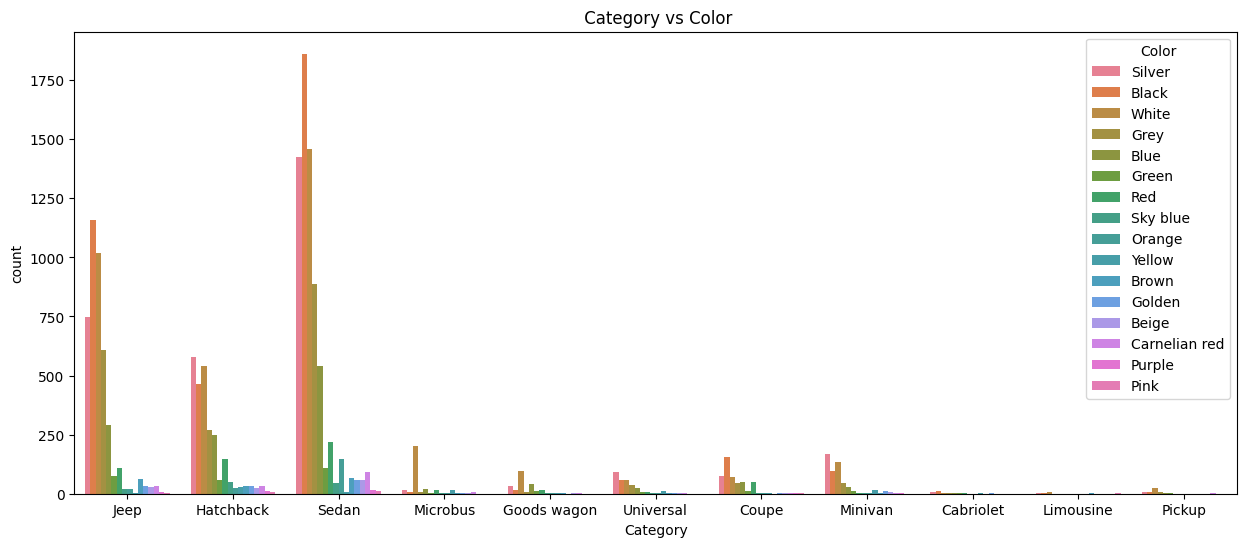

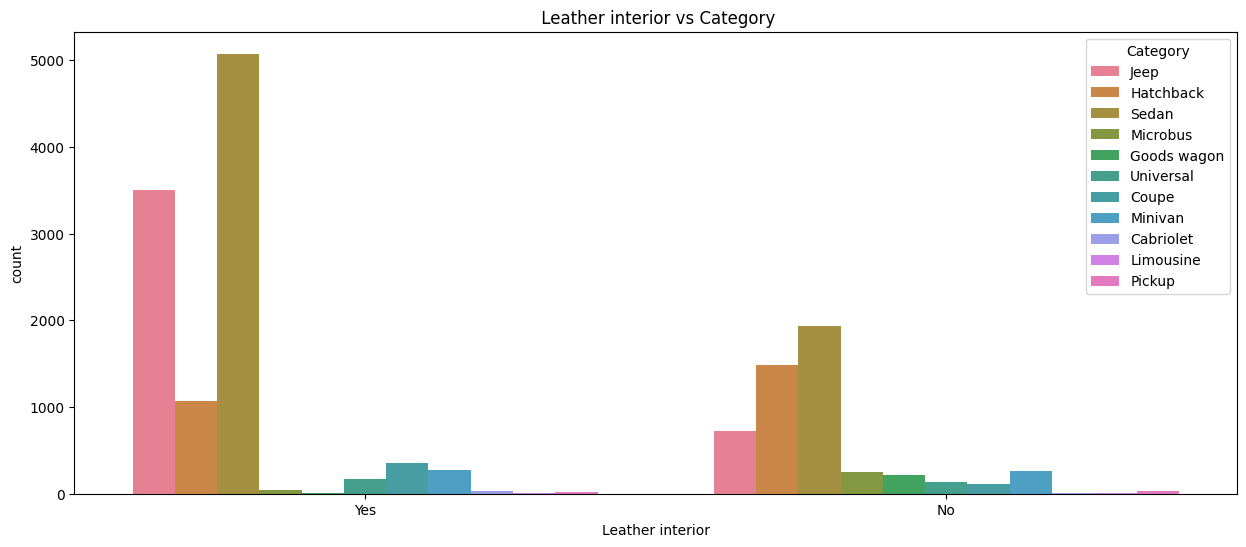

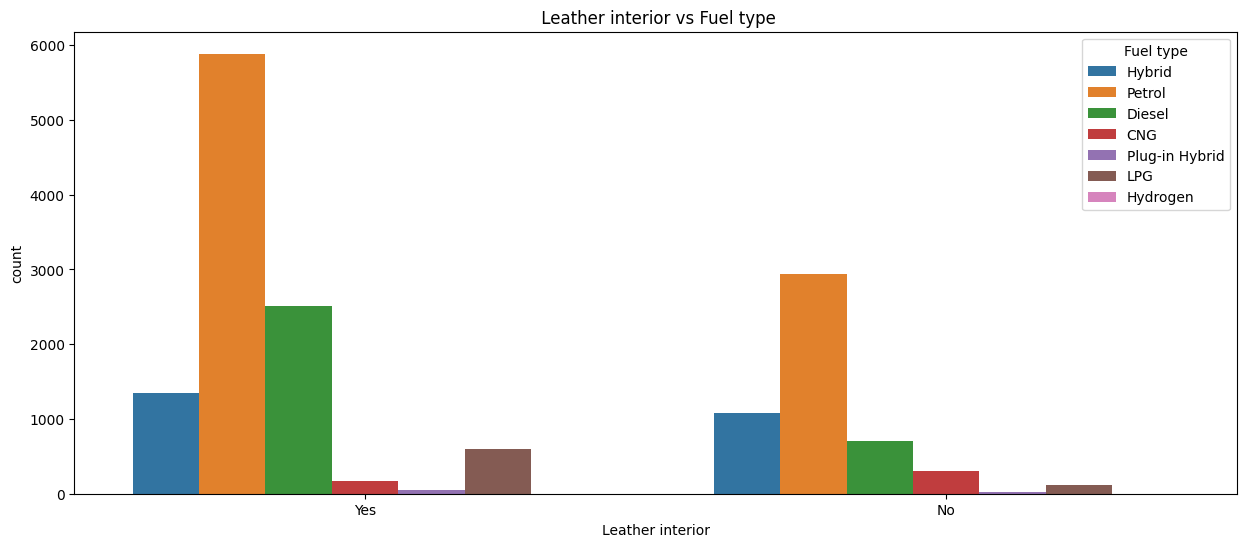

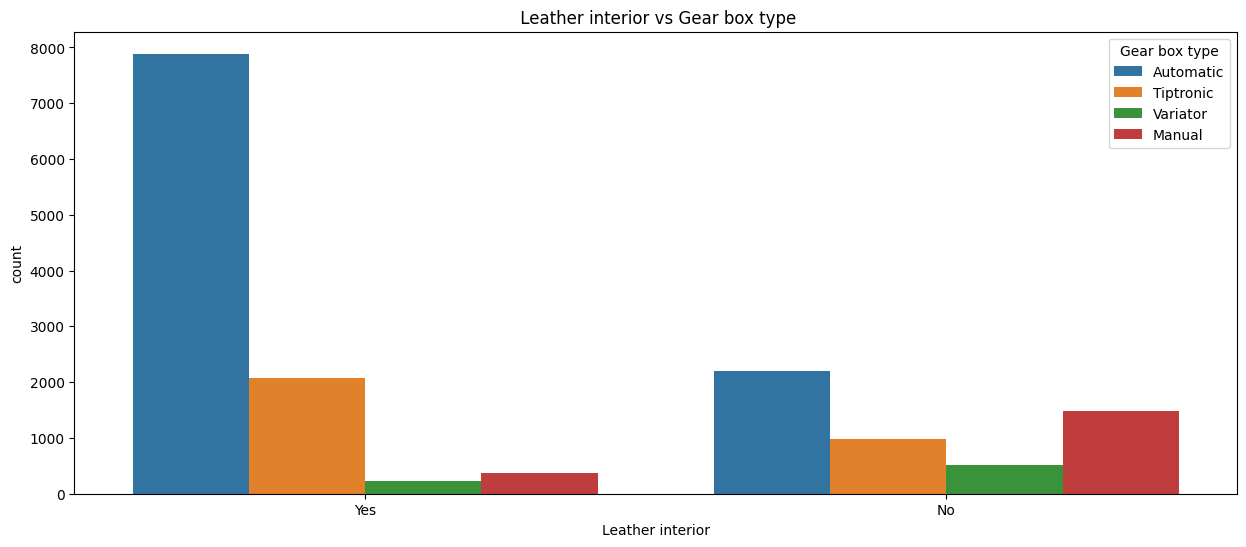

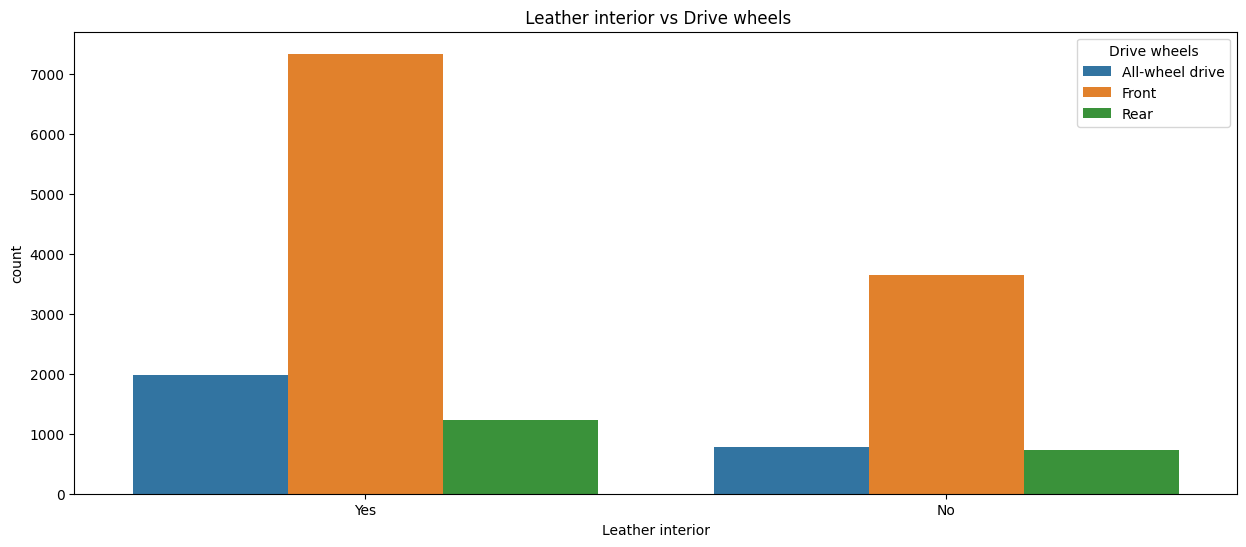

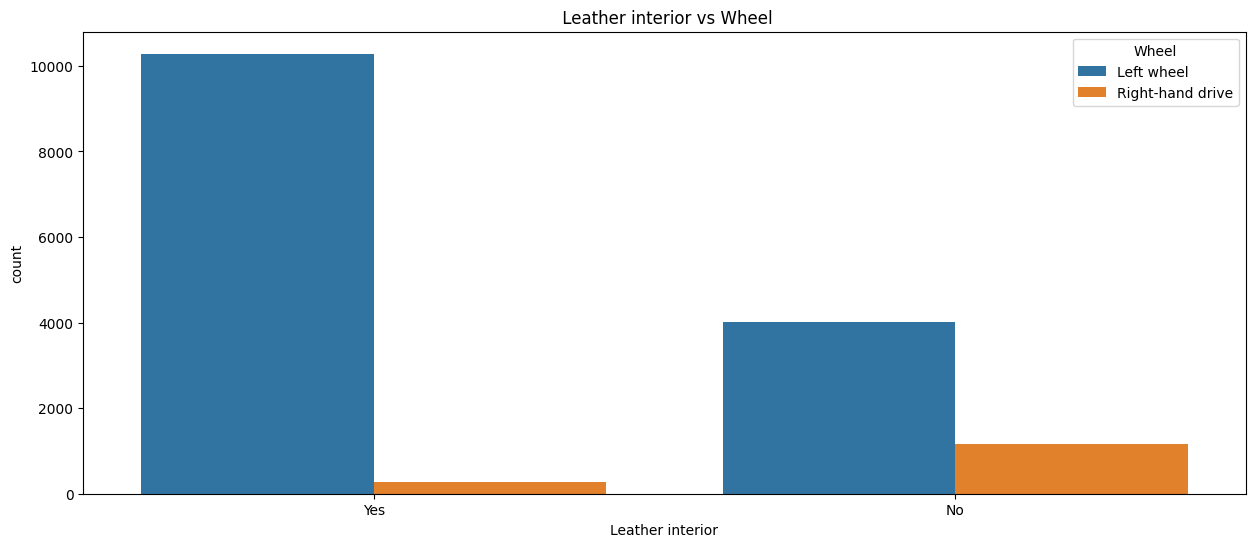

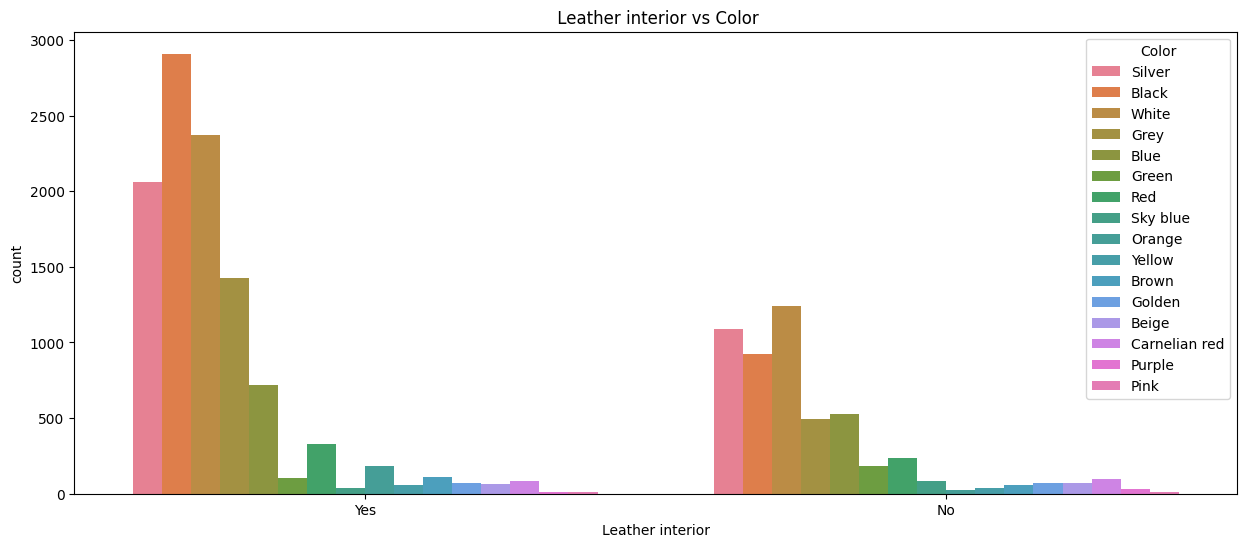

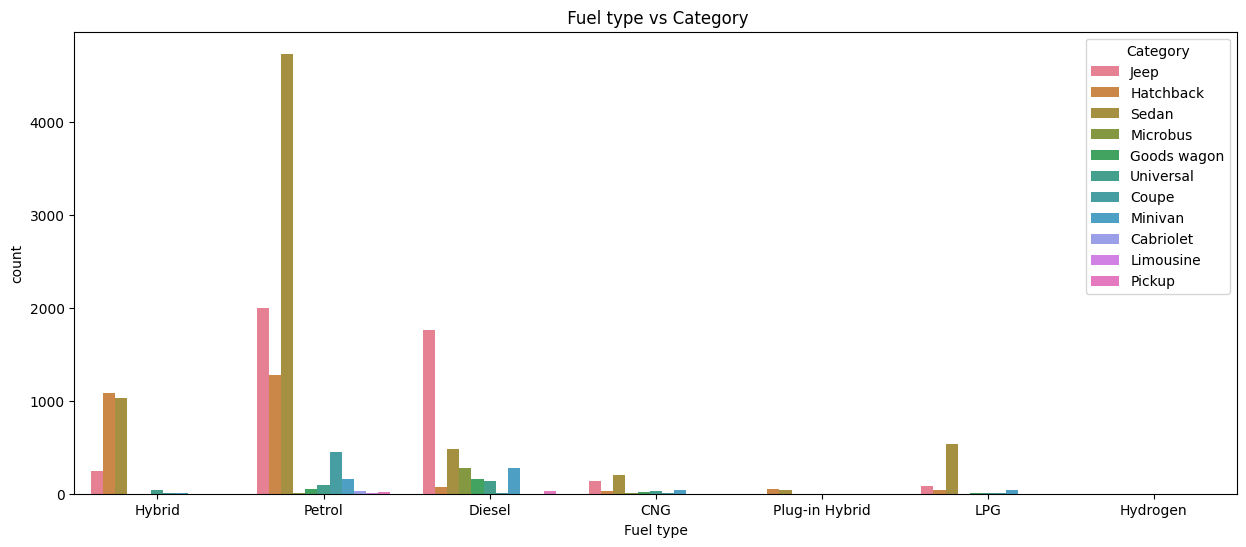

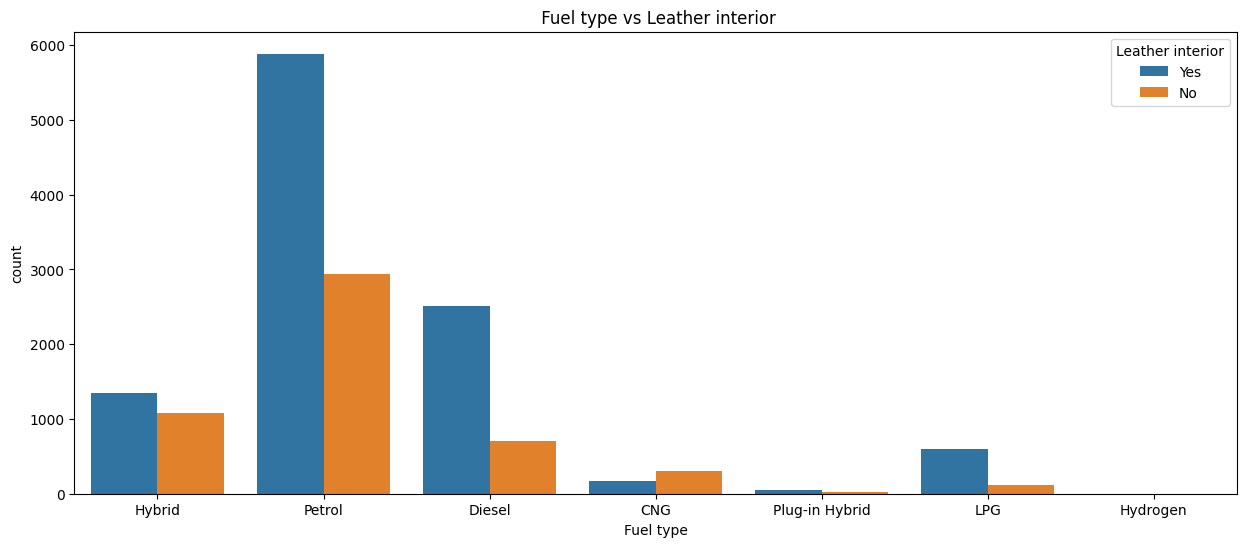

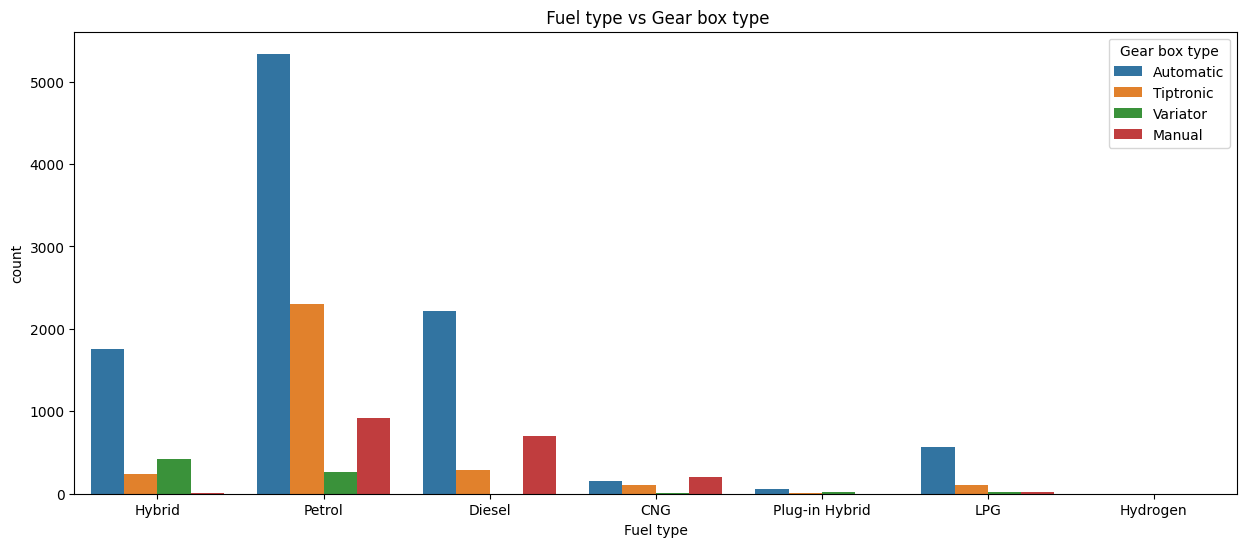

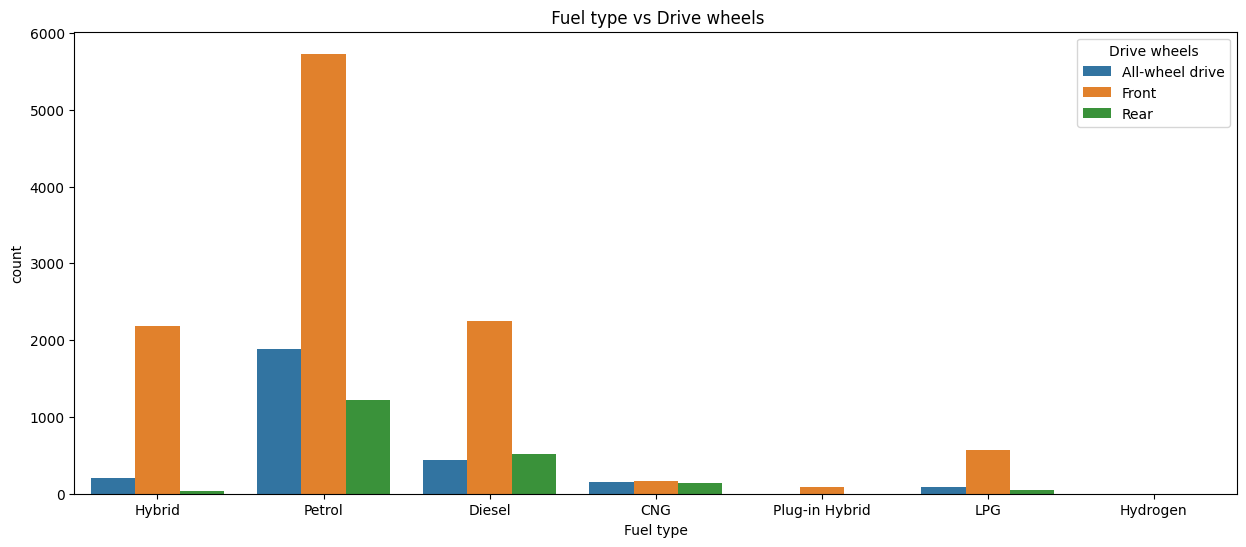

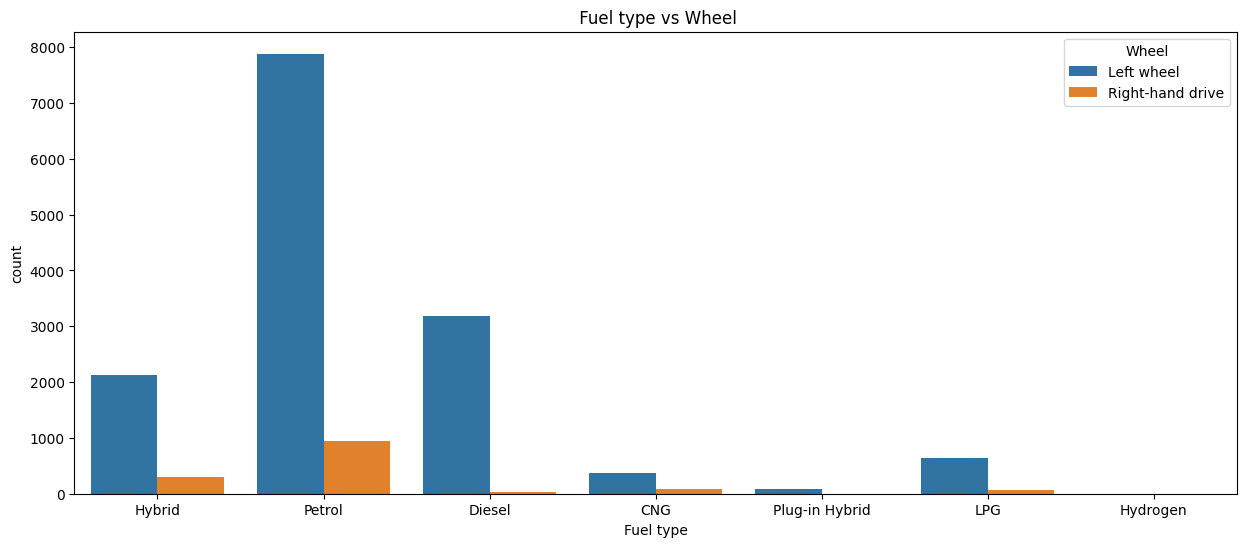

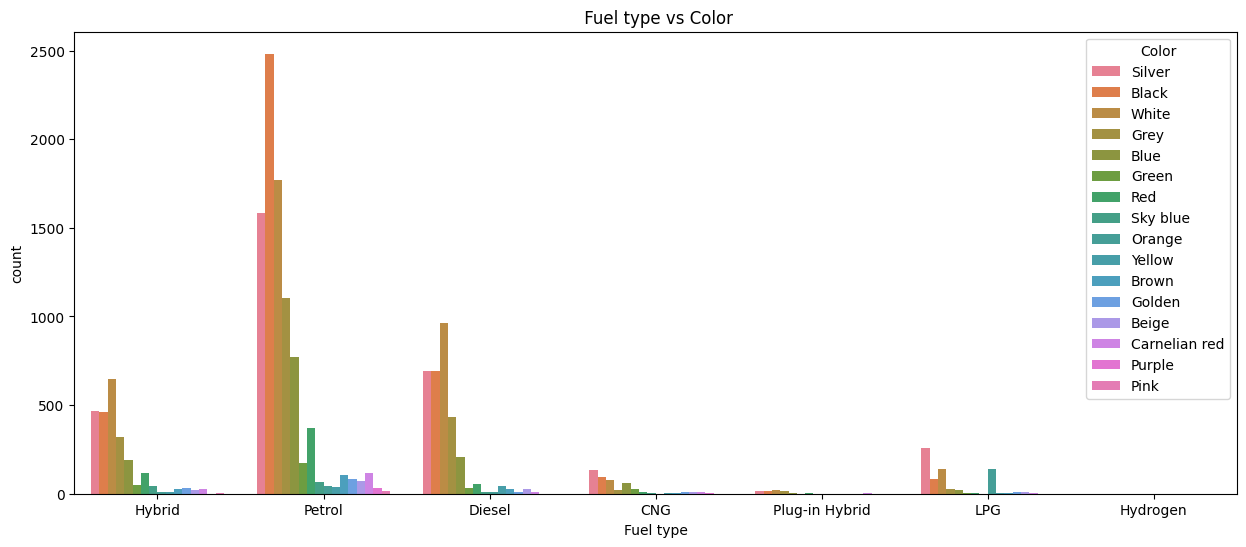

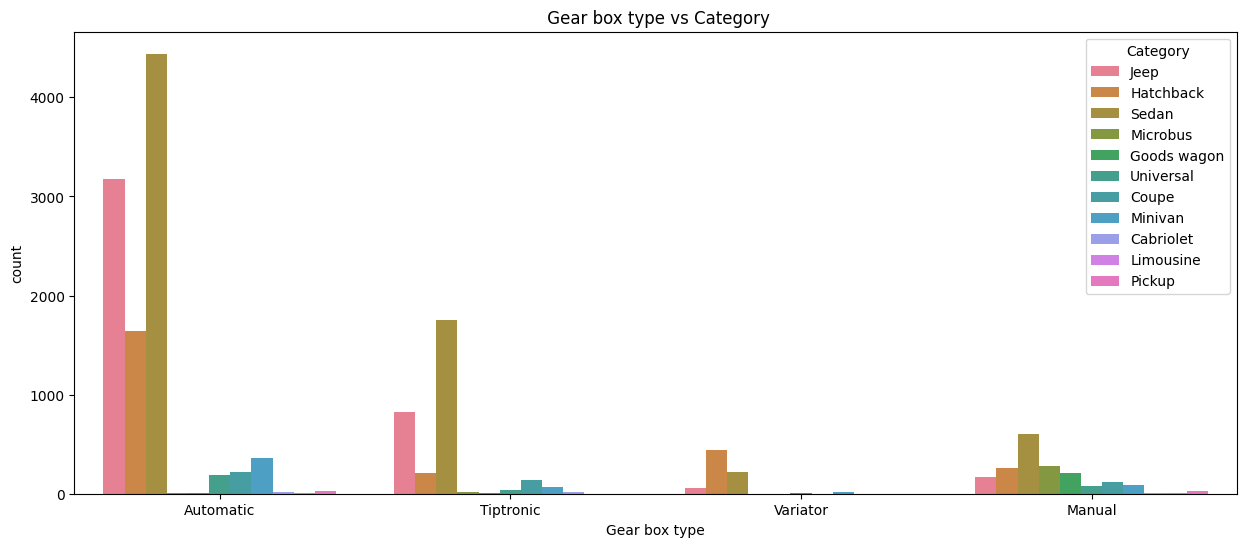

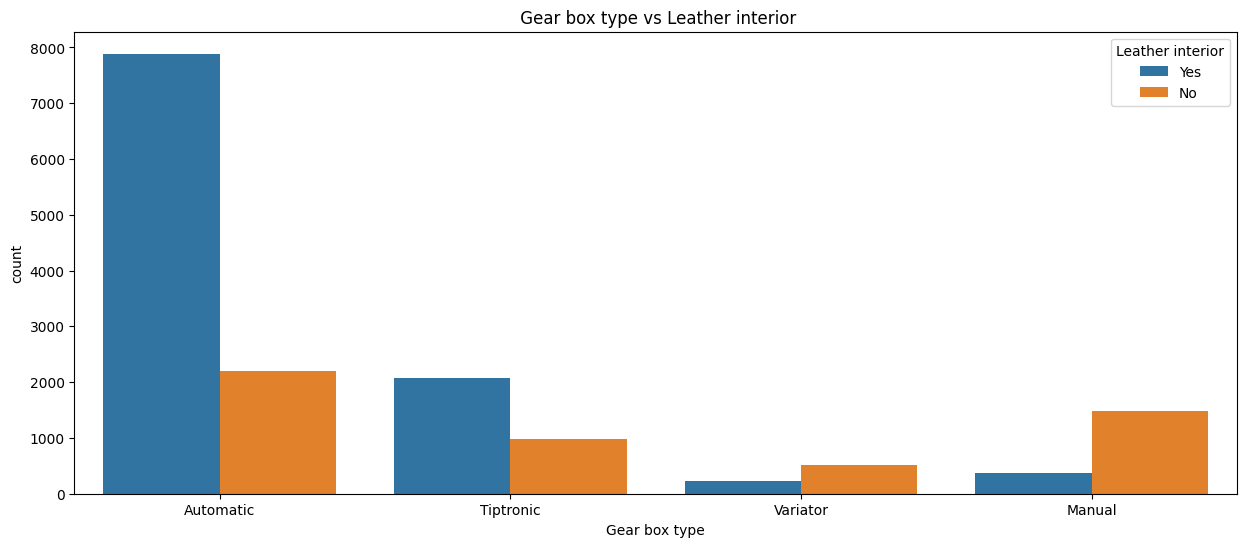

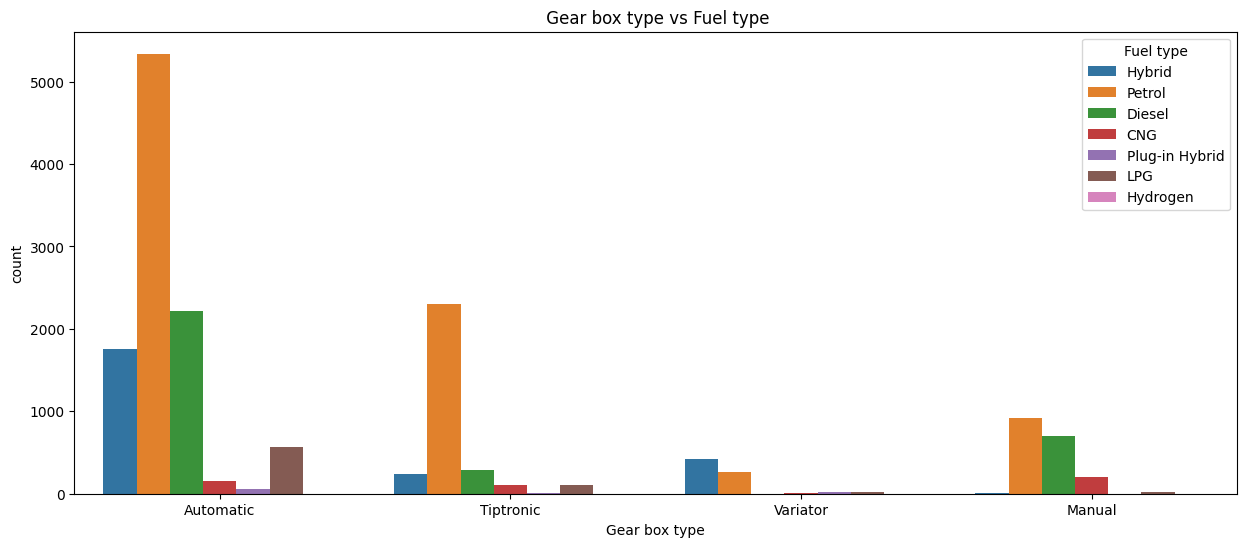

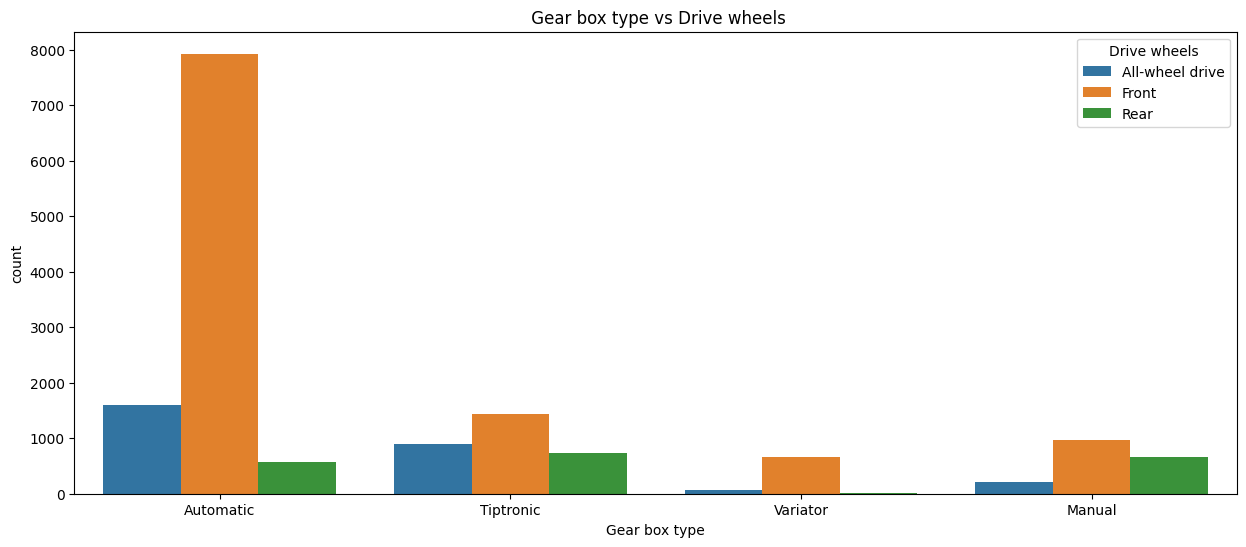

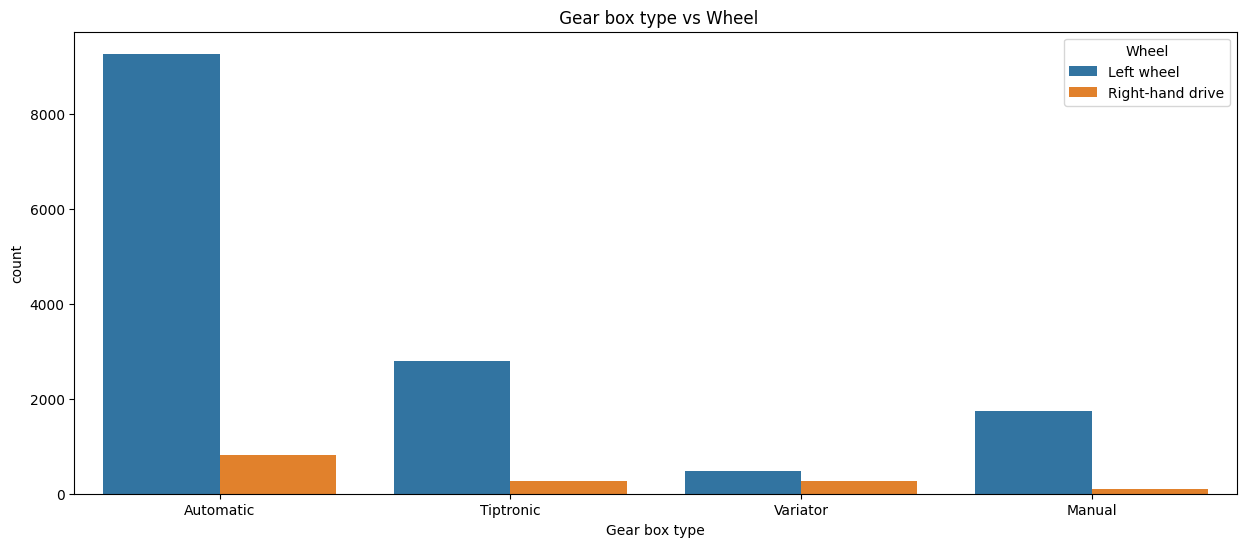

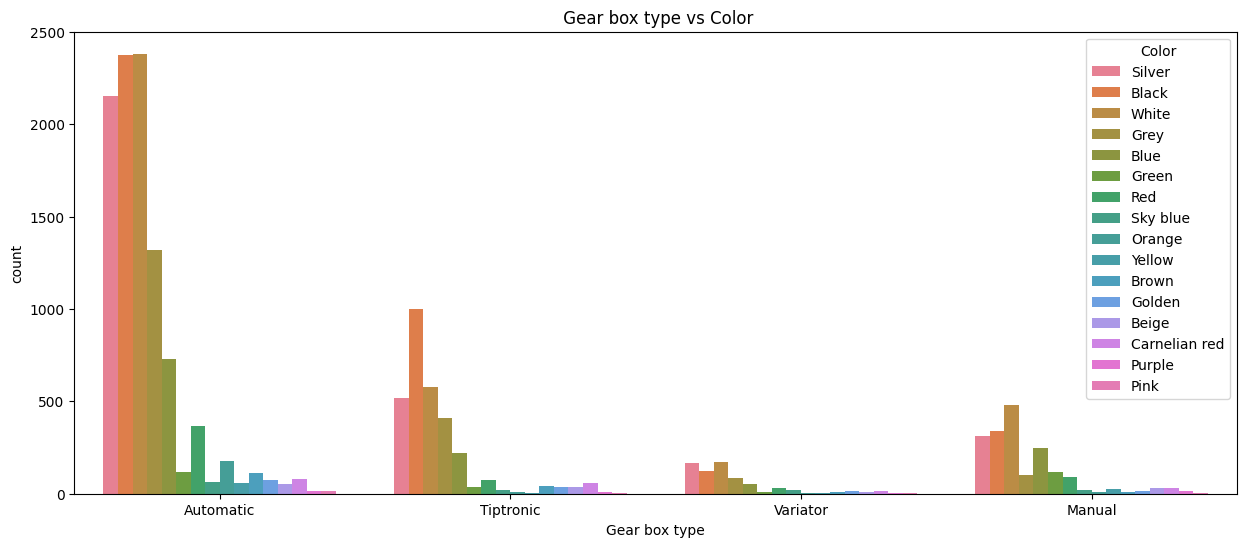

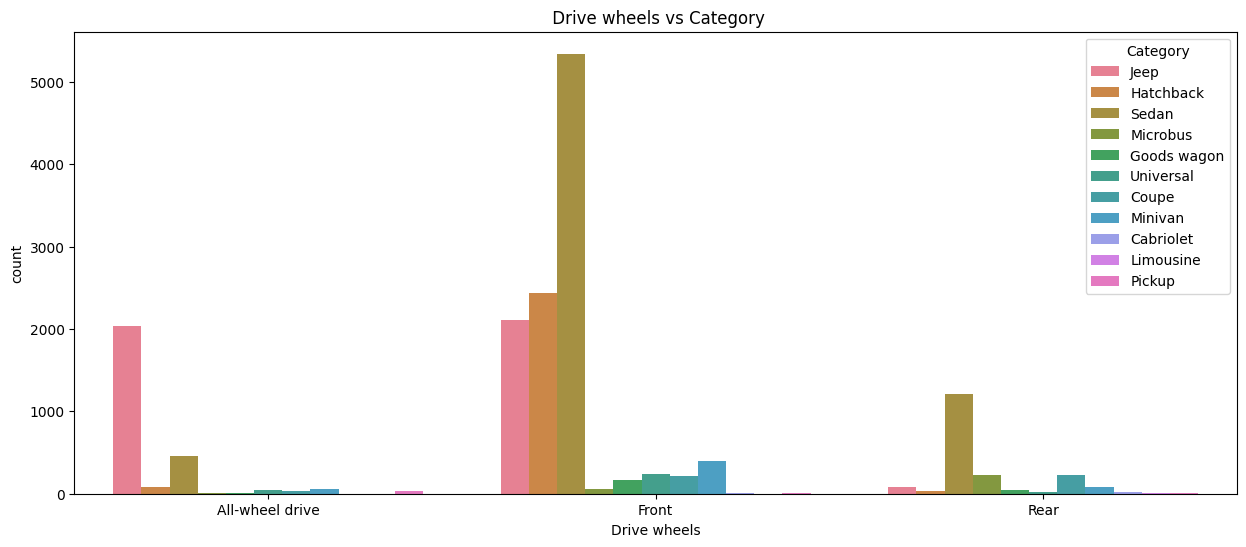

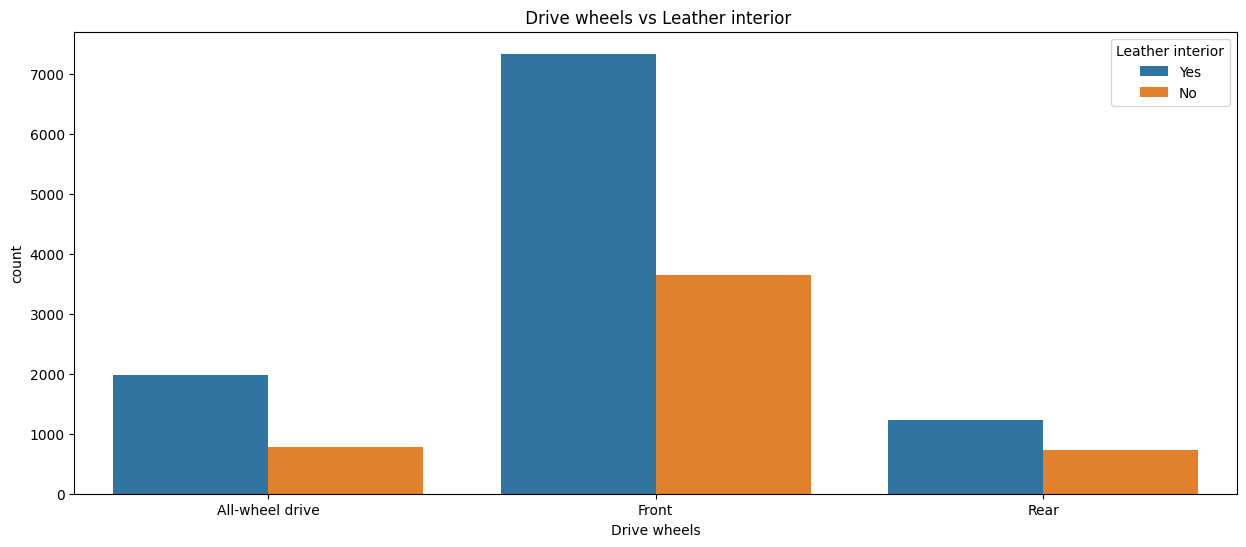

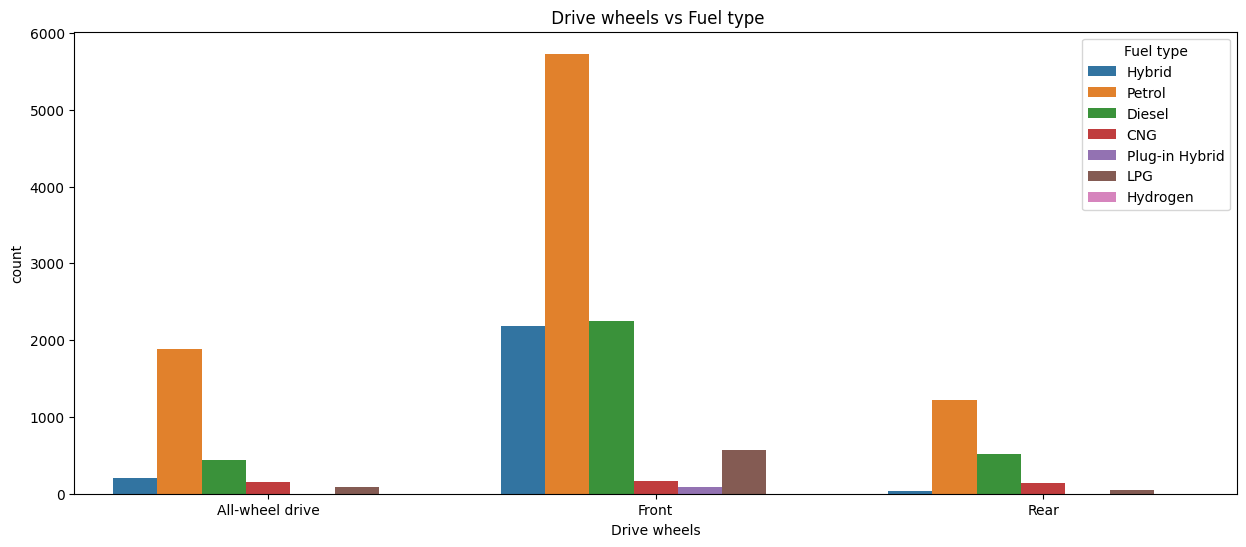

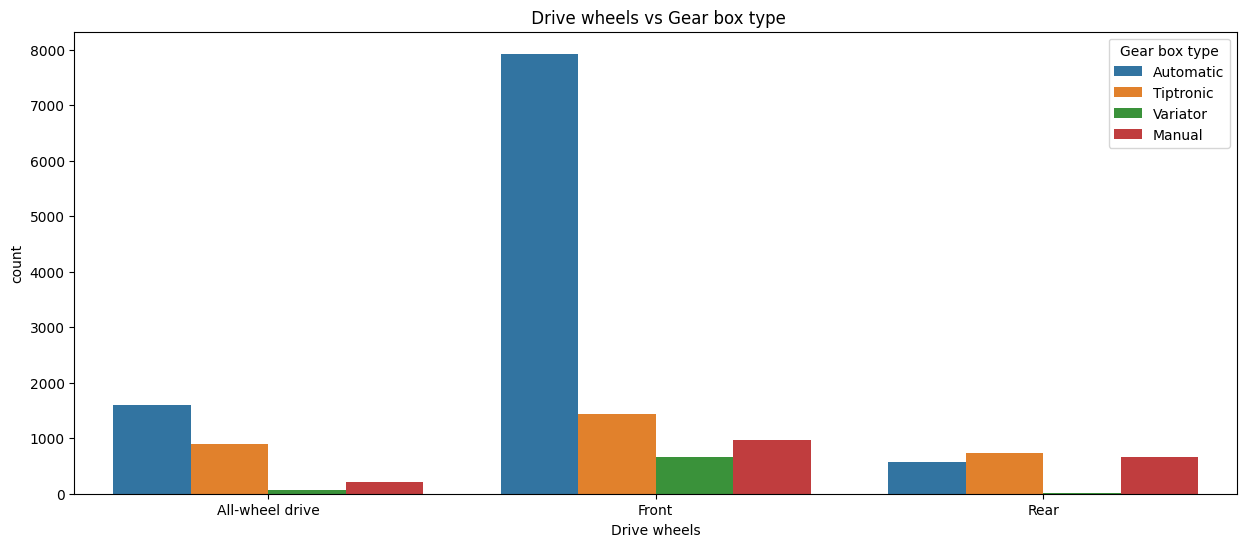

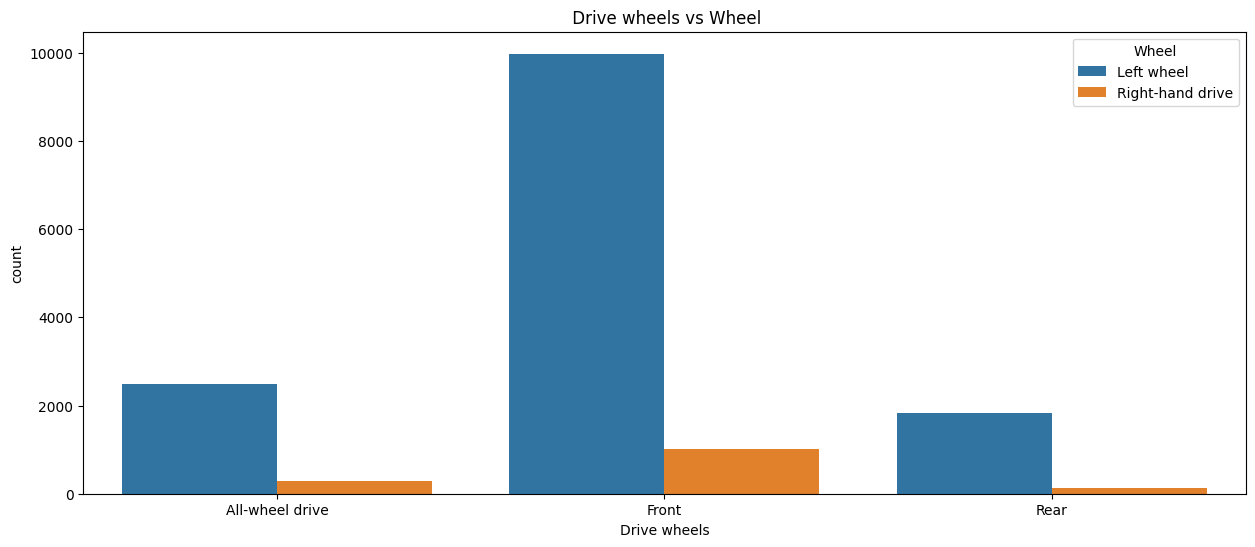

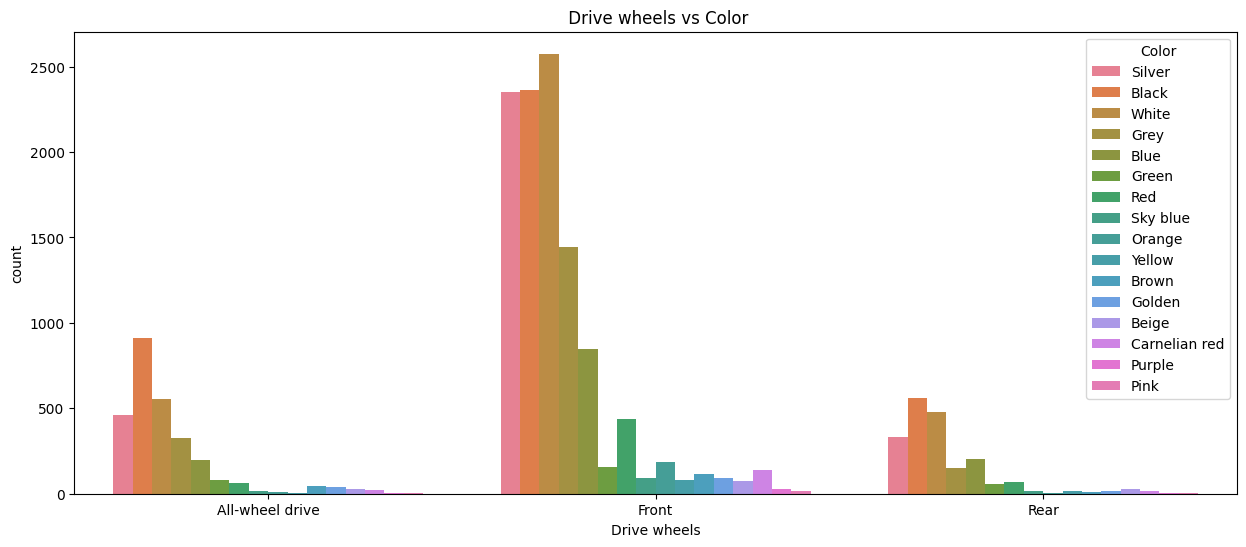

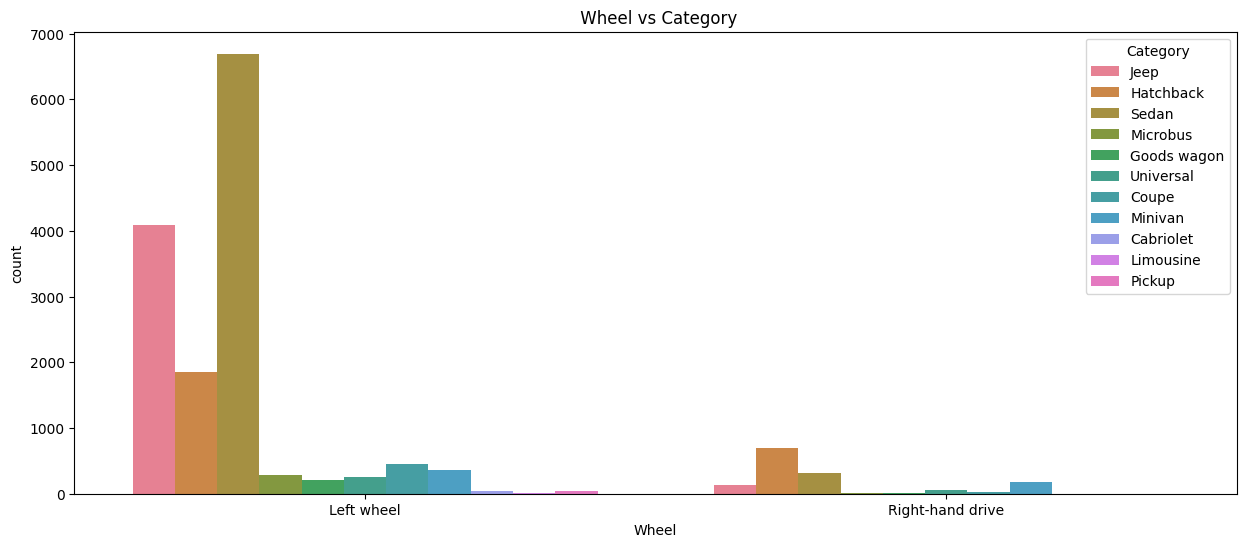

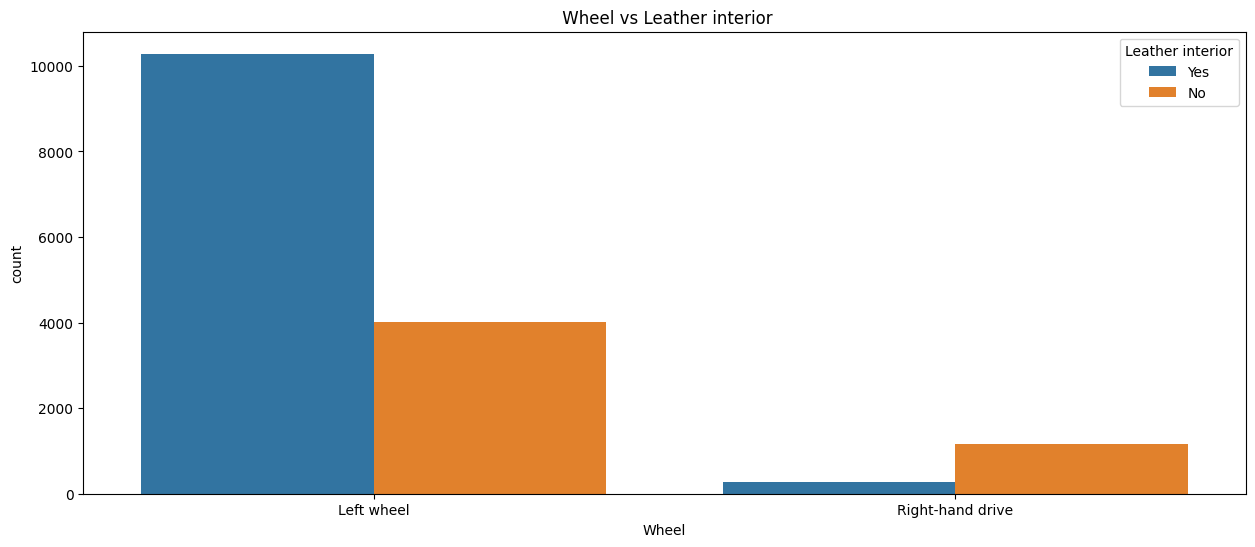

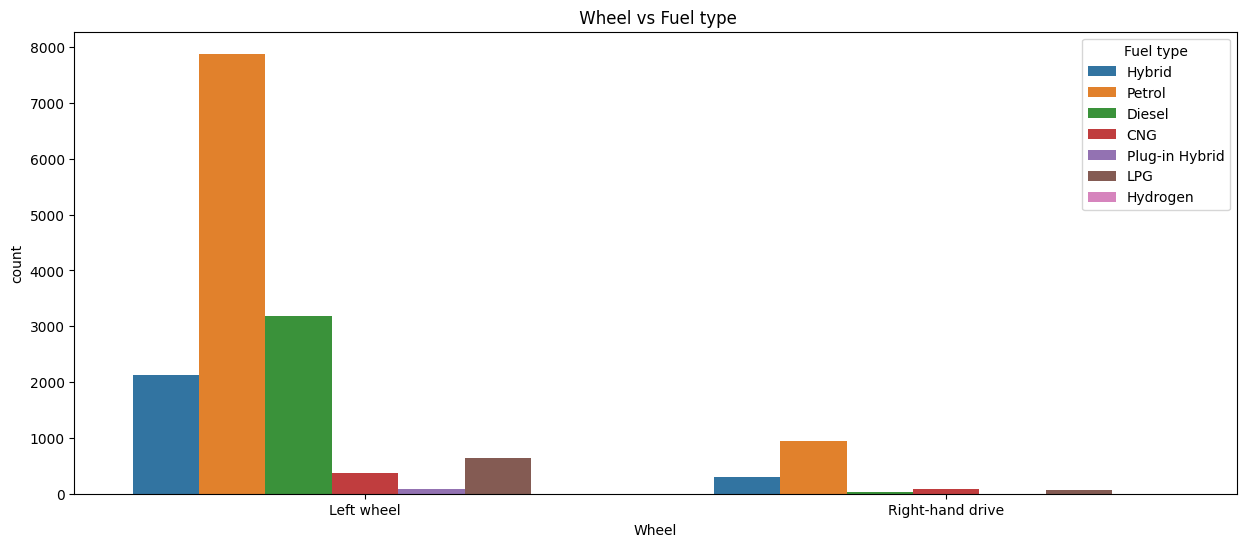

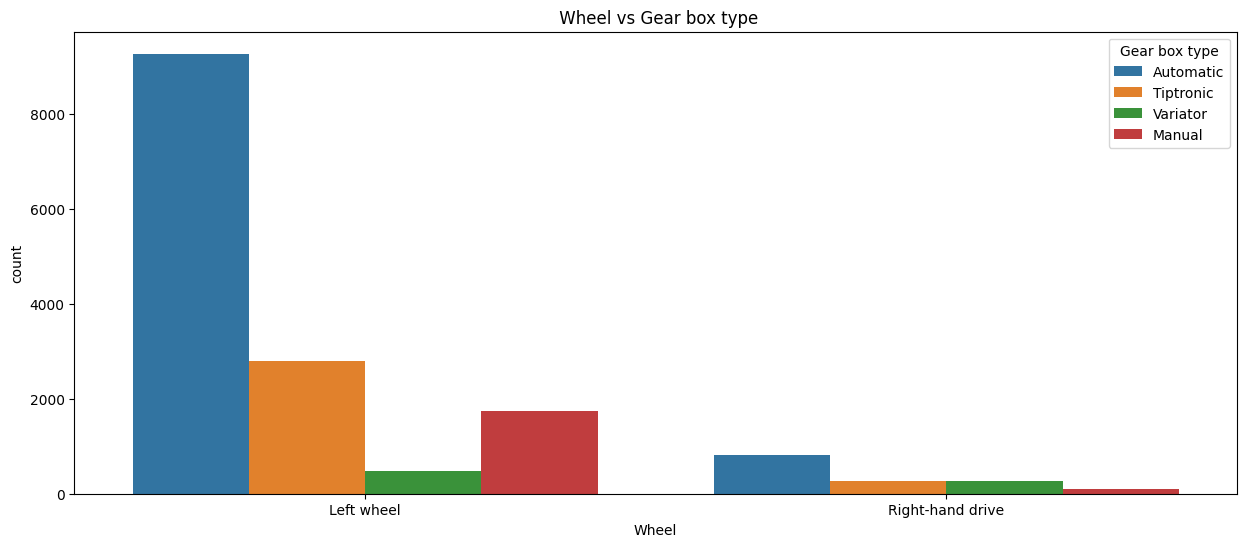

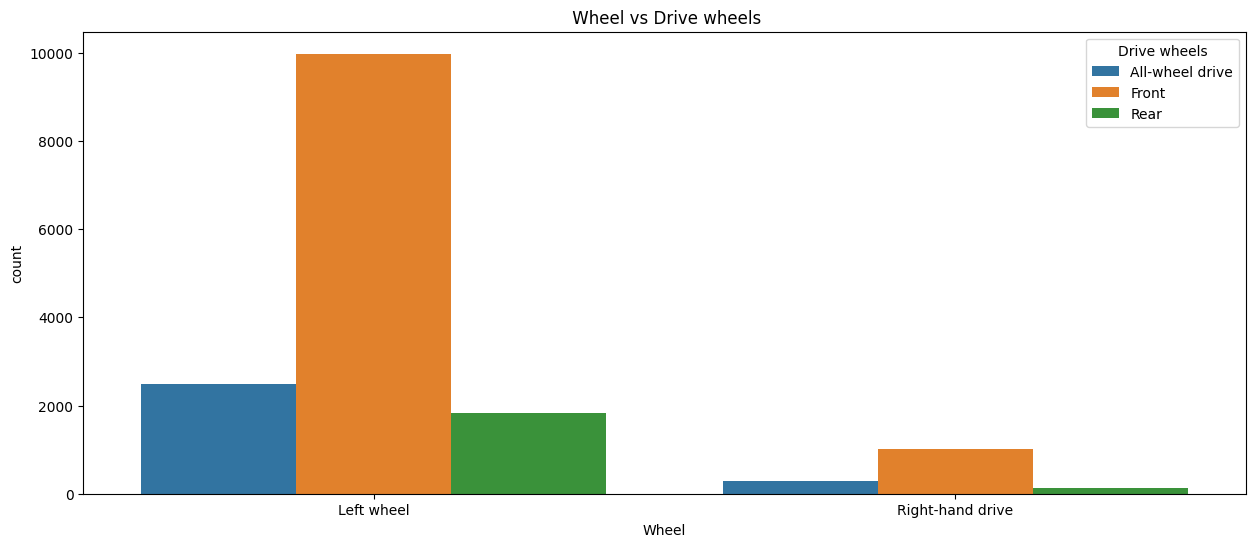

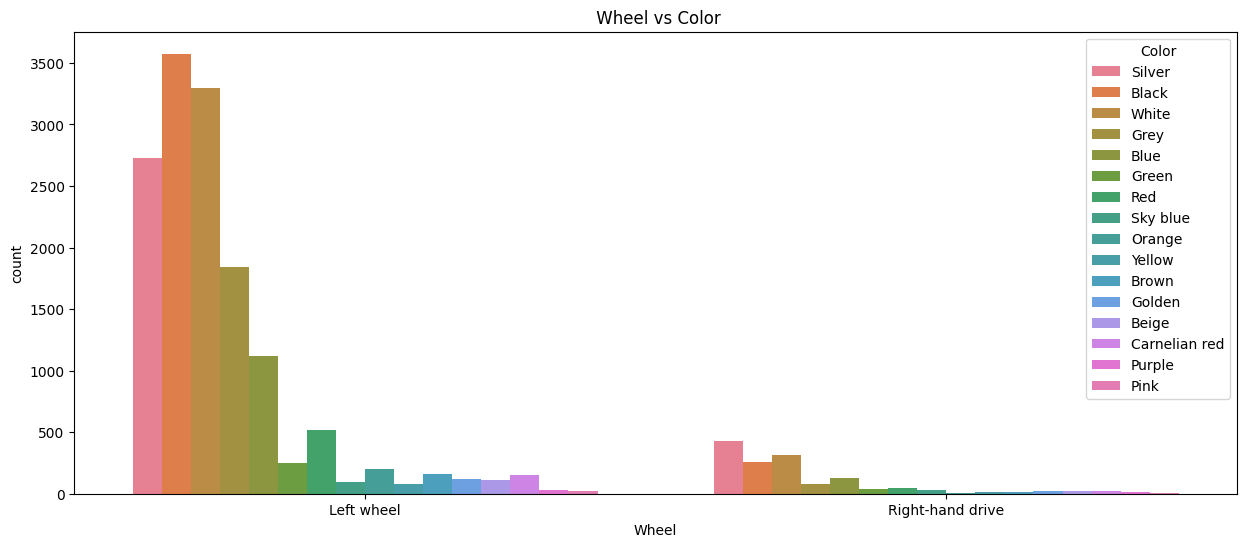

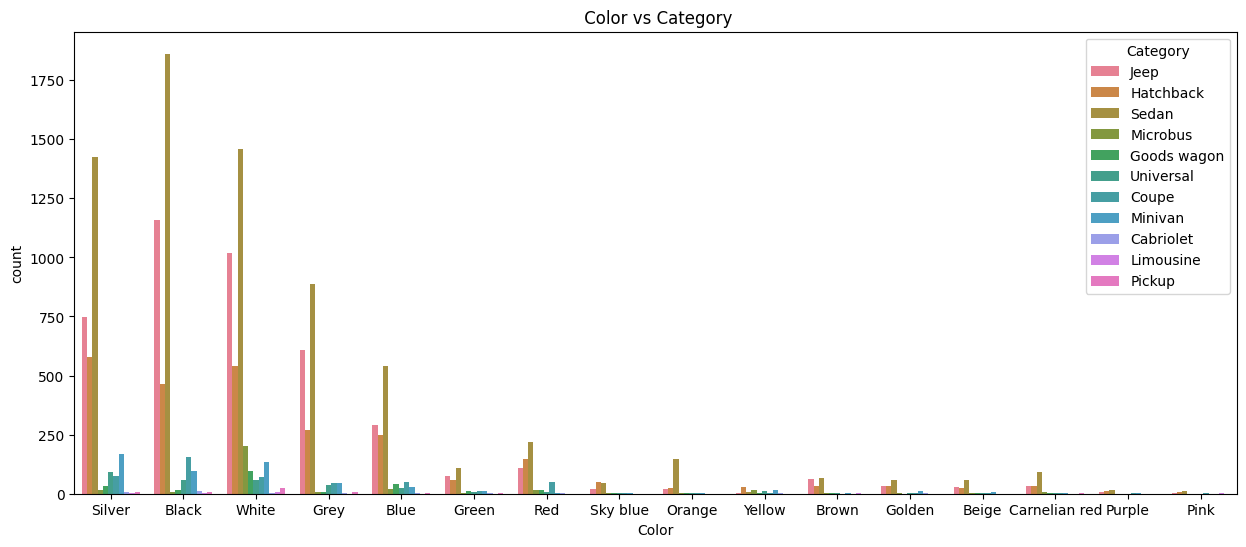

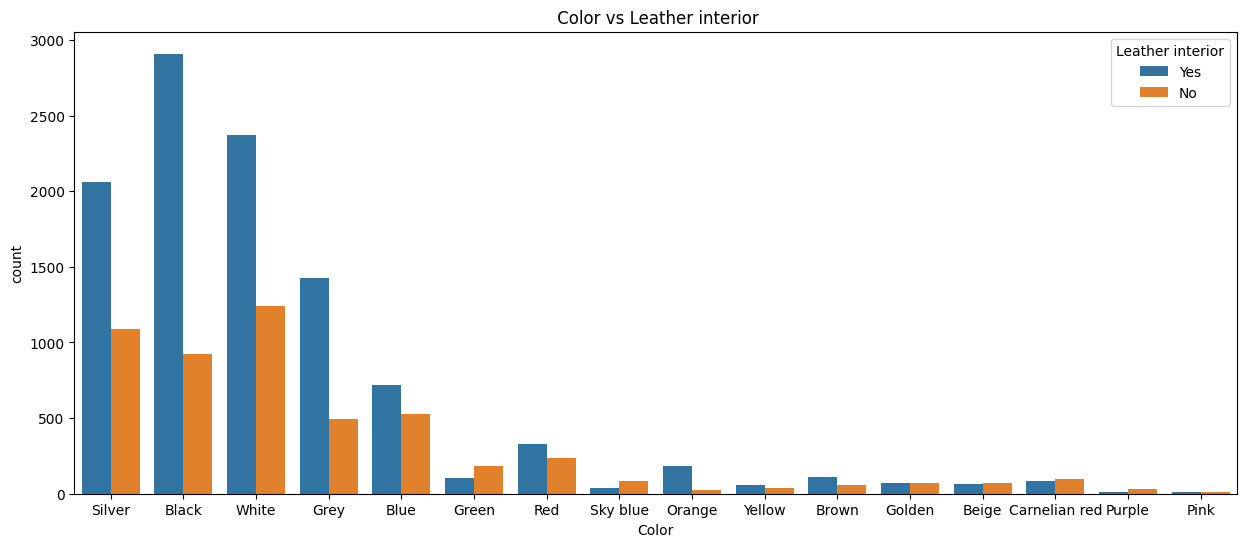

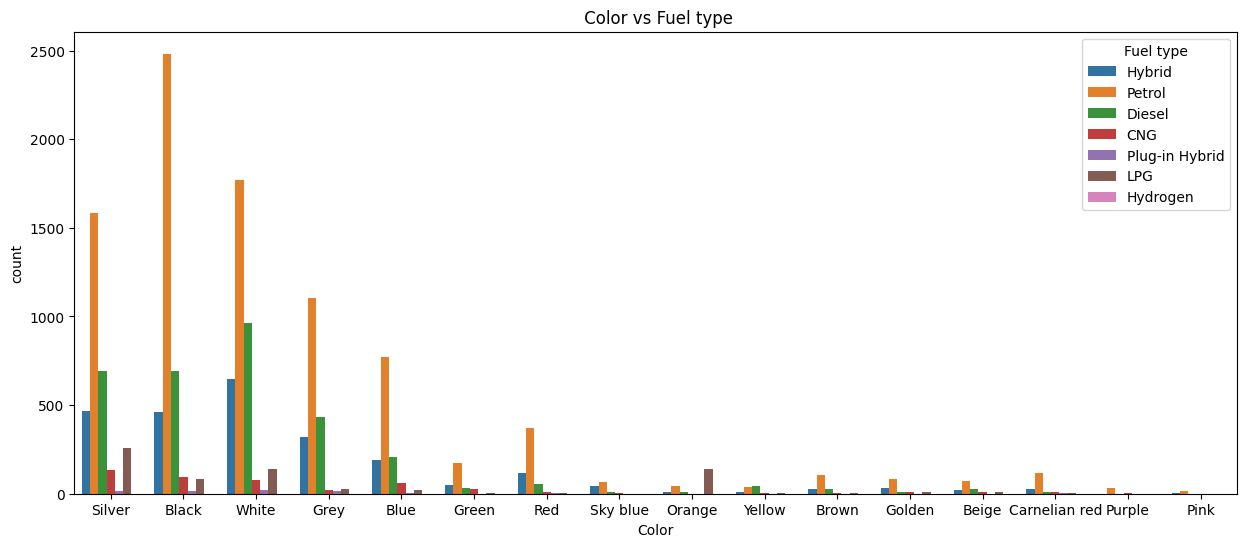

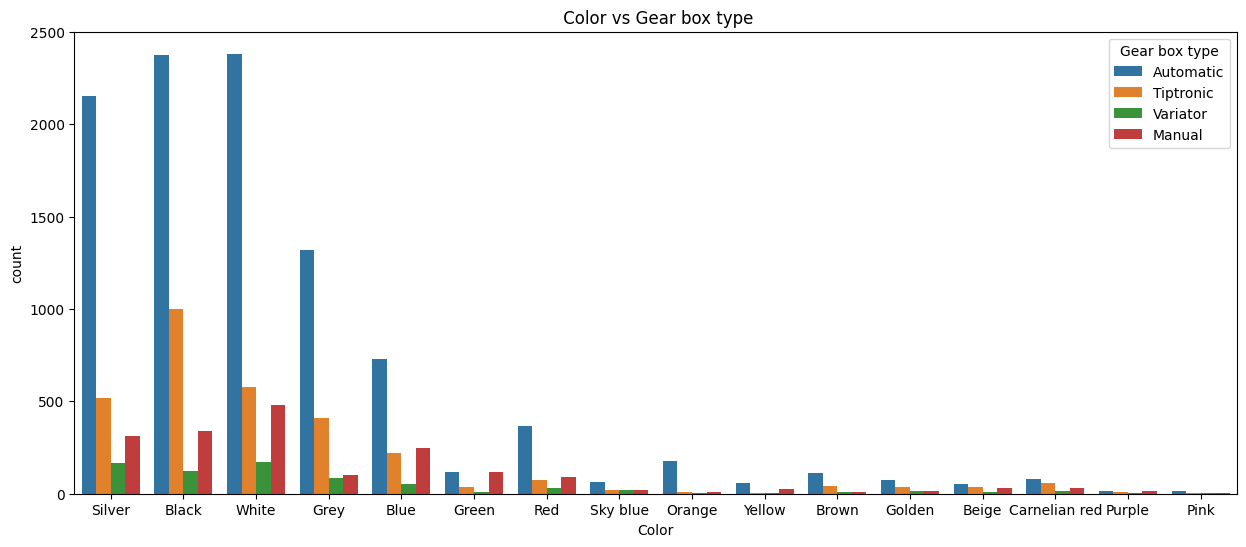

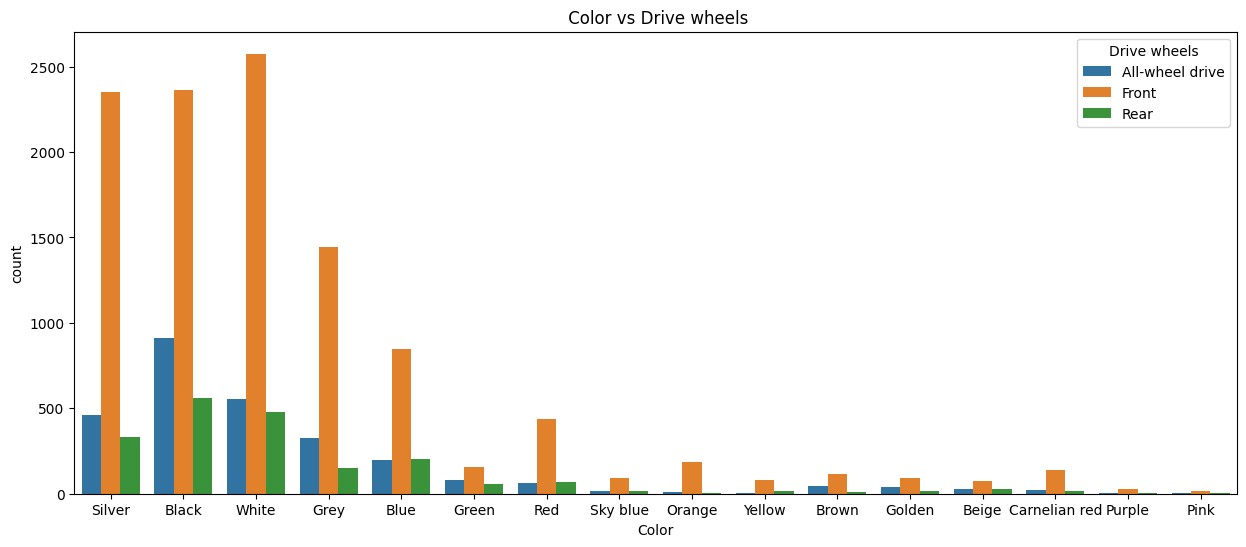

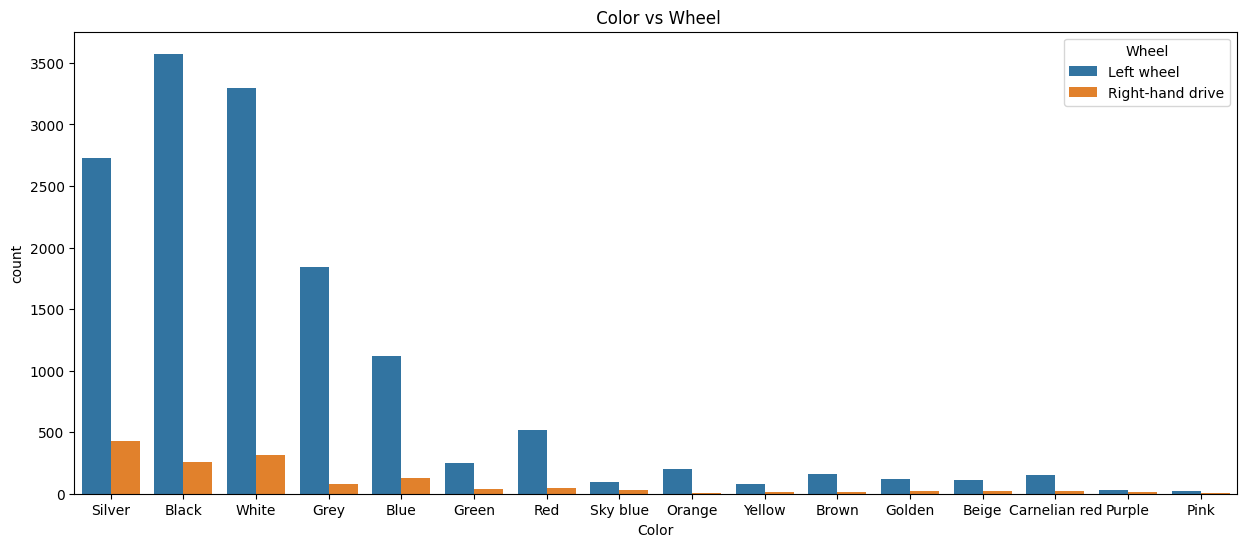

In [53]:
for cat1 in categorical:
    for cat2 in categorical:
        if cat1!=cat2:
            plt.figure(figsize=(15,6))
            sns.countplot(x=cat1,hue=cat2,data=df)
            plt.title(f' {cat1} vs {cat2}')
            plt.show()

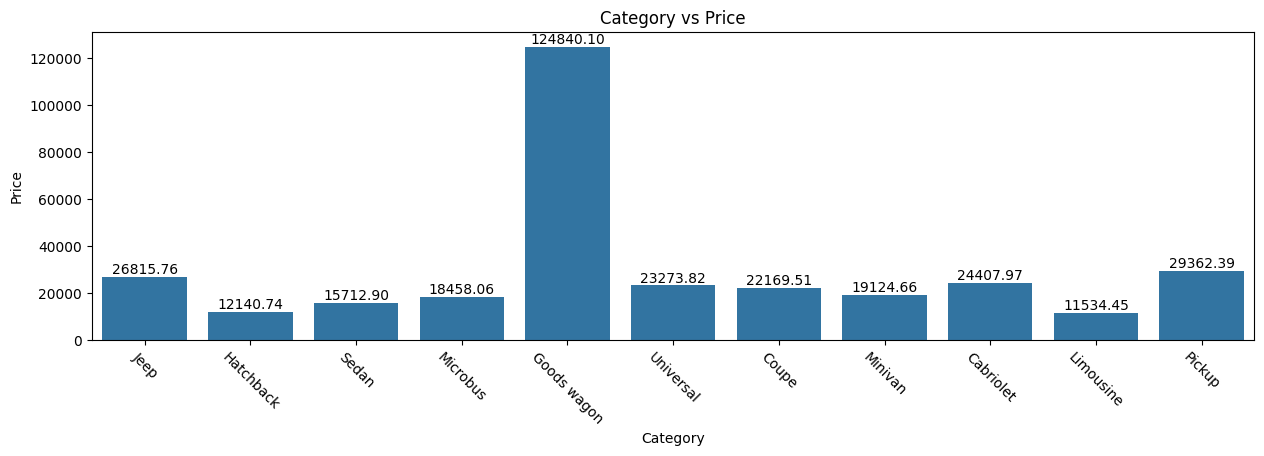

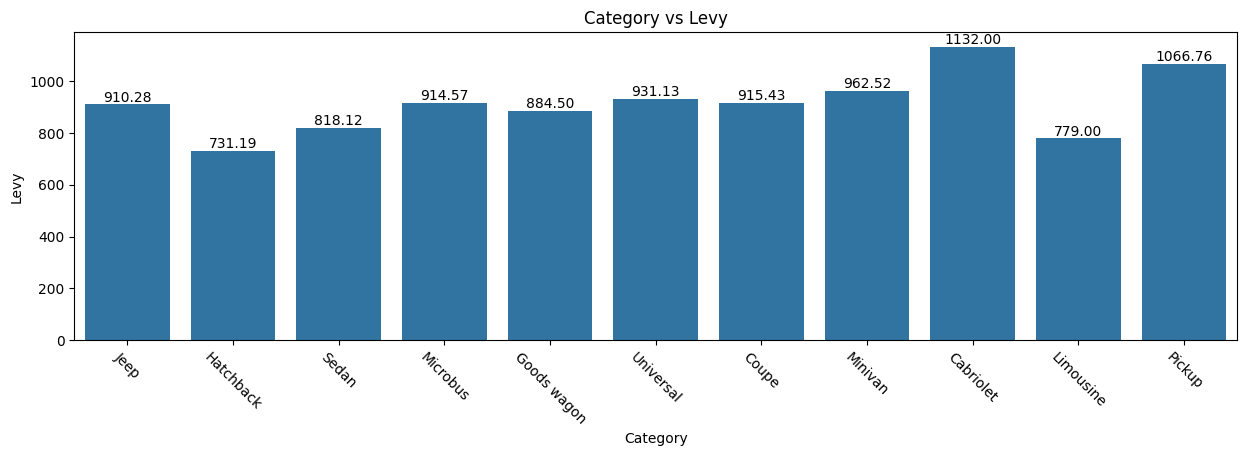

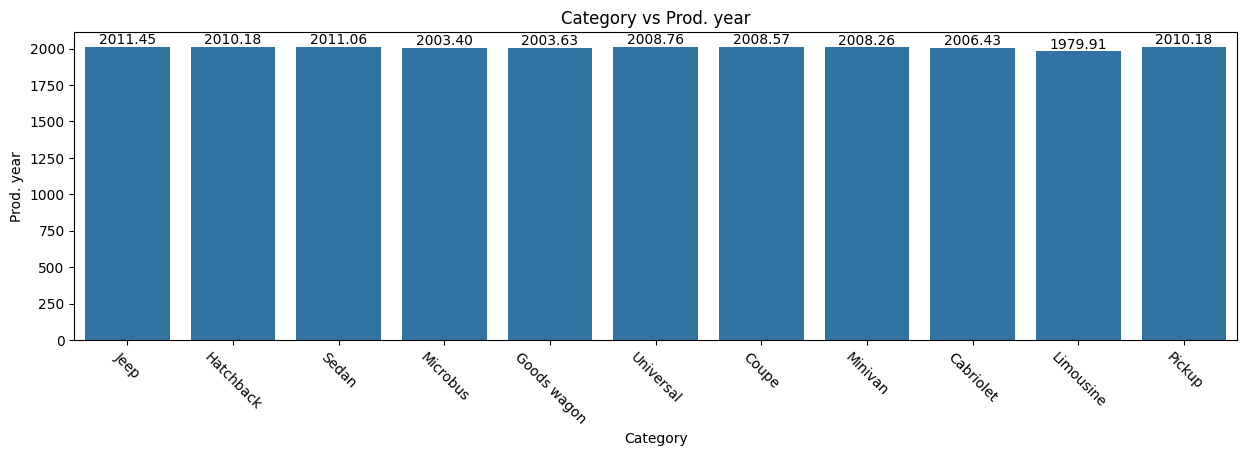

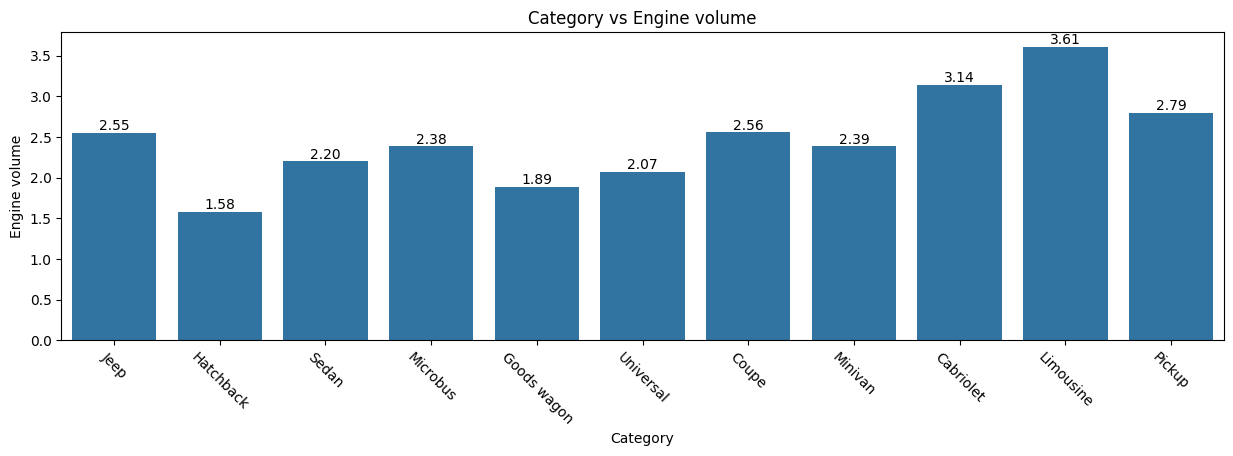

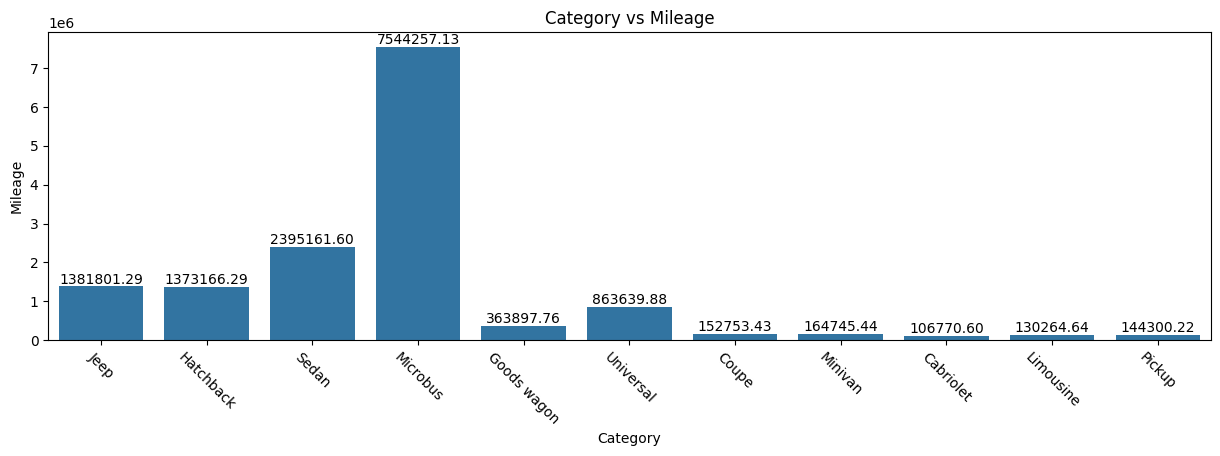

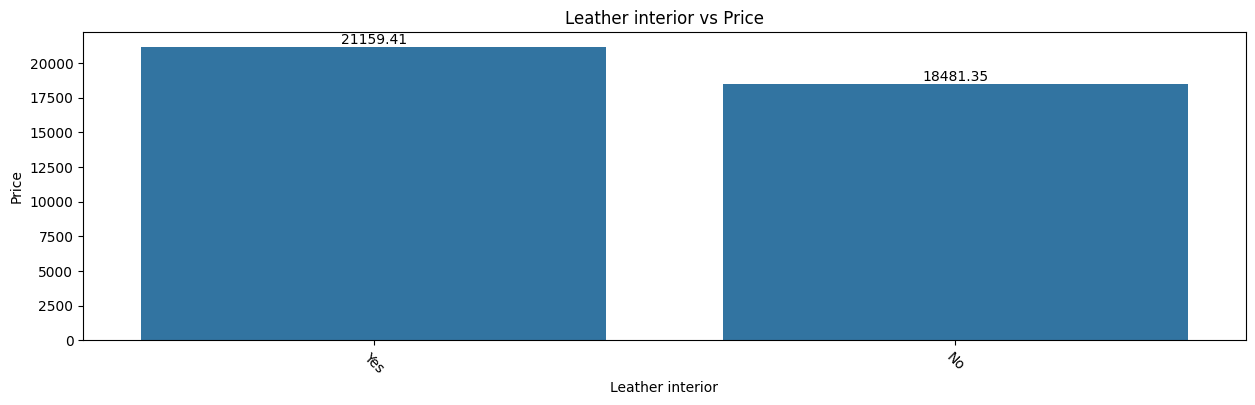

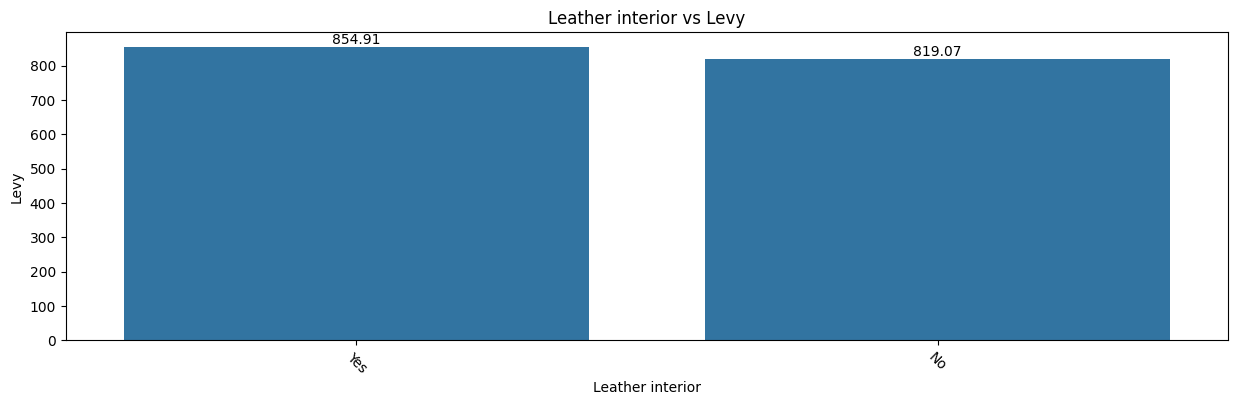

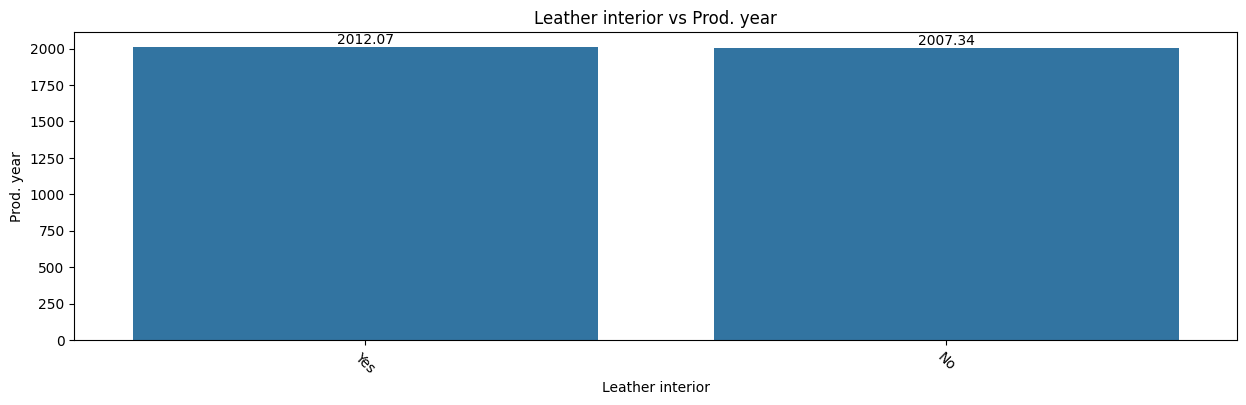

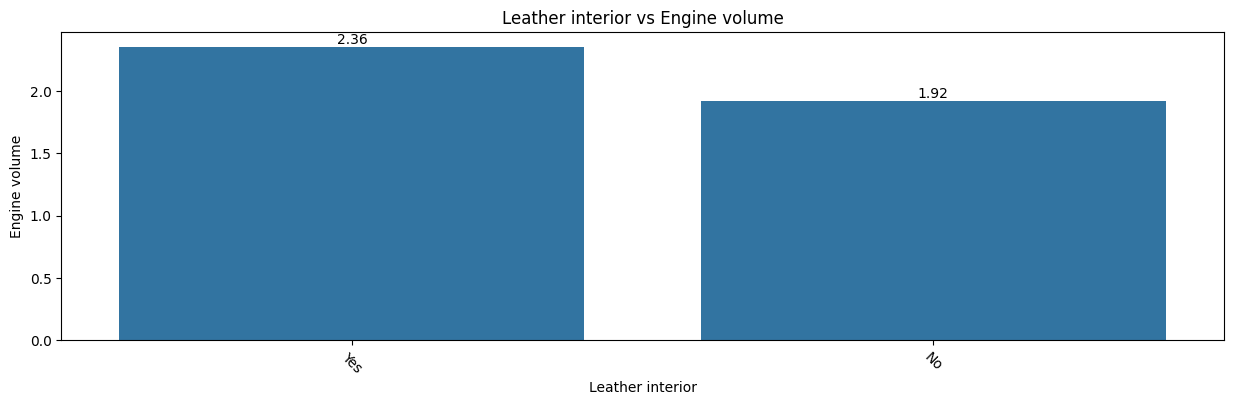

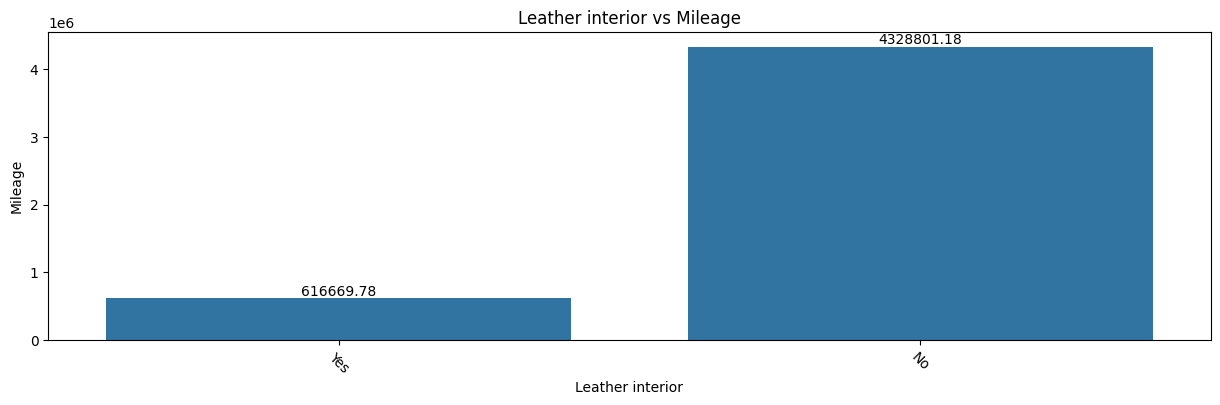

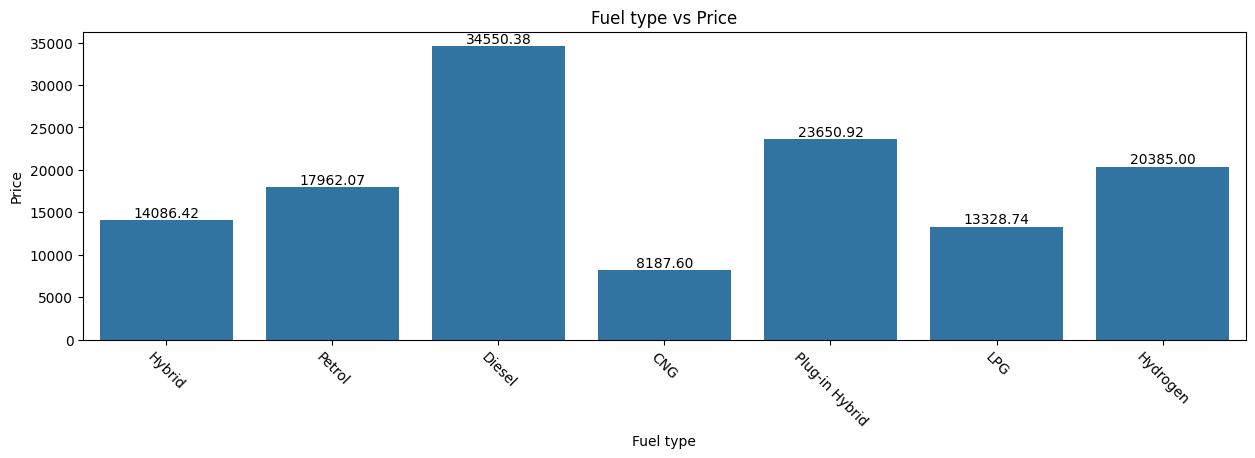

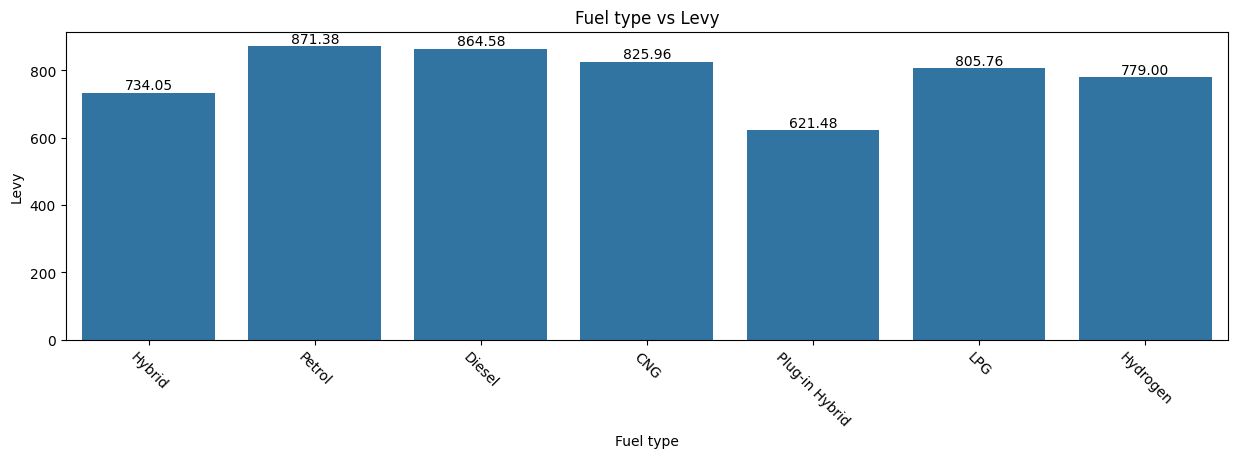

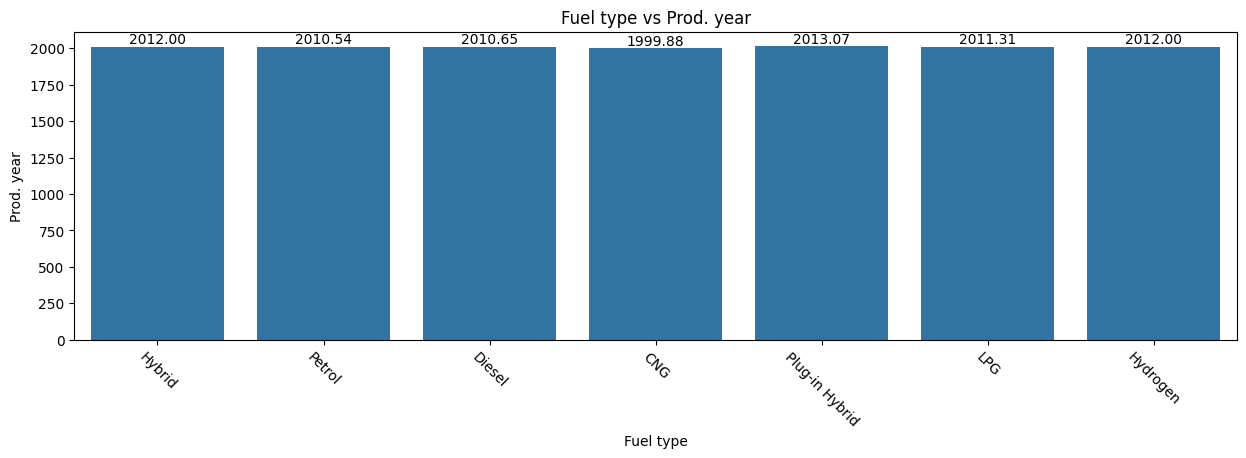

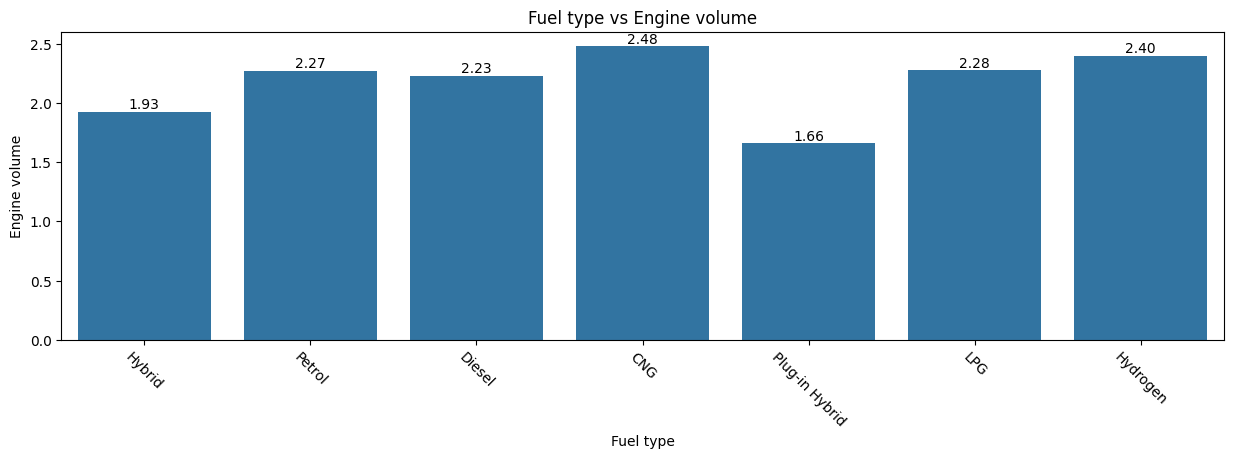

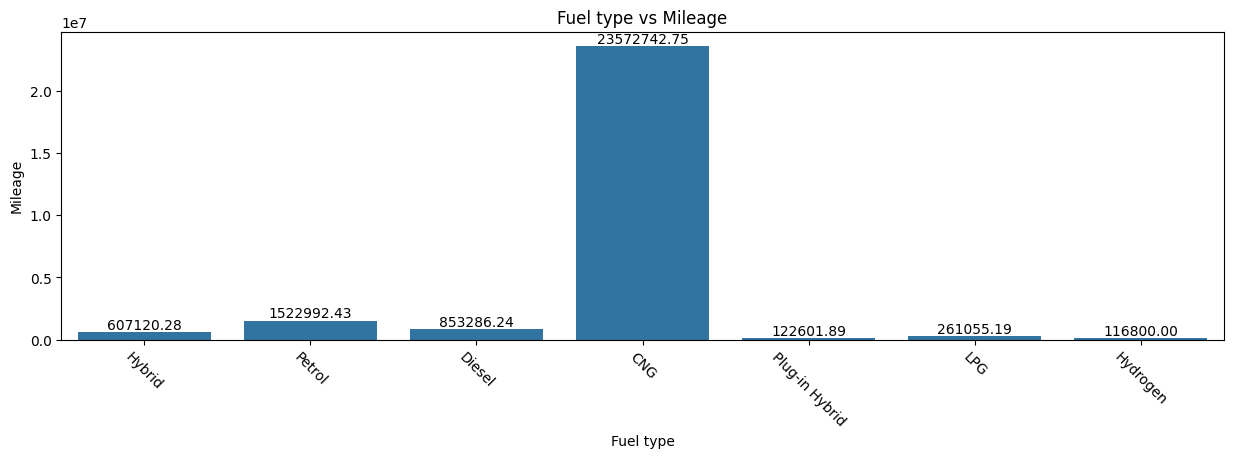

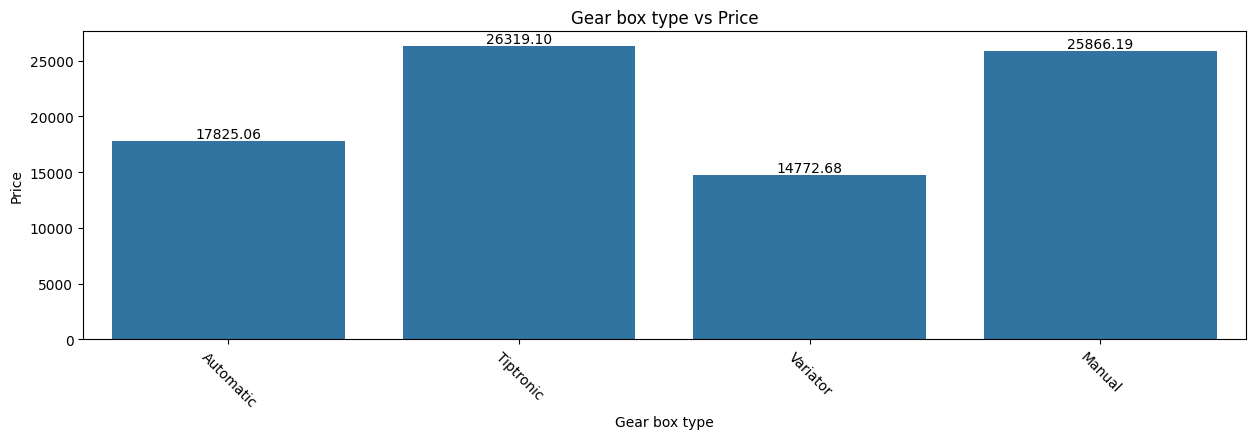

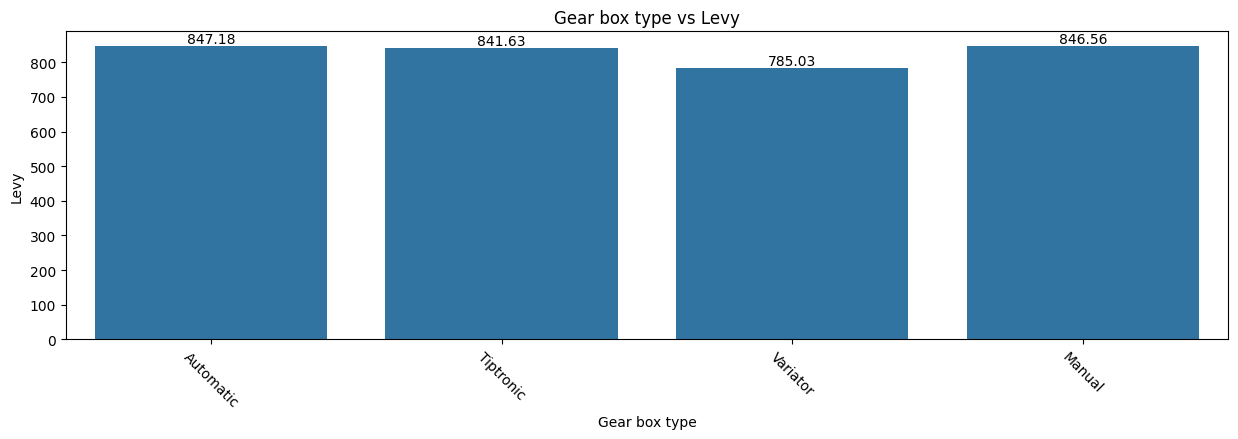

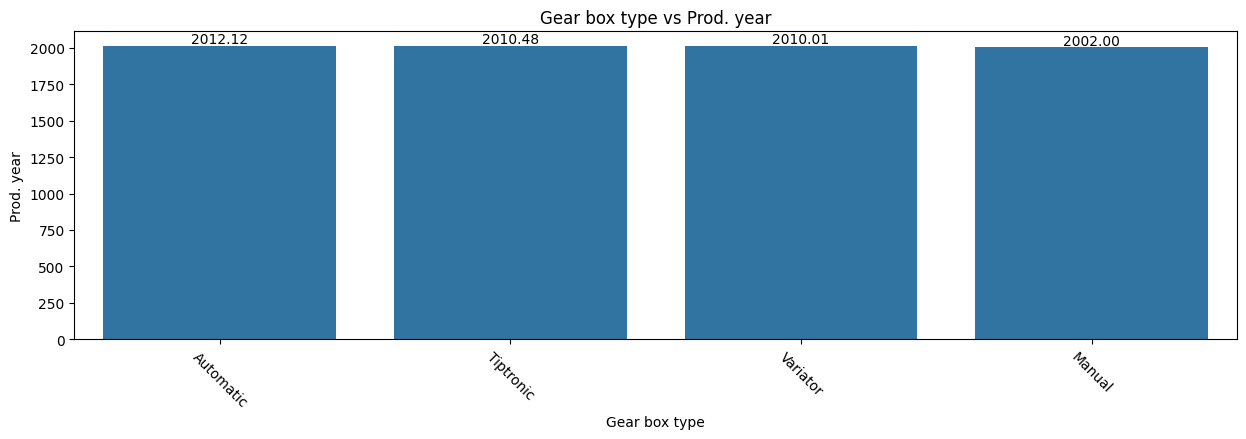

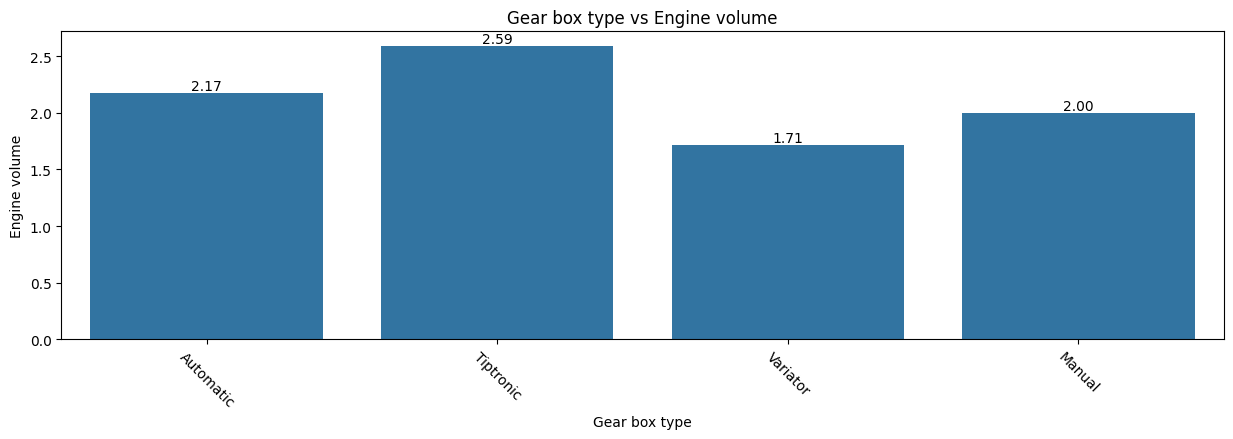

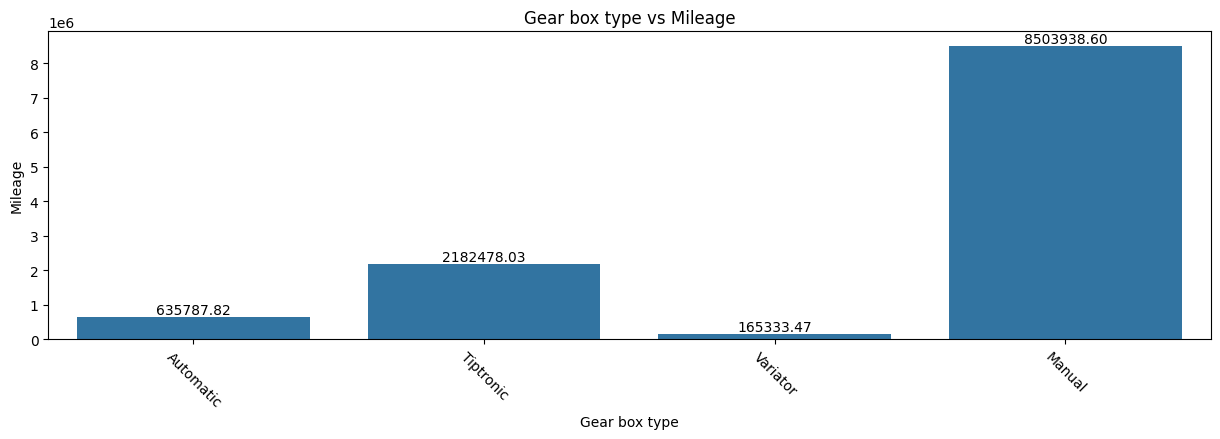

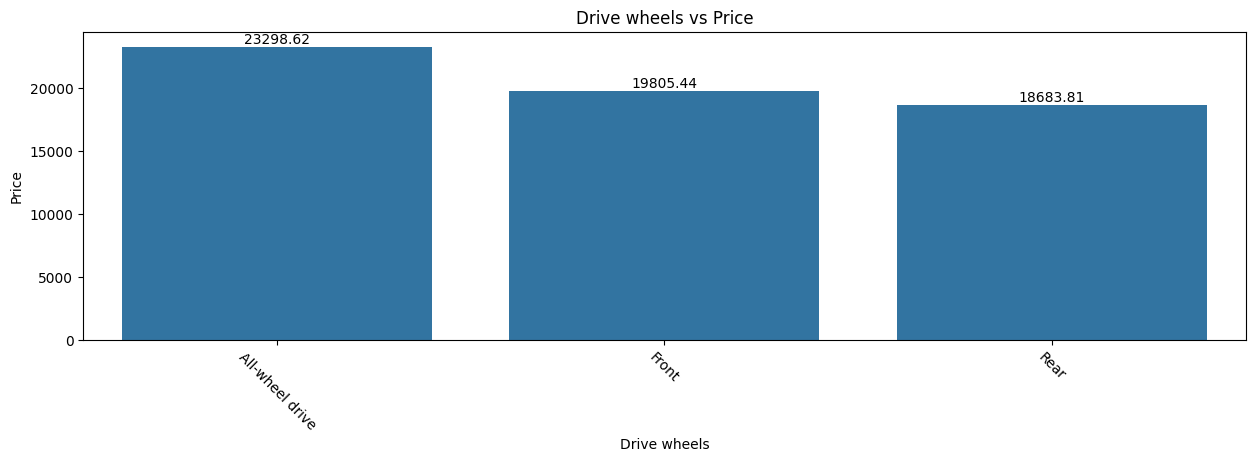

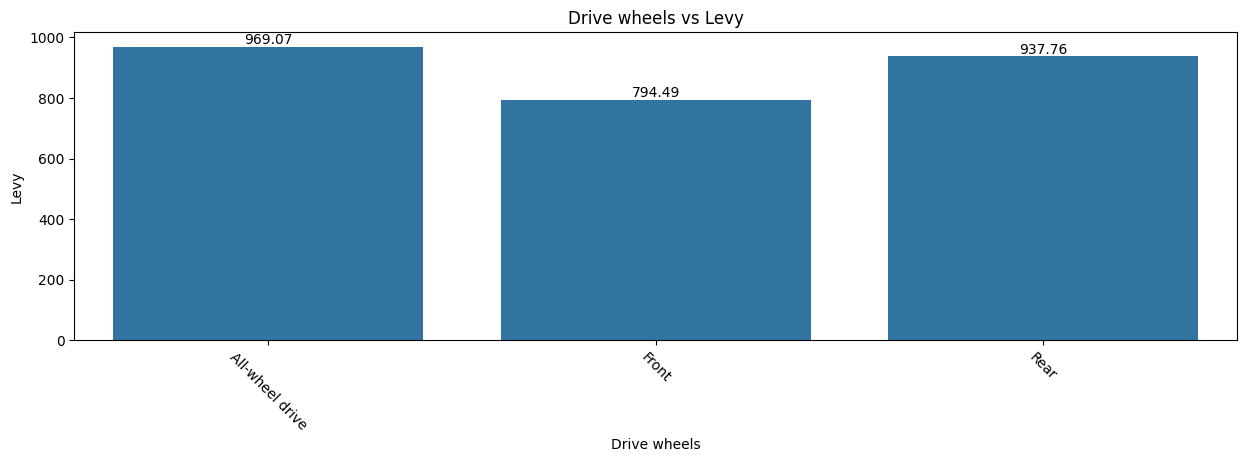

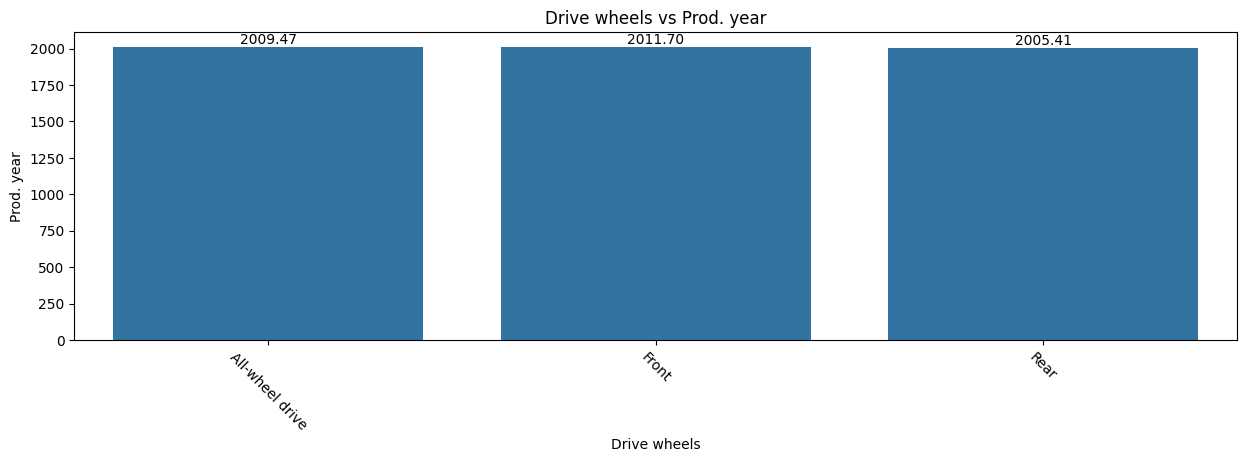

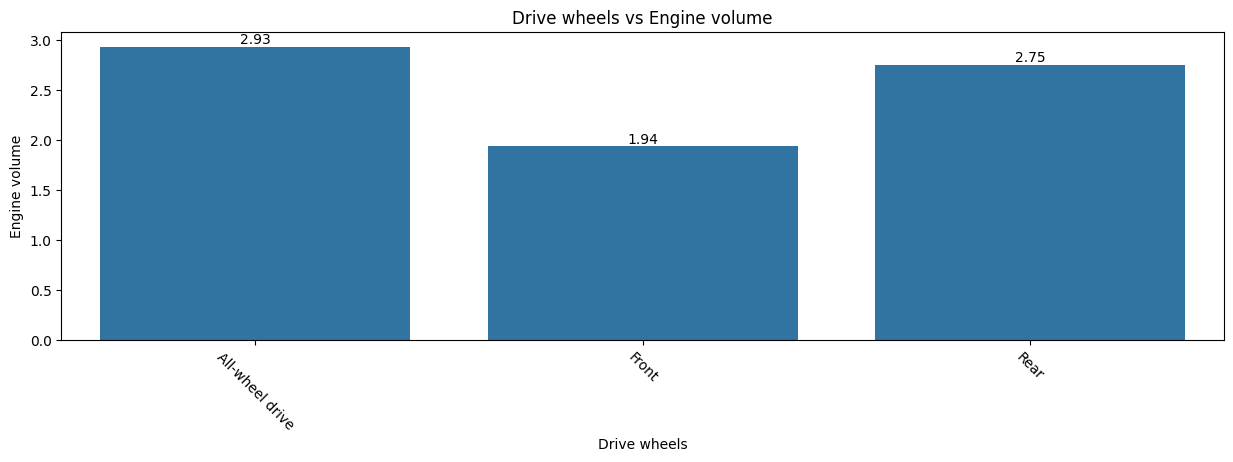

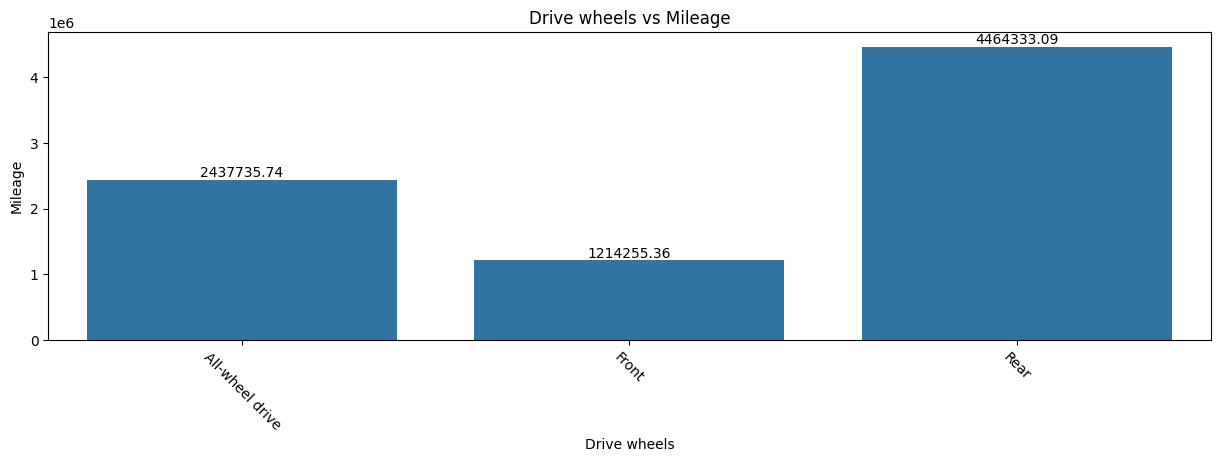

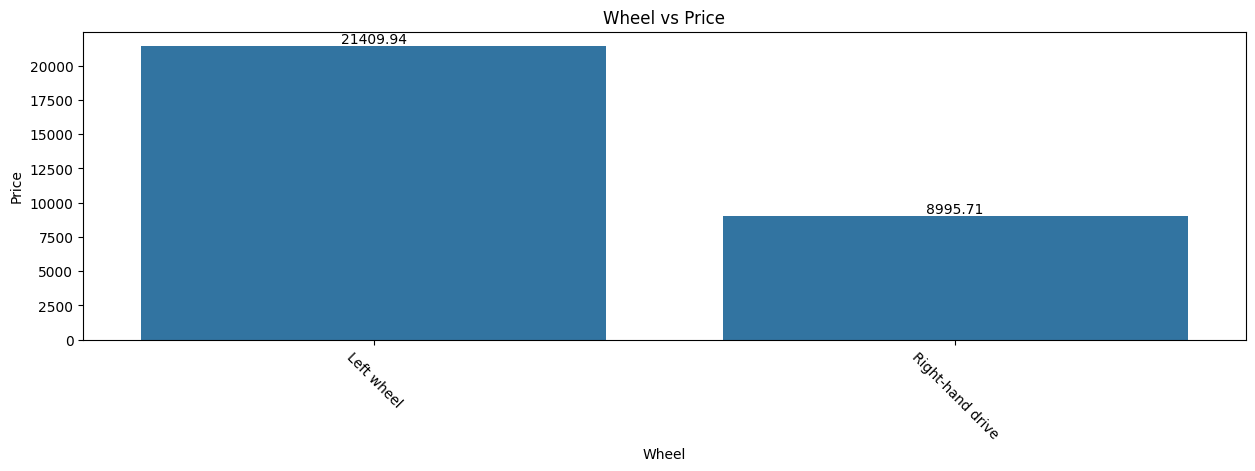

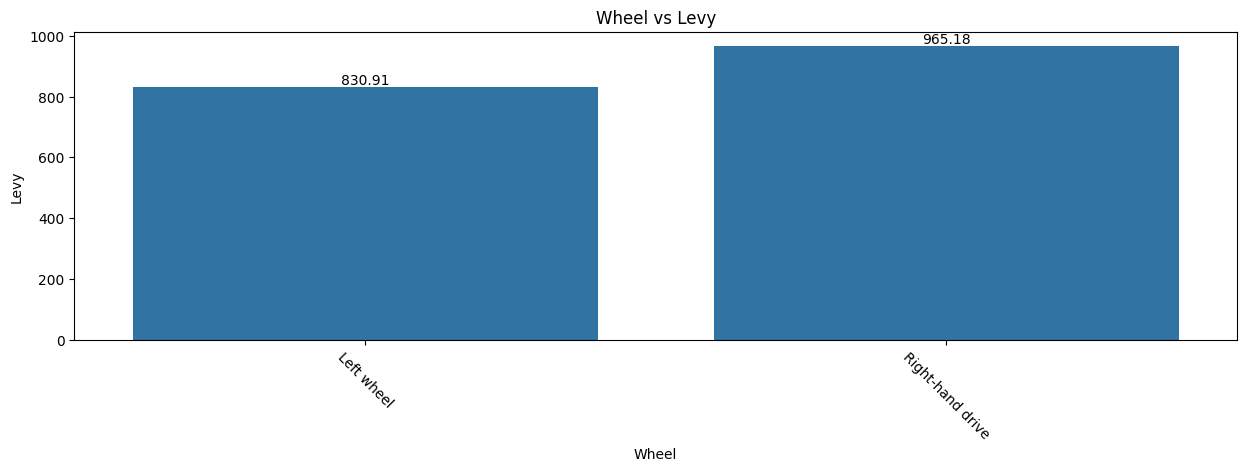

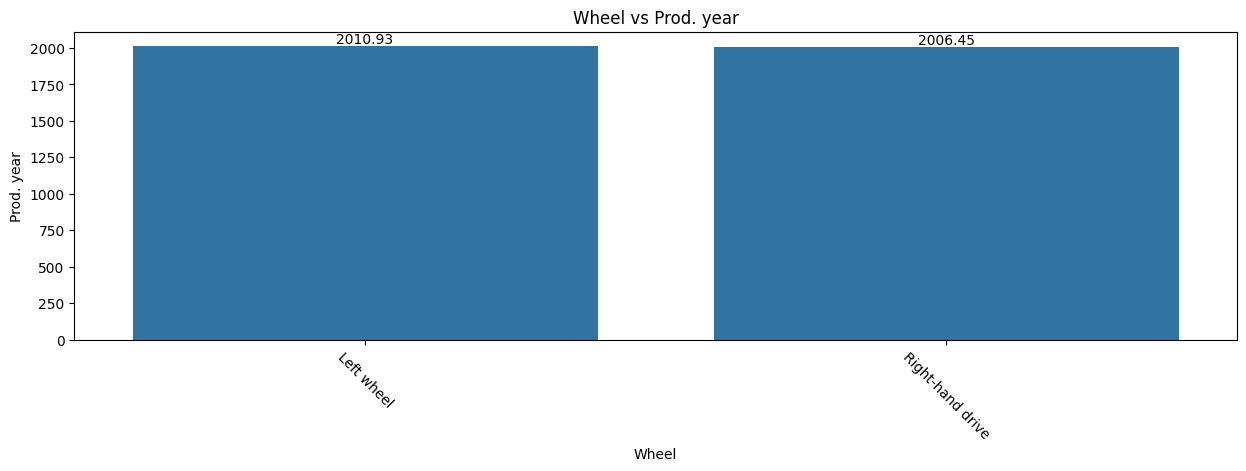

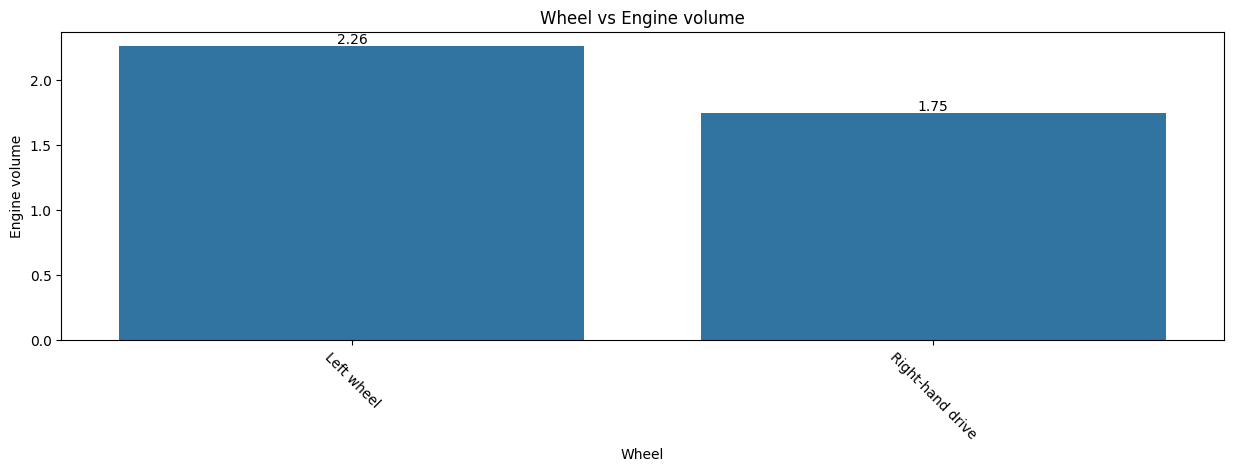

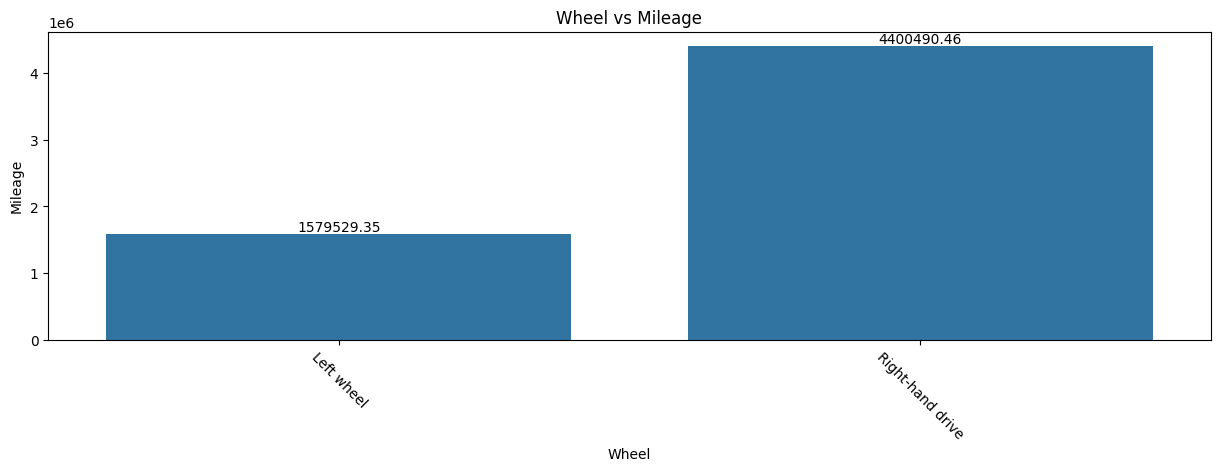

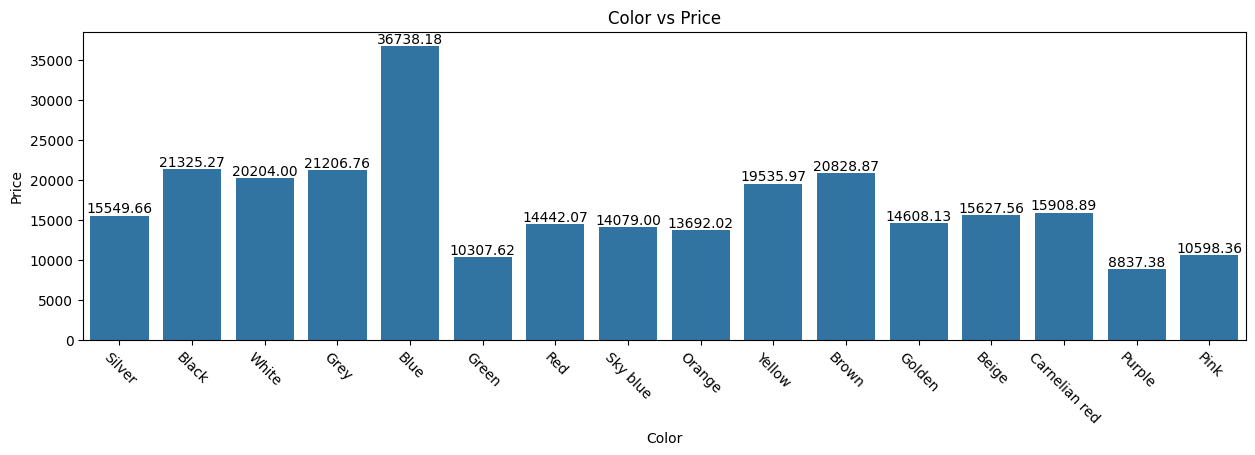

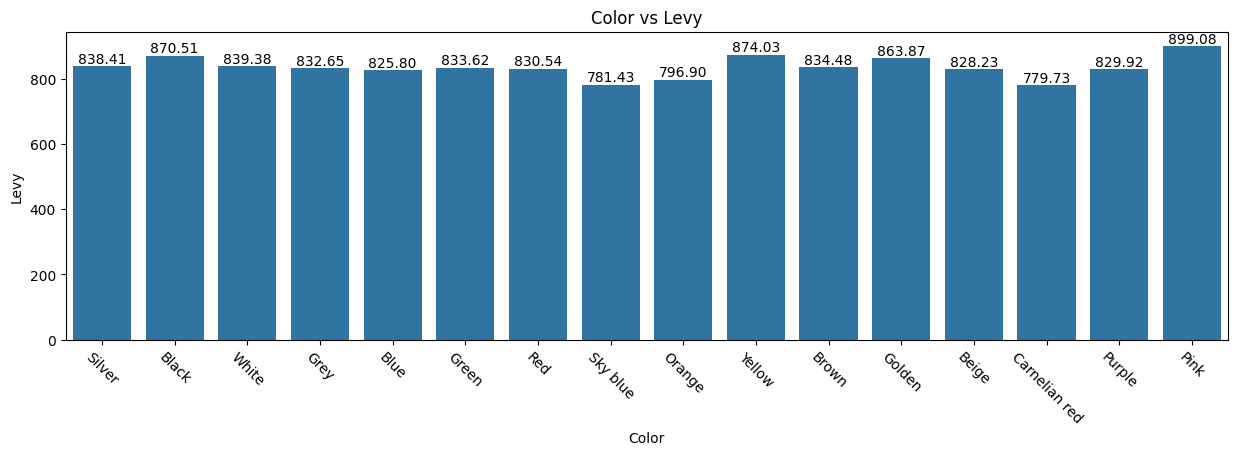

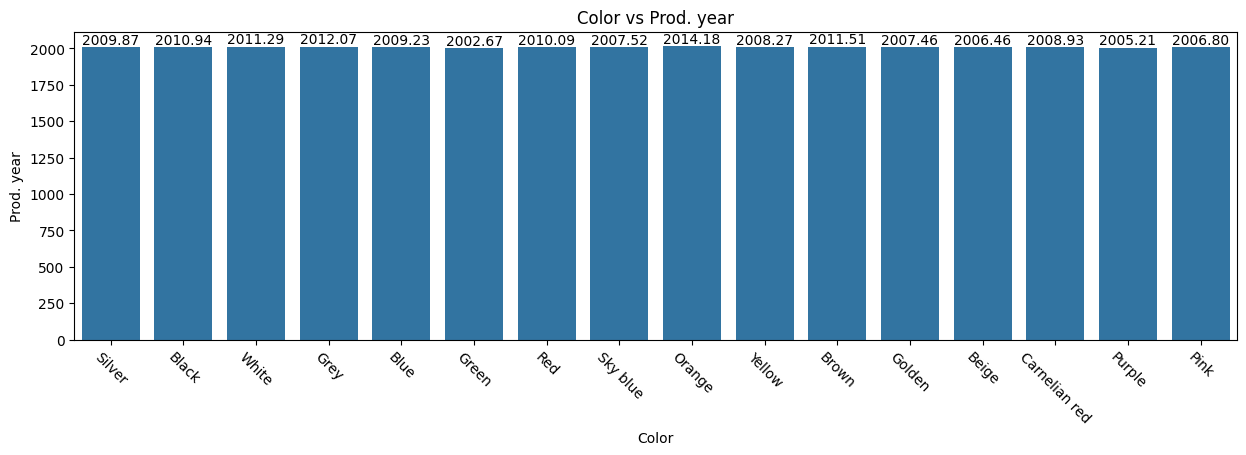

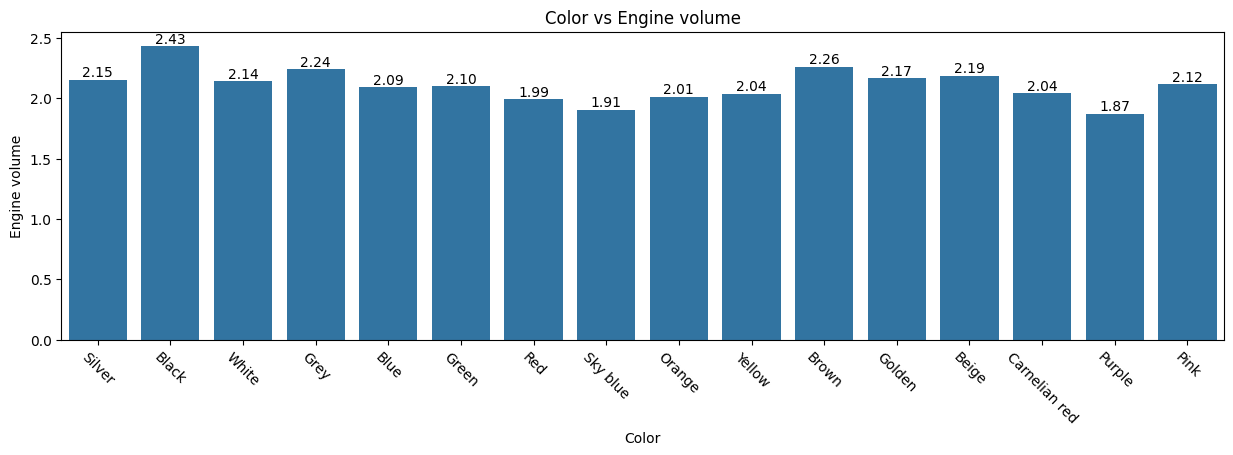

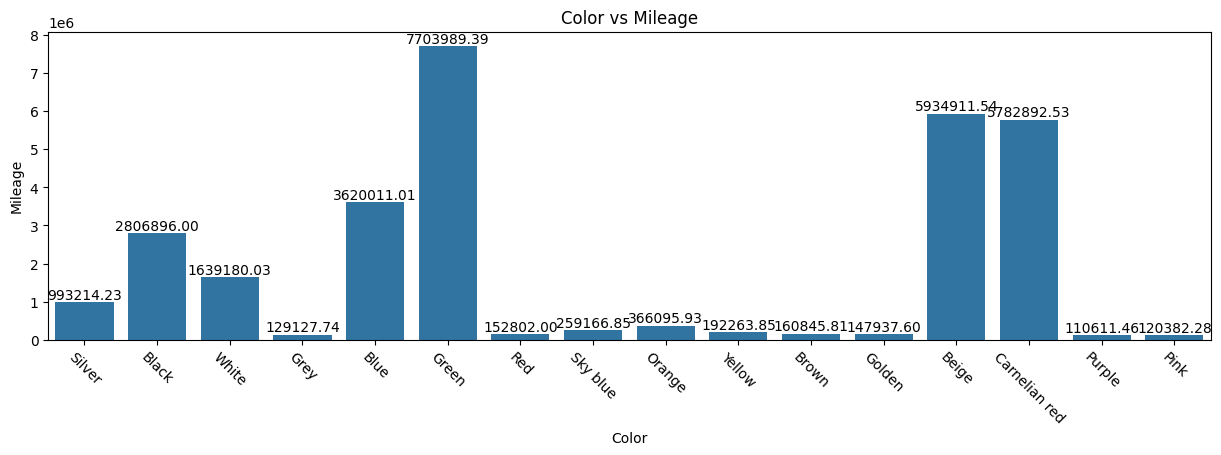

In [54]:
for cat in categorical:
    for cont in continuous:
        
        plt.figure(figsize=(15,4))
        ax=sns.barplot(x=cat,y=cont,data=df,ci=None)
        plt.title(f'{cat} vs {cont}')
        for p in ax.patches: #bars are represented as patches.
            height=p.get_height() #gets the height of the current bar, which represents the count or frequency of that category.
            ax.annotate(f'{height:.2f}',
                       xy=(p.get_x()+p.get_width()/2.,height), # sets the position of the annotation
                       xytext=(0,5), #This offsets the text from the xy position. Here, it's 5 points above the bar.
                       textcoords="offset points", #specifies that the xytext coordinates are offset points from xy.
                       ha='center',va='center')
        plt.xticks(rotation=-45)    
        plt.show()

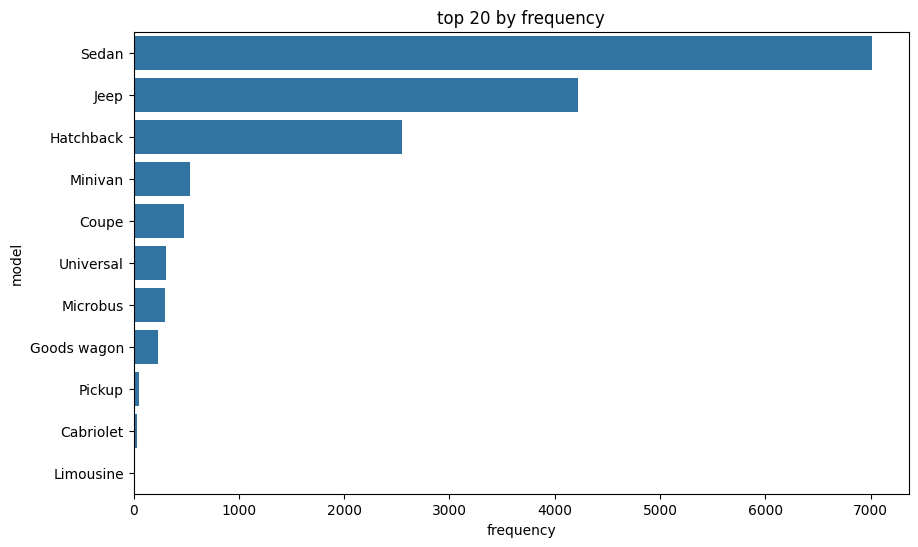

In [55]:
n=20
category_models=df['Category'].value_counts().head(n)
plt.figure(figsize=(10,6))
sns.barplot(x=category_models.values,y=category_models.index)
plt.title(f'top {n} by frequency')
plt.xlabel('frequency')
plt.ylabel('model')
plt.show()

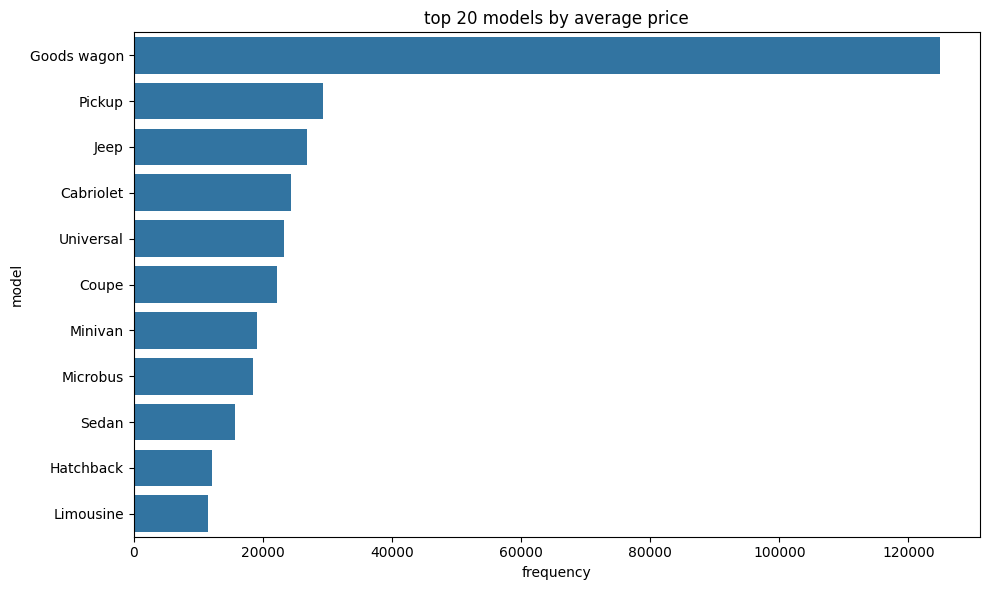

In [56]:
avg_prices_by_car=df.groupby('Category')['Price'].mean().sort_values(ascending=False)
top_car_models=avg_prices_by_car.head(n)
plt.figure(figsize=(10,6))
sns.barplot(x=top_car_models.values,y=top_car_models.index)
plt.title(f'top {n} models by average price')
plt.xlabel('frequency')
plt.ylabel('model')
plt.tight_layout()
plt.show()

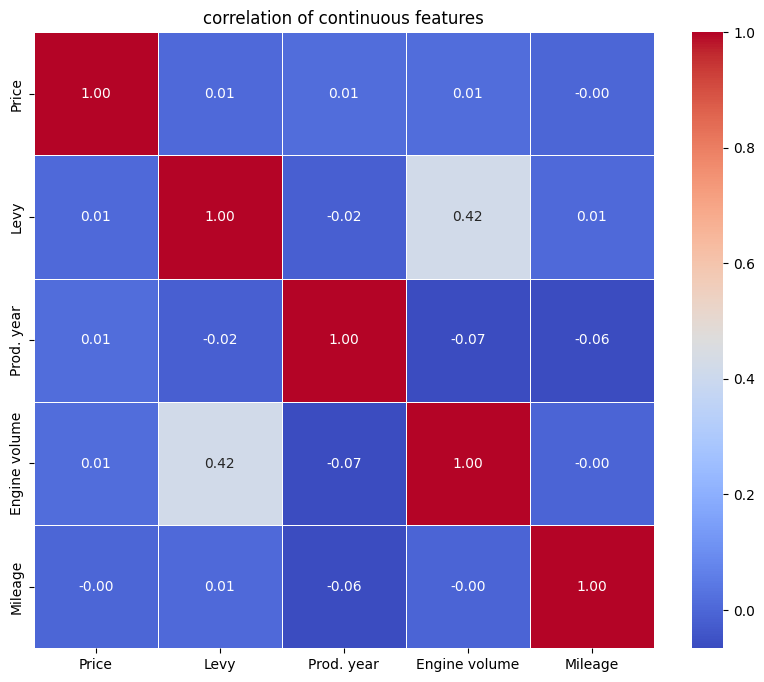

In [57]:
# correlation is always taken between numerical features
corr_matrix=df[continuous].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('correlation of continuous features')
plt.show()

In [58]:
object_types=['Manufacturer','Category','Leather interior','Fuel type','Gear box type','Drive wheels','Wheel','Color']

In [59]:
df_dummies=pd.get_dummies(df[object_types])

In [60]:
df_dummies

Manufacturer_ACURA  Manufacturer_ALFA ROMEO  Manufacturer_ASTON MARTIN  \
0                   False                    False                      False   
1                   False                    False                      False   
2                   False                    False                      False   
3                   False                    False                      False   
4                   False                    False                      False   
...                   ...                      ...                        ...   
19230               False                    False                      False   
19232               False                    False                      False   
19233               False                    False                      False   
19234               False                    False                      False   
19236               False                    False                      False   

       Manufacturer_AUDI  Manufacturer_BENTLEY  Manufacturer_BMW  \
0                  False                 False             False   
1                  False                 False             False   
2                  False                 False             False   
3                  False                 False             False   
4                  False                 False             False   
...                  ...                   ...               ...   
19230              False                 False             False   
19232              False                 False             False   
19233              False                 False             False   
19234              False                 False             False   
19236              False                 False             False   

       Manufacturer_BUICK  Manufacturer_CADILLAC  Manufacturer_CHEVROLET  \
0                   False                  False                   False   
1                   False                  False                    True   
2                   False                  False                   False   
3                   False                  False                   False   
4                   False                  False                   False   
...                   ...                    ...                     ...   
19230               False                  False                   False   
19232               False                  False                   False   
19233               False                  False                   False   
19234               False                  False                   False   
19236               False                  False                   False   

       Manufacturer_CHRYSLER  ...  Color_Green  Color_Grey  Color_Orange  \
0                      False  ...        False       False         False   
1                      False  ...        False       False         False   
2                      False  ...        False       False         False   
3                      False  ...        False       False         False   
4                      False  ...        False       False         False   
...                      ...  ...          ...         ...           ...   
19230                  False  ...        False       False         False   
19232                  False  ...        False       False         False   
19233                  False  ...        False       False         False   
19234                  False  ...        False        True         False   
19236                  False  ...        False       False         False   

       Color_Pink  Color_Purple  Color_Red  Color_Silver  Color_Sky blue  \
0           False         False      False          True           False   
1           False         False      False         False           False   
2           False         False      False         False           False   
3           False         False      False         False           False   
4          

In [61]:
df_final=pd.concat([df.drop(object_types,axis=1),df_dummies],axis=1)

In [62]:
df_final=df_final.drop('Model',axis=1)

In [63]:
df_final

Price    Levy  Prod. year  Engine volume  Mileage  Cylinders  Airbags  \
0      13328  1399.0        2010            3.5   186005          6       12   
1      16621  1018.0        2011            3.0   192000          6        8   
2       8467   779.0        2006            1.3   200000          4        2   
3       3607   862.0        2011            2.5   168966          4        0   
4      11726   446.0        2014            1.3    91901          4        4   
...      ...     ...         ...            ...      ...        ...      ...   
19230    470   645.0        2011            1.8   307325          4       12   
19232   8467   779.0        1999            2.0   300000          4        5   
19233  15681   831.0        2011            2.4   161600          4        8   
19234  26108   836.0        2010            2.0   116365          4        4   
19236    470   753.0        2012            2.4   186923          4       12   

       Manufacturer_ACURA  Manufacturer_ALFA ROMEO  Manufacturer_ASTON MARTIN  \
0                   False                    False                      False   
1                   False                    False                      False   
2                   False                    False                      False   
3                   False                    False                      False   
4                   False                    False                      False   
...                   ...                      ...                        ...   
19230               False                    False                      False   
19232               False                    False                      False   
19233               False                    False                      False   
19234               False                    False                      False   
19236               False                    False                      False   

       ...  Color_Green  Color_Grey  Color_Orange  Color_Pink  Color_Purple  \
0      ...        False       False         False       False         False   
1      ...        False       False         False       False         False   
2      ...        False       False         False       False         False   
3      ...        False       False         False       False         False   
4      ...        False       False         False       False         False   
...    ...          ...         ...           ...         ...           ...   
19230  ...        False       False         False       False         False   
19232  ...        False       False         False       False         False   
19233  ...        False       False         False       False         False   
19234  ...        False        True         False       False         False   
19236  ...        False       False         False       False         False   

       Color_Red  Color_Silver  Color_Sky blue  Color_White  Color_Yellow  
0          False          True           False        False         False  
1          False         False           False        False         False  
2          False         False           False        False         False  
3          False         False           False         True         False  
4          False          True           False        False         False  
...          ...           ...             ...          ...           ...  
19230      False          True           False        False         False  
19232      False          True           False        False         False  
19233       True         False           False        False         False  
19234      False         False           False        False         False  
19236      False         False           False         True         False  

[15725 rows x 117 columns]

In [64]:
df1=df_final.copy()

In [65]:
for feature in continuous:
    df1[feature+'_log']=np.log(df1[feature]+1)

In [66]:
df1=df1.drop(['Price','Levy','Prod. year','Engine volume','Mileage'],axis=1)

In [67]:
df1

Cylinders  Airbags  Manufacturer_ACURA  Manufacturer_ALFA ROMEO  \
0              6       12               False                    False   
1              6        8               False                    False   
2              4        2               False                    False   
3              4        0               False                    False   
4              4        4               False                    False   
...          ...      ...                 ...                      ...   
19230          4       12               False                    False   
19232          4        5               False                    False   
19233          4        8               False                    False   
19234          4        4               False                    False   
19236          4       12               False                    False   

       Manufacturer_ASTON MARTIN  Manufacturer_AUDI  Manufacturer_BENTLEY  \
0                          False              False                 False   
1                          False              False                 False   
2                          False              False                 False   
3                          False              False                 False   
4                          False              False                 False   
...                          ...                ...                   ...   
19230                      False              False                 False   
19232                      False              False                 False   
19233                      False              False                 False   
19234                      False              False                 False   
19236                      False              False                 False   

       Manufacturer_BMW  Manufacturer_BUICK  Manufacturer_CADILLAC  ...  \
0                 False               False                  False  ...   
1                 False               False                  False  ...   
2                 False               False                  False  ...   
3                 False               False                  False  ...   
4                 False               False                  False  ...   
...                 ...                 ...                    ...  ...   
19230             False               False                  False  ...   
19232             False               False                  False  ...   
19233             False               False                  False  ...   
19234             False               False                  False  ...   
19236             False               False                  False  ...   

       Color_Red  Color_Silver  Color_Sky blue  Color_White  Color_Yellow  \
0          False          True           False        False         False   
1          False         False           False        False         False   
2          False         False           False        False         False   
3          False         False           False         True         False   
4          False          True           False        False         False   
...          ...           ...             ...          ...           ...   
19230      False          True           False        False         False   
19232      False          True           False        False         False   
19233       True         False           False        False         False   
19234      False         False           False        False         False   
19236      False         False           False         True         False   

       Price_log  Levy_log  Prod. year_log  Engine volume_log  Mileage_log  
0       9.497697  7.244228        7.606387           1.504077    12.133534  
1       9.718482  6.926577        7.606885           1.386294    12.165256  
2       9.044050  6.659294        7.604396           0.832909    12.206078  
3       8.190909  6.760415        7.606885           1.2527

In [68]:
x=df1.drop('Price_log',axis=1)
y=df1['Price_log']

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,confusion_matrix,classification_report,f1_score

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [72]:
y_pred=lr_model.predict(x_test)

In [73]:
mse=mean_squared_error(y_test,y_pred)
mse

3.1914599646684933e+18

In [74]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(x_train,y_train)
y_pred_ridge=ridge_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred_ridge)
print(mse)

1.8926844410260448


In [75]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)
y_predict_lasso=lasso_model.predict(x_test)
mse=mean_squared_error(y_test,y_predict_lasso)
print(mse)

2.2093760268893496


In [76]:
ridge_coefficients=ridge_model.coef_
ridg_intercept=ridge_model.intercept_
print('ridge_coefficients',ridge_coefficients)
print('ridg_intercep',ridg_intercept)

ridge_coefficients [-1.93621156e-02 -5.26086750e-02 -7.09727724e-01 -2.01805279e-01
  4.00551615e-01 -2.83468935e-01  1.80904711e+00 -1.45206467e-02
 -3.31938337e-01 -1.74902598e-02  1.26294696e-01 -4.52336758e-01
  1.39764405e-01 -9.26123460e-02 -2.33269367e-01 -5.43143718e-01
  1.31919055e+00 -1.41951342e-02  6.73836539e-02 -5.50114676e-01
 -3.84875981e-01 -5.75002244e-02  3.45662087e-01  9.08884551e-02
  1.18272220e+00  4.19748660e-01 -9.89059108e-02  1.52751252e-01
  2.80540123e-01  3.39702460e-01  1.02909653e-01  1.60726322e+00
 -9.15331958e-02  7.22022363e-01  5.56017775e-02  9.65253647e-03
  1.07206649e+00 -1.86825393e-01 -2.37360097e-02  1.11178648e-01
  1.54008152e-01 -1.29815461e-01 -1.23153312e+00 -3.38069770e-01
 -4.01518760e-01 -3.46253873e-01 -9.04631960e-02  5.48299591e-01
 -1.89664826e-01 -1.43762928e+00 -9.16468835e-01 -2.25293661e-01
  7.03201099e-02  3.08183424e-01 -6.29800324e-01  2.93361281e-01
  6.13468141e-01 -1.78878136e-01  6.64959016e-03  0.00000000e+00
  1.97

In [77]:
lasso_coefficients=lasso_model.coef_
lasso_intercept=lasso_model.intercept_
print('lasso_coefficients',lasso_coefficients)
print('lasso_intercep',lasso_intercept)

lasso_coefficients [ 0.         -0.03066153 -0.         -0.          0.         -0.
  0.          0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.          0.          0.         -0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
  0.         -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.          0.          0.
 -0.          0.          0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.         -0.         -0.          0.
 -0.          0.          0.          0.         -0.          0.
 -0.          0.         -0.          0.0245719  -0.          0.
  0.         -0.          0.         -0.         -0.          0.1648113

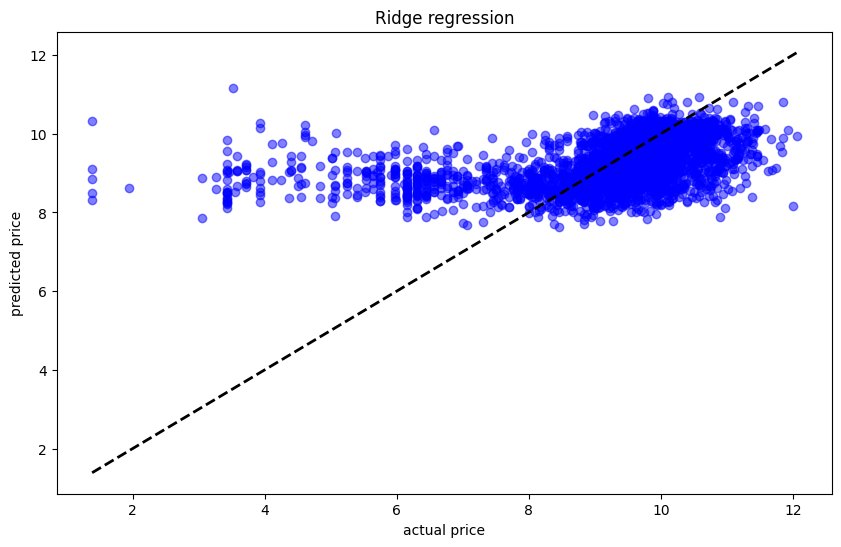

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_ridge,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.title('Ridge regression')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

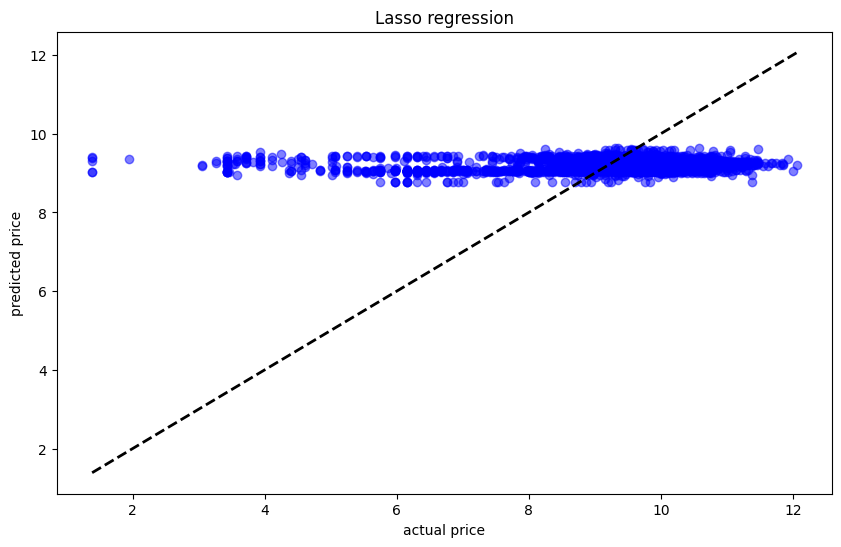

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_predict_lasso,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.title('Lasso regression')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [81]:
df2=df_final.copy()

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler=StandardScaler()
df2[continuous]=scaler.fit_transform(df2[continuous])

In [84]:
df2

Price      Levy  Prod. year  Engine volume   Mileage  Cylinders  \
0     -0.033003  1.503384   -0.086315       1.596678 -0.030831          6   
1     -0.017369  0.472937    0.080021       0.976454 -0.030719          6   
2     -0.056081 -0.173458   -0.751658      -1.132305 -0.030570          4   
3     -0.079154  0.051022    0.080021       0.356231 -0.031149          4   
4     -0.040608 -1.074084    0.579029      -1.132305 -0.032589          4   
...         ...       ...         ...            ...       ...        ...   
19230 -0.094047 -0.535872    0.080021      -0.512082 -0.028565          4   
19232 -0.056081 -0.173458   -1.916010      -0.263992 -0.028702          4   
19233 -0.021832 -0.032820    0.080021       0.232186 -0.031287          4   
19234  0.027672 -0.019297   -0.086315      -0.263992 -0.032132          4   
19236 -0.094047 -0.243777    0.246357       0.232186 -0.030814          4   

       Airbags  Manufacturer_ACURA  Manufacturer_ALFA ROMEO  \
0           12               False                    False   
1            8               False                    False   
2            2               False                    False   
3            0               False                    False   
4            4               False                    False   
...        ...                 ...                      ...   
19230       12               False                    False   
19232        5               False                    False   
19233        8               False                    False   
19234        4               False                    False   
19236       12               False                    False   

       Manufacturer_ASTON MARTIN  ...  Color_Green  Color_Grey  Color_Orange  \
0                          False  ...        False       False         False   
1                          False  ...        False       False         False   
2                          False  ...        False       False         False   
3                          False  ...        False       False         False   
4                          False  ...        False       False         False   
...                          ...  ...          ...         ...           ...   
19230                      False  ...        False       False         False   
19232                      False  ...        False       False         False   
19233                      False  ...        False       False         False   
19234                      False  ...        False        True         False   
19236                      False  ...        False       False         False   

       Color_Pink  Color_Purple  Color_Red  Color_Silver  Color_Sky blue  \
0           False         False      False          True           False   
1           False         False      False         False           False   
2           False         False      False         False           False   
3           False         False      False         False           False   
4           False         False      False          True           False   
...           ...           ...        ...           ...             ...   
19230       False         False      False          True           False   
19232       False         False      False          True           False   
19233       False         False       True         False           False   
19234       False         False      False         False           False   
19236       False         False      False         False           False   

       Color_White  Color_Yellow  
0            False         False  
1            False         False  
2            False         False  
3             True         False  
4            False         False  
...            ...           ...  
19230        False         False  
19232        False         False  
19233        False         False  
19234        False         False  
19236         True         False  

[15725 rows x 117 columns]

In [86]:
continuous

['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage']

In [87]:
from sklearn.svm import SVR
x=df2.drop(['Price'],axis=1)
y=df2['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

svr_model=SVR()
svr_model.fit(x_train,y_train)

SVR()

In [88]:
y_predict=svr_model.predict(x_test)

In [92]:
mse=mean_squared_error(y_test,y_predict)
mse

0.003552232322931624

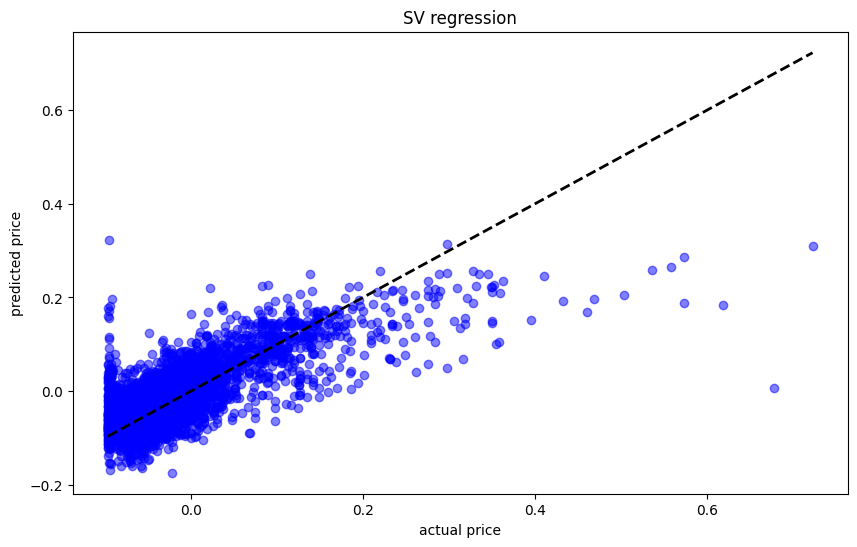

In [93]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_predict,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.title('SV regression')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [94]:
df3=df_final.copy()

In [95]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
x=df3.drop(['Price'],axis=1)
y=df3['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [103]:
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [104]:
y_predict_test=dt_model.predict(x_test)

In [105]:
mse=mean_squared_error(y_test,y_predict_test)
mse

220204599494.90356

In [106]:
scaler=StandardScaler()
df3[continuous]=scaler.fit_transform(df3[continuous])

In [108]:
x=df3.drop(['Price'],axis=1)
y=df3['Price']

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [110]:
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [111]:
y_predict_test1=dt_model.predict(x_test)

In [113]:
mse=mean_squared_error(y_test,y_predict_test1)
mse

4.963221629429882

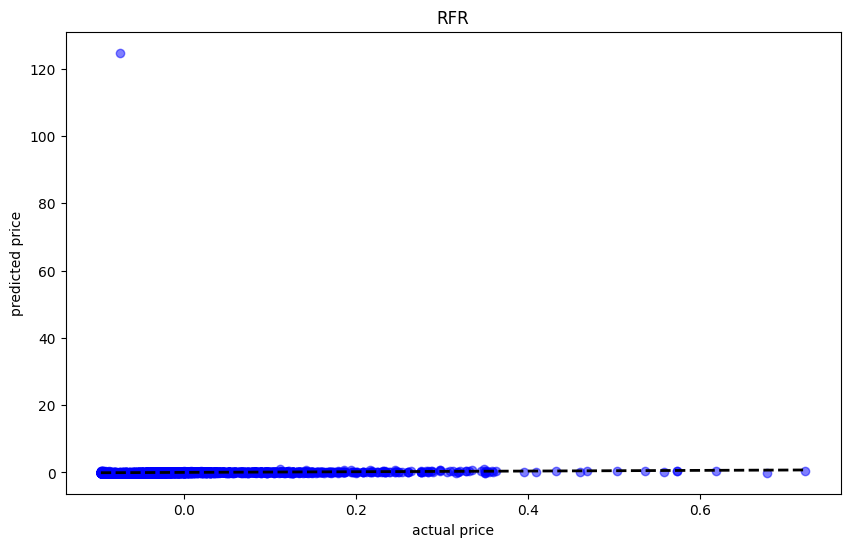

In [119]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_predict_test1,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.title('RFR')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [117]:
y_predict_rf=rf_model.predict(x_test)
mse=mean_squared_error(y_test,y_predict_rf)
mse

0.5357459061947469

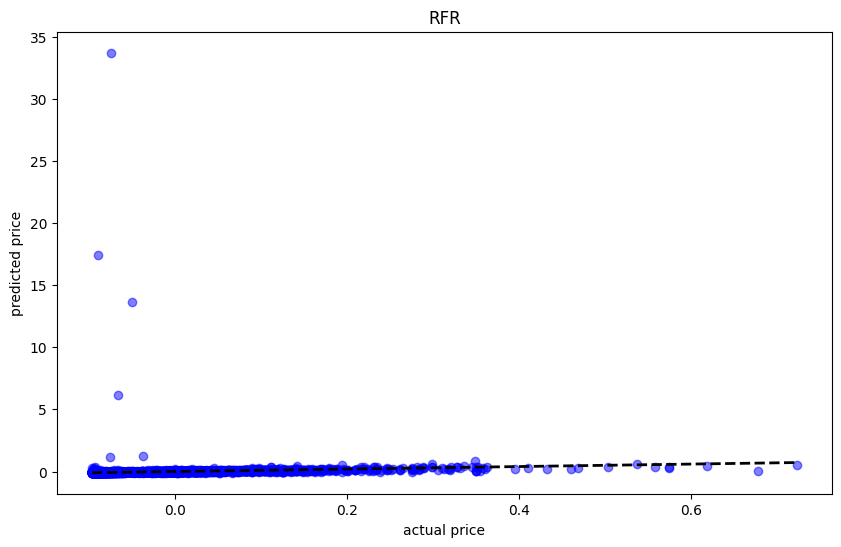

In [118]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_predict_rf,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.title('RFR')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [122]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor()
xgb_model.fit(x_train,y_train)
y_pred_xg=xgb_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred_xg)
mse

0.0027910439936771393

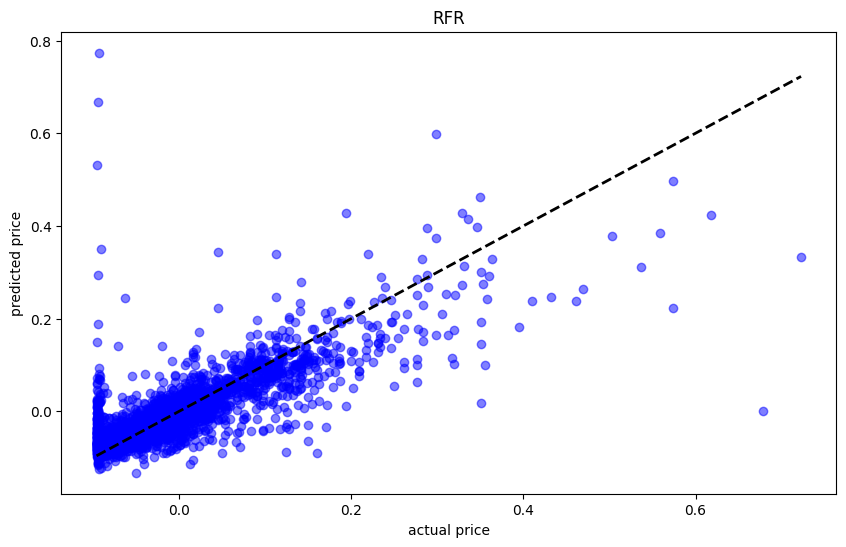

In [124]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_xg,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.title('RFR')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [125]:
lr_model1=LinearRegression()
lr_model1.fit(x_train,y_train)

LinearRegression()

In [126]:
y_predict_lr=lr_model1.predict(x_test)
mse=mean_squared_error(y_test,y_predict_lr)
mse

1461410930773309.8

In [127]:
ridge_model1=Ridge(alpha=1.0)
ridge_model1.fit(x_train,y_train)
y_pred_ridge1=ridge_model1.predict(x_test)
mse=mean_squared_error(y_test,y_pred_ridge1)
print(mse)

0.014280108085909099


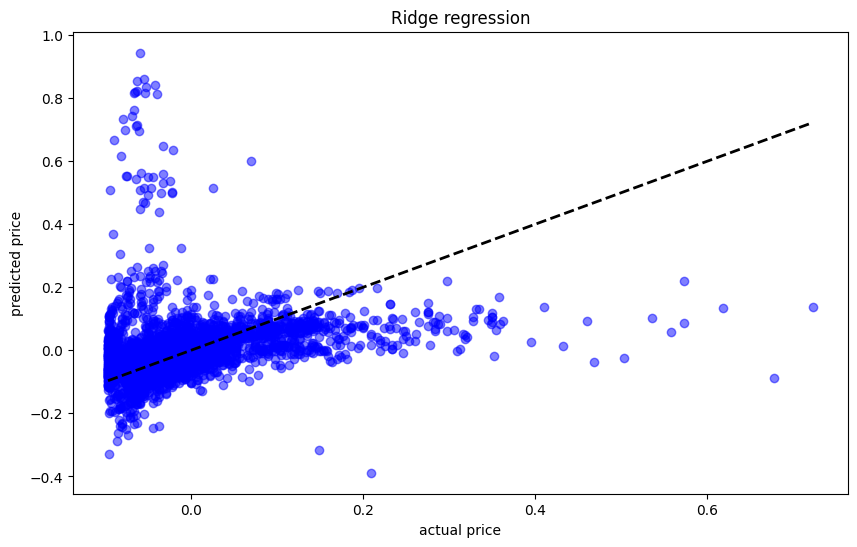

In [128]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_ridge1,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.title('Ridge regression')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [129]:
lasso_model1=Lasso(alpha=0.1)
lasso_model1.fit(x_train,y_train)
y_predict_lasso1=lasso_model1.predict(x_test)
mse=mean_squared_error(y_test,y_predict_lasso1)
print(mse)

0.007290615748478846


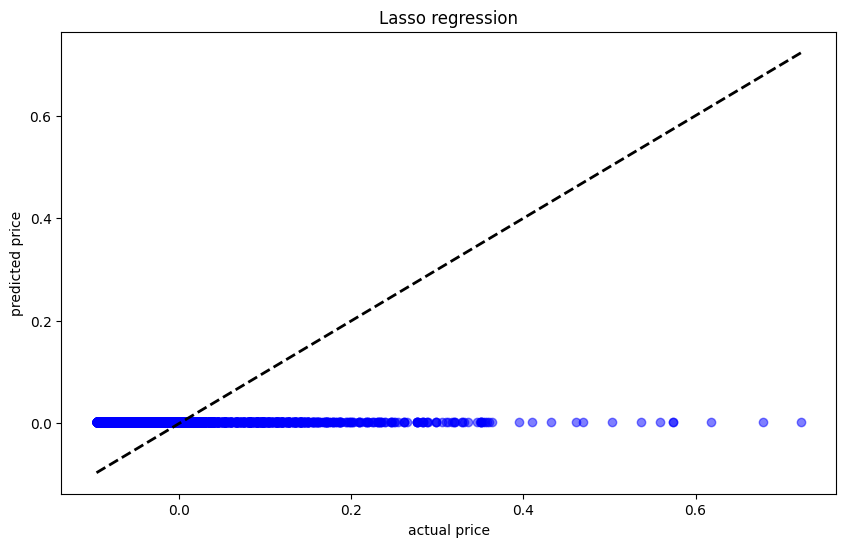

In [131]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_predict_lasso1,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.title('Lasso regression')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()